In [368]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

#Plant model:
def plant(u,par):   ##### [T,T0,T1,Th1,T2,Th2,T3,Th3] = plant(u,par)
    #Identify the input:
    alpha = u[0]; beta = u[1];
    #Identify the parameters:
    Th1 = par[0]; Th2 = par[1]; Th3 = par[2];
    T0 = par[3]; w0 = par[4];
    wh1 = par[5]; wh2 = par[6]; wh3 = par[7];
    UA1 = par[8]; UA2 = par[9]; UA3 = par[10];
    
    #Calculation of T1, T2 and T3:
    T1 = T0 + (Th1-T0)/(1/2+alpha*w0*(1/(2*wh1)+1/UA1));
    T2 = T0 + (Th2-T0)/(1/2+beta*w0*(1/(2*wh2)+1/UA2));
    T3 = T0 + (Th3-T0)/(1/2+(1-alpha-beta)*w0*(1/(2*wh3)+1/UA3));
    #Calculation of T:
    T = (alpha*T1 + beta*T2 + (1-alpha-beta)*T3);
    return [T,T0,T1,Th1,T2,Th2,T3,Th3]
#Linear model:
def linear_model(x_1,x_2):
    u1_p = Regressor1.predict(x_1)
    u2_p = Regressor2.predict(x_2)
    return(np.array([u1_p,u2_p]).T)

#RFR model
def RFR_model(y):
    u1_p = np.expand_dims(np.squeeze(Regressor_1.predict(y)), axis =-1)
    u2_p = np.expand_dims(np.squeeze(Regressor_2.predict(y)), axis =-1)
    return(np.array([u1_p,u2_p]).T)

#SVR model
def SVR_model(y):
    u1_p = np.expand_dims(np.squeeze(regressor1.predict(y)), axis =-1)
    u2_p = np.expand_dims(np.squeeze(regressor2.predict(y)), axis =-1)
    return(np.array([u1_p,u2_p]).T)

# Data processing and visuallization

In [350]:
ds = pd.read_csv('meas_1_opt.csv')
testdata = pd.read_csv('meas_1_test_opt.csv')
#Cleaning Training Data:
ds = ds.drop(ds.columns[[7,8,9,10,11,12,13,14,15,16,17,20,21,22]],axis=1)
ds.shape

#Cleaning test data:
par = testdata.drop(testdata.columns[[0,1,2,3,4,5,6,18,19,20,21
                                      ,22,23,24,25,26,27,28,29]],axis=1)
Cost = testdata.drop(testdata.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12
                                       ,13,14,15,16,17,18,19,21,22,23
                                       ,24,25,26,27,28,29]],axis=1)
J = np.squeeze(np.array([Cost]))
test_x = testdata.drop(testdata.columns[[7,8,9,10,11,12,13,14,15,16
                                         ,17,18,19,20,21,22
                                         ,23,24,25,26,27,28,29]],axis=1)
test_bias = testdata.iloc[:,-7:]
Ju_true = np.array(testdata[['Ju_1','Ju_2']])
test_u = testdata[['u_opt_1','u_opt_2']]
#Measurement set 1: [T0, T1, Th1, T2, Th2, T3, Th3]
print(Ju_true)

[[-2.03509387e-09 -2.58665622e-08]
 [-1.15225305e-08 -2.83482890e-08]
 [-7.26512184e-09 -2.59552664e-08]
 ...
 [-5.95062488e-09 -2.36198545e-08]
 [ 7.01376734e-10 -1.92996836e-08]
 [-3.79482401e-09 -2.72394232e-08]]


In [351]:
#Data spliting:
train_ds = ds[0:500]
test_ds = ds[500:1000]
x_train = train_ds.drop(train_ds.columns[[7,8]],axis=1)
x_test = test_ds.drop(test_ds.columns[[7,8]],axis=1)
y_train = train_ds[['u_opt_1','u_opt_2']]
y_test = test_ds[['u_opt_1','u_opt_2']]
x_test

x_train_1   x_train_2   x_train_3   x_train_4   x_train_5   x_train_6  \
500  54.945643  109.736174  124.134677  145.347475  216.641298  104.431652   
501  61.597525  113.992973  109.514727  141.357668  201.550132  119.133580   
502  64.122138  108.081590  114.069585  154.672559  233.660718  114.713303   
503  52.890764  109.343160  113.676442  148.578136  230.593811  107.718120   
504  65.258897  115.409820  130.690007  142.895608  199.735757  118.111762   
..         ...         ...         ...         ...         ...         ...   
995  60.316409  111.701589  125.338472  134.720864  202.064435  106.275737   
996  60.442453  110.273430  126.764081  137.425710  217.571976  102.323532   
997  59.327226  109.468337  116.040872  145.797589  225.715955  116.700071   
998  58.254815  111.019519  126.591998  148.349646  218.712336  116.491851   
999  66.105517  107.289021  114.897261  138.591925  203.925851  114.347402   

      x_train_7  
500  105.767790  
501  126.766611  
502  126.636775  
503  114.775854  
504  128.944218  
..          ...  
995  107.502346  
996  111.078911  
997  127.868631  
998  127.133620  
999  129.383669  

[500 rows x 7 columns]

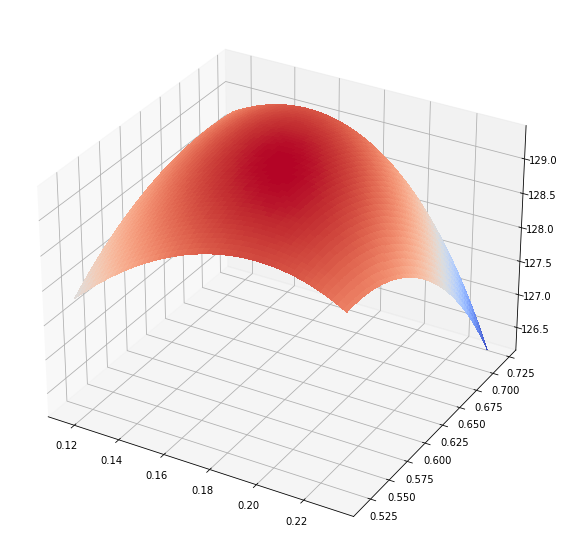

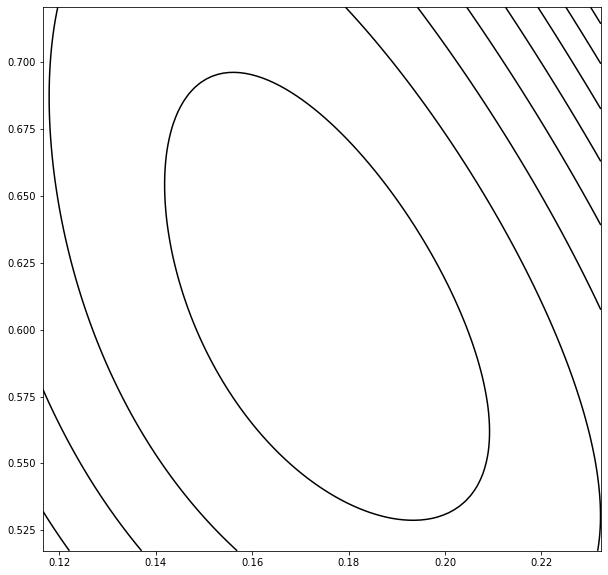

In [119]:

n = 100;
# Make data.
#Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.linspace(min(u_save[:,0]), max(u_save[:,0]), n).reshape(1,-1)
Y = np.linspace(min(u_save[:,1]), max(u_save[:,1]), n).reshape(1,-1)
# #Investigate u_opt2
# X = 0.16*np.ones((n,1))
# Y = np.linspace(0.6,0.7,n).reshape(1,-1)
# #Investigate u_opt1
# X = np.linspace(0.1,0.2,n).reshape(1,-1)
# Y = 0.65*np.ones((n,1))
X, Y = np.meshgrid(X, Y)
Z = np.zeros((n,n))

for i in range (n):
    Z_x = plant(X[:,i],Y[:,i], par1[:,0])
    Z[i] = Z_x[0]
# Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

Z_save = Z[1]
# print(Z_save)
Zu = np.zeros((1,n))
for i in range (n-1):
    Zu[0][i] = (Z_save[i+1] - Z_save[i])/0.001
    
# #Investigate u_opt1
# plt.scatter(np.squeeze(X[1,:]),np.squeeze(Zu))
# plt.plot([0.1,0.2], [0,0], color="r", linestyle="solid", linewidth=2.0)
# #Investigate u_opt1
# plt.scatter(np.squeeze(Y[:,1]),np.squeeze(Zu))
# plt.plot([0.6,0.7], [0,0], color="r", linestyle="solid", linewidth=2.0)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, colors='k')

# #Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
#Plot measurements vs u_opt_1:
fig, ax = plt.subplots()
for input in ['x_train_1', 'x_train_2', 'x_train_3', 'x_train_4', 'x_train_5',
       'x_train_6', 'x_train_7']:
  data = x_train[input]
  label = train_ds['u_opt_1']
  plt.scatter(label, data, label = input)
ax.legend()
ax.set(xlabel="U_opt_1",ylabel="Input")
plt.show()

In [ ]:
#Plot measurements vs u_opt_2:
fig, ax = plt.subplots()
for input in ['x_train_1', 'x_train_2', 'x_train_3', 'x_train_4', 'x_train_5',
       'x_train_6', 'x_train_7']:
  data = x_train[input]
  label = train_ds['u_opt_2']
  plt.scatter(label, data, label = input)
ax.legend()
ax.set(xlabel="U_opt_2",ylabel="Input")
plt.show()

In [ ]:
#Linearity of u_opt_1 vs T_h1
plt.scatter(train_ds["x_train_3"],train_ds["u_opt_1"])
plt.xlabel('T_h1');
plt.ylabel('u_opt_1');
#R2 index
#Keep others constant , test linear.
#check the cost 

In [ ]:
#Linearity of u_opt_2 vs T_h2
plt.scatter(train_ds["x_train_5"],train_ds["u_opt_2"])
plt.xlabel('T_h2');
plt.ylabel('u_opt_2');

## Multivariables Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn import metrics
Regressor1 = LinearRegression()
Regressor2 = LinearRegression()

In [125]:
                                     ###Model###
#u_opt_1 = [a1*(Th1*T0) + a2*(Th1*T1) + ... + a6*(Th1*Th3)] + b1#
#u_opt_2 = [a1*(Th2*T0) + a2*(Th2*T1) + ... + a6*(Th2*Th3)] + b1#
#x_train_1 = T_0 ; x_train_2 = T1; x_train_3 = Th1; x_train_4 = T2; x_train_5 = Th2
#x_train_6 = T3; x_train_7 = Th2

#Prepare data for model fitting of u_opt_1:
T1_train_1 = np.array(train_ds['x_train_1'])*np.array(train_ds['x_train_3'])
T2_train_1 = np.array(train_ds['x_train_2'])*np.array(train_ds['x_train_3'])
T3_train_1 = np.array(train_ds['x_train_4'])*np.array(train_ds['x_train_3'])
T4_train_1 = np.array(train_ds['x_train_5'])*np.array(train_ds['x_train_3'])
T5_train_1 = np.array(train_ds['x_train_6'])*np.array(train_ds['x_train_3'])
T6_train_1 = np.array(train_ds['x_train_7'])*np.array(train_ds['x_train_3'])
#Prepare data for model fitting of u_opt_2:
T1_train_2 = np.array(train_ds['x_train_1'])*np.array(train_ds['x_train_5'])
T2_train_2 = np.array(train_ds['x_train_2'])*np.array(train_ds['x_train_5'])
T3_train_2 = np.array(train_ds['x_train_3'])*np.array(train_ds['x_train_5'])
T4_train_2 = np.array(train_ds['x_train_4'])*np.array(train_ds['x_train_5'])
T5_train_2 = np.array(train_ds['x_train_6'])*np.array(train_ds['x_train_5'])
T6_train_2 = np.array(train_ds['x_train_7'])*np.array(train_ds['x_train_5'])

x_train_1 = np.array([T1_train_1,T2_train_1,T3_train_1,T4_train_1,T5_train_1,T6_train_1]).transpose()
x_train_2 = np.array([T1_train_2,T2_train_2,T3_train_2,T4_train_2,T5_train_2,T6_train_2]).transpose()
u_train_1 = np.expand_dims(np.array(train_ds["u_opt_1"]), axis =-1)
u_train_2 = np.expand_dims(np.array(train_ds["u_opt_2"]), axis =-1)
print(x_train_1.shape, u_train_1.shape)
print(x_train_2.shape, u_train_2.shape)

(500, 6) (500, 1)
(500, 6) (500, 1)


In [126]:
#Model fitting:
Regressor1.fit(x_train_1, u_train_1)
Regressor2.fit(x_train_2, u_train_2)
#Model prediction 
#for u_opt_1 :
T1_1 = np.array(test_x['x_train_1'])*np.array(test_x['x_train_3'])
T2_1 = np.array(test_x['x_train_2'])*np.array(test_x['x_train_3'])
T3_1 = np.array(test_x['x_train_4'])*np.array(test_x['x_train_3'])
T4_1 = np.array(test_x['x_train_5'])*np.array(test_x['x_train_3'])
T5_1 = np.array(test_x['x_train_6'])*np.array(test_x['x_train_3'])
T6_1 = np.array(test_x['x_train_7'])*np.array(test_x['x_train_3'])
x_1 = np.array([T1_1,T2_1,T3_1,T4_1,T5_1,T6_1]).transpose()
print(x_1.shape)
u_opt1_predict = Regressor1.predict(x_1)
#and u_opt_2:
T1_2 = np.array(test_x['x_train_1'])*np.array(test_x['x_train_5'])
T2_2 = np.array(test_x['x_train_2'])*np.array(test_x['x_train_5'])
T3_2 = np.array(test_x['x_train_3'])*np.array(test_x['x_train_5'])
T4_2 = np.array(test_x['x_train_4'])*np.array(test_x['x_train_5'])
T5_2 = np.array(test_x['x_train_6'])*np.array(test_x['x_train_5'])
T6_2 = np.array(test_x['x_train_7'])*np.array(test_x['x_train_5'])
x_2 = np.array([T1_2,T2_2,T3_2,T4_2,T5_2,T6_2]).transpose()
print(x_2.shape)
u_opt2_predict = Regressor2.predict(x_2)

(1000, 6)
(1000, 6)


In [127]:
#Model evaluation:
#Regression Metrics:
u_opt1_true = np.array([test_u["u_opt_1"]]).T
u_opt2_true = np.array([test_u["u_opt_2"]]).T
print("MAE test score of u_opt_1:", mean_absolute_error(u_opt1_true, u_opt1_predict))
print("RMSE test score of u_opt_1:", sqrt(mean_squared_error(u_opt1_true, u_opt1_predict)))
print("Rsquared score of u_op1_1:",r2_score(np.array(train_ds['x_train_3']), np.array(train_ds['u_opt_1'])))
print("MAE test score of u_opt_2:", mean_absolute_error(u_opt2_true, u_opt2_predict))
print("RMSE test score of u_opt_2:", sqrt(mean_squared_error(u_opt2_true, u_opt2_predict)))
print("Rsquared score of u_op1_2:",r2_score(np.array(train_ds['x_train_5']), np.array(train_ds['u_opt_2'])))

MAE test score of u_opt_1: 0.012843576579016878
RMSE test score of u_opt_1: 0.01623064332131363
Rsquared score of u_op1_1: -276.2386938156434
MAE test score of u_opt_2: 0.01804656661552481
RMSE test score of u_opt_2: 0.022748351615361095
Rsquared score of u_op1_2: -303.1087336398478


In [336]:
###############################Closed loop analysis:###################################### 

#Define the parameter vector:
#for u_opt_1 :
T1_1 = np.array(test_x['x_train_1'])*np.array(test_x['x_train_3'])
T2_1 = np.array(test_x['x_train_2'])*np.array(test_x['x_train_3'])
T3_1 = np.array(test_x['x_train_4'])*np.array(test_x['x_train_3'])
T4_1 = np.array(test_x['x_train_5'])*np.array(test_x['x_train_3'])
T5_1 = np.array(test_x['x_train_6'])*np.array(test_x['x_train_3'])
T6_1 = np.array(test_x['x_train_7'])*np.array(test_x['x_train_3'])
x_test_1 = np.array([T1_1,T2_1,T3_1,T4_1,T5_1,T6_1]).transpose()

print(x_1.shape)
#and u_opt_2:

T1_2 = np.array(test_x['x_train_1'])*np.array(test_x['x_train_5'])
T2_2 = np.array(test_x['x_train_2'])*np.array(test_x['x_train_5'])
T3_2 = np.array(test_x['x_train_3'])*np.array(test_x['x_train_5'])
T4_2 = np.array(test_x['x_train_4'])*np.array(test_x['x_train_5'])
T5_2 = np.array(test_x['x_train_6'])*np.array(test_x['x_train_5'])
T6_2 = np.array(test_x['x_train_7'])*np.array(test_x['x_train_5'])
x_test_2 = np.array([T1_2,T2_2,T3_2,T4_2,T5_2,T6_2]).transpose()
print(x_2.shape)
#x_train_1 = T_0 ; x_train_2 = T1; x_train_3 = Th1; x_train_4 = T2; x_train_5 = Th2
#x_train_6 = T3; x_train_7 = Th2
par_0 = np.expand_dims(np.array(par['dist_6']), axis =-1)
par_1 = np.expand_dims(np.array(par['dist_7']), axis =-1)
par_2 = np.expand_dims(np.array(par['dist_8']), axis =-1)
par_3 = np.expand_dims(np.array(par['dist_1']), axis =-1)
par_4 = np.expand_dims(np.array(par['dist_2']), axis =-1)
par_5 = np.expand_dims(np.array(par['dist_3']), axis =-1)
par_6 = np.expand_dims(np.array(par['dist_4']), axis =-1)
par_7 = np.expand_dims(np.array(par['dist_5']), axis =-1)
par_8 = np.expand_dims(np.array(par['dist_9']), axis =-1)
par_9 = np.expand_dims(np.array(par['dist_10']), axis =-1)
par_10 = np.expand_dims(np.array(par['dist_11']), axis =-1)
par1 = np.concatenate((par_0,par_1, par_2, 
                      par_3,par_4,
                      par_5,par_6,
                      par_7,par_8,
                      par_9,par_10),axis=1).transpose()

#Define u_true:
u_true = np.concatenate((u_opt1_true, u_opt2_true), axis=1)
# For loop:
#Initialize the counter
N = 2
datapoint = 0
J_p = np.zeros(N)
J_pm1 = np.zeros(N)
Ju1_save = np.zeros(N)
Ju2_save = np.zeros(N)
Ju_save = np.zeros((N,2))
u_save = np.zeros((N,2))
#For loop:
for i in range (N):
    datapoint = datapoint + 1
    print("Data point :",datapoint)
    print(' ')
    par_test = par1[:,i]
    x_1 = np.array([x_test_1[i,:]])

    x_2 = np.array([x_test_2[i,:]])
    u_n = [0.14,0.5]
    print("Intial values of u(n):",u_n)
    error = [1,1]
    u_np1 = u_n
    print("Intial values of u(n+1):",u_np1)
    c = -1
    J_pm1 = 0;
    iter = 67
    u1 = np.zeros((iter,1))
    u2 = np.zeros((iter,1))
    du1 = np.zeros((iter,1))
    du2 = np.zeros((iter,1))
    J_save = np.zeros((iter,1))
    #while loop:
    while error[0] > 1e-4 or error[1] > 1e-4:
        u_np1 = linear_model(x_1,x_2)                #Use linear model for u
        print(u_np1)
        u_np1 = u_np1[0][0]
        c += 1
        coef = 0.05
        u_np1 = u_n + (u_np1-u_n)*coef
        y = np.expand_dims(np.array(plant(u_np1,par_test)), axis =-1).T 
        J_p[i] = y[0][0]
        y = np.expand_dims(np.array([y[0][1],y[0][2],y[0][3],y[0][4],y[0][5],y[0][6],y[0][7]]), axis =-1).T + test_bias.values[i,:]
        print(y[0][6])
        x_1 = np.expand_dims(np.array([y[0][0]*y[0][2]
                                       ,y[0][1]*y[0][2]
                                       ,y[0][3]*y[0][2]
                                       ,y[0][4]*y[0][2]
                                       ,y[0][5]*y[0][2]
                                       ,y[0][6]*y[0][2]]), axis =-1).T
        x_2 = np.expand_dims(np.array([y[0][0]*y[0][4]
                                       ,y[0][1]*y[0][4]
                                       ,y[0][2]*y[0][4]
                                       ,y[0][3]*y[0][4]
                                       ,y[0][5]*y[0][4]
                                       ,y[0][6]*y[0][4]]), axis =-1).T
        print("optimal cost",J[i])
        print("updated cost",J_p[i])
        #print("Updated u(n+1)",u_np1)
        error = abs(u_np1 - u_n)
        du  = (u_np1-u_n)*coef
        for j in range (iter):
            if j == c:
                u1[j] = u_np1[0]
                u2[j] = u_np1[1]
                du1[j] = du[0]
                du2[j] = du[1]
                J_save[j] = J_p[i] 
        print("error:",error)
        print("du:",du)
        print("J(n+1)",J_p[i])
        print("J(n)",J_pm1)
        Jp_u1 = (J_p - J_pm1)/du[0]
        Jp_u2 = (J_p - J_pm1)/du[1]
        print("gradient J_u1",Jp_u1[i])
        print("gradient J_u2",Jp_u2[i])
        J_pm1 = J_p[i]
        u_n = u_np1
        print(" ")
        print("Iterations:",c,"Errors:",error)
        if c >= 1000:
            print("Data point is not converged")
            break
    Ju1_save[i] = Jp_u1[i]
    Ju2_save[i] = Jp_u2[i]
    u_save[i] = u_np1
    Ju_save = np.concatenate([Ju1_save.reshape(1,-1),Ju2_save.reshape(1,-1)]).T

(1, 6)
(1, 6)
Data point : 1
 
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[[0.15925764 0.62699575]]]
109.38052174008037
optimal cost 129.40940471503998
updated cost 128.07140842569152
error: [0.00096288 0.00634979]
du: [4.81440959e-05 3.17489379e-04]
J(n+1) 128.07140842569152
J(n) 0
gradient J_u1 2660168.520845865
gradient J_u2 403388.0089254066
 
Iterations: 0 Errors: [0.00096288 0.00634979]
[[[0.17292753 0.65346127]]]
109.38052174008037
optimal cost 129.40940471503998
updated cost 128.22590442300032
error: [0.00159823 0.00735557]
du: [7.99116302e-05 3.67778698e-04]
J(n+1) 128.22590442300032
J(n) 128.07140842569152
gradient J_u1 1933.335571243507
gradient J_u2 420.0787003642411
 
Iterations: 1 Errors: [0.00159823 0.00735557]
[[[0.1725704  0.65129133]]]
109.38052174008037
optimal cost 129.40940471503998
updated cost 128.36255518653164
error: [0.00150046 0.0068793 ]
du: [7.50232193e-05 3.43964909e-04]
J(n+1) 128.36255518653164
J(n) 128.22590442300032
gradie

[[[0.22004524 0.60859154]]]
108.27707310794594
optimal cost 126.915072518736
updated cost 126.39141743829731
error: [0.00226353 0.00320672]
du: [0.00011318 0.00016034]
J(n+1) 126.39141743829731
J(n) 126.32956166741651
gradient J_u1 546.5427317796951
gradient J_u2 385.78854412709217
 
Iterations: 10 Errors: [0.00226353 0.00320672]
[[[0.21866027 0.6080923 ]]]
108.27707310794594
optimal cost 126.915072518736
updated cost 126.446164262785
error: [0.0020811  0.00302142]
du: [0.00010406 0.00015107]
J(n+1) 126.446164262785
J(n) 126.39141743829731
gradient J_u1 526.132389895392
gradient J_u2 362.3912497719548
 
Iterations: 11 Errors: [0.0020811  0.00302142]
[[[0.21739199 0.6076204 ]]]
108.27707310794594
optimal cost 126.915072518736
updated cost 126.49464945680835
error: [0.00191364 0.00284675]
du: [9.56817564e-05 1.42337747e-04]
J(n+1) 126.49464945680835
J(n) 126.446164262785
gradient J_u1 506.7339465773817
gradient J_u2 340.6348280796063
 
Iterations: 12 Errors: [0.00191364 0.00284675]
[[[0.

0.2025722742302771 126.88815805716504
Goal values: 0.21995403100136604 126.915072518736


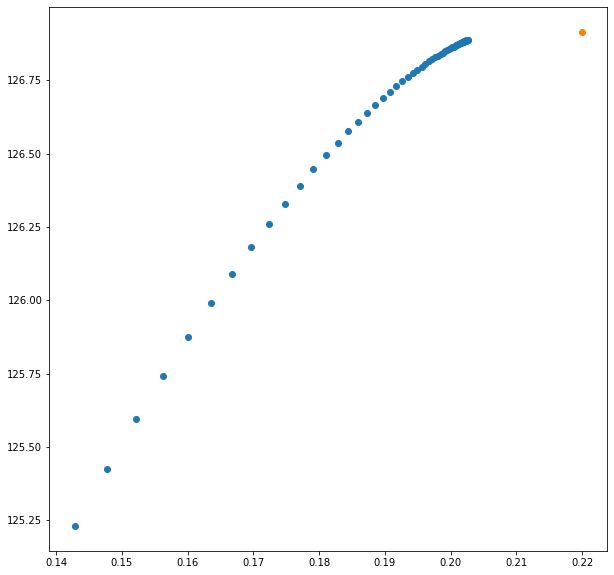

In [337]:
# print('du1:',du1,' ','u1:',u1,' ','J:',J_save)
# plt.scatter(np.squeeze(du1),np.squeeze(J_save))
plt.scatter(np.squeeze(u1),np.squeeze(J_save))
print(u1[-1,0],J_save[-1,0])
print("Goal values:",u_true[N-1,0],J[N-1])
plt.scatter(u_true[N-1,0],J[N-1])

0.5979044900437104 126.88815805716504
Goal values: 0.5932801921282079 126.915072518736


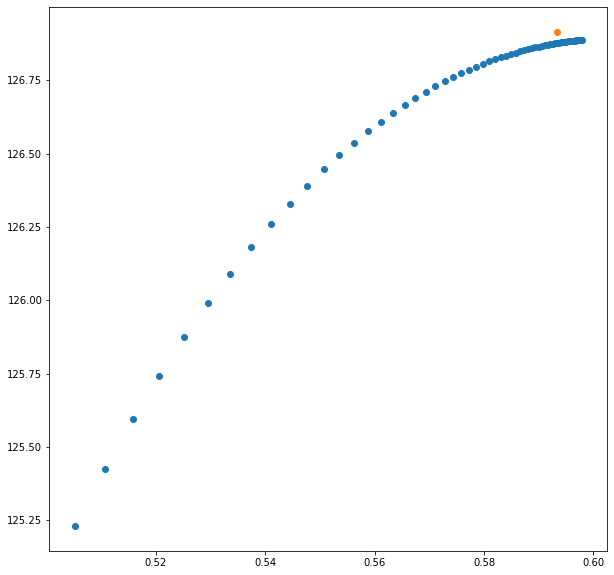

In [338]:
# print('du2:',du2,' ','u2:',u2,' ','J:',J_save)
# plt.scatter(np.squeeze(du1),np.squeeze(J_save))
plt.scatter(np.squeeze(u2),np.squeeze(J_save))
print(u2[-1,0],J_save[-1,0])
print("Goal values:",u_true[N-1,1],J[N-1])
plt.scatter(u_true[N-1,1],J[N-1])

ValueError: x and y must be the same size

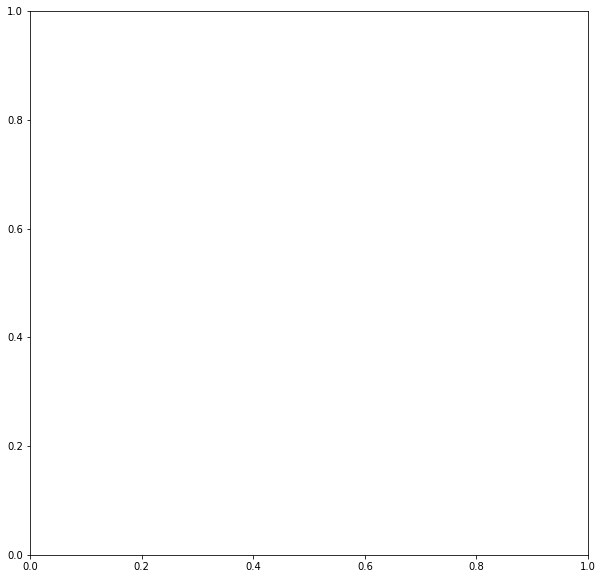

In [172]:
plt.scatter(np.squeeze(u_true[:,0]), np.squeeze(u_save[:,0]))
plt.plot([0.1, 0.26], [0.1, 0.26], color="black", linestyle="dashed", linewidth=2.0)
plt.xlabel("u2_true")
plt.ylabel("u2_itergrated")

In [ ]:
plt.scatter(np.squeeze(u_true[:,1]), np.squeeze(u_save[:,1]))
plt.plot([max(u_true[:,1]), min(u_true[:,1])], [max(u_true[:,1]), min(u_true[:,1])], color="black", linestyle="dashed", linewidth=2.0)
plt.xlabel("u2_true")
plt.ylabel("u2_itergrated")

In [ ]:

print("MAE test score of Cost:", metrics.mean_absolute_error(J[0:N], J_p))
print('Mean Squared Error of u_opt1::', metrics.mean_squared_error(J[0:N], J_p))
plt.scatter(J_p,J[0:N])
plt.plot([max(J[0:N]), min(J[0:N])], [max(J[0:N]), min(J[0:N])], color="black", linestyle="dashed", linewidth=2.0)
plt.xlabel("J_true")
plt.ylabel("J_predict")

Text(0, 0.5, 'Ju1_itergrated')

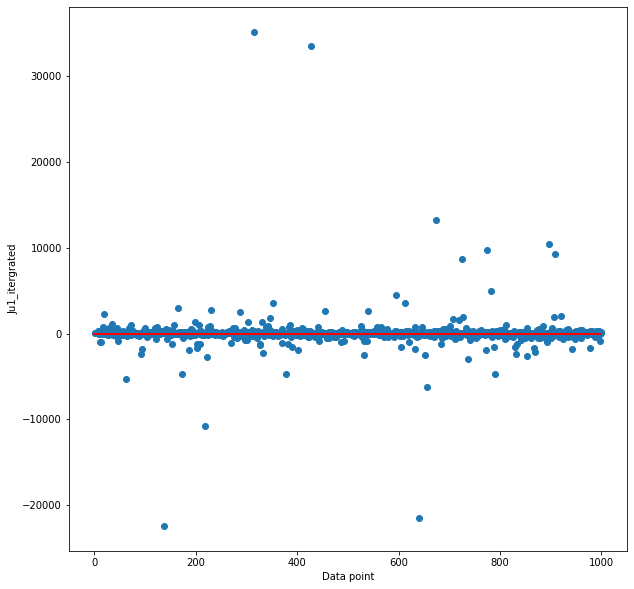

In [131]:
case = np.arange(1, N+1, 1)

plt.scatter(case,Ju_save[:,0])
# plt.ylim(-1000, 1000)
plt.plot([0,N], [0,0], color="r", linestyle="solid", linewidth=2.0)
plt.xlabel("Data point")
plt.ylabel("Ju1_itergrated")

Text(0, 0.5, 'Ju2_itergrated')

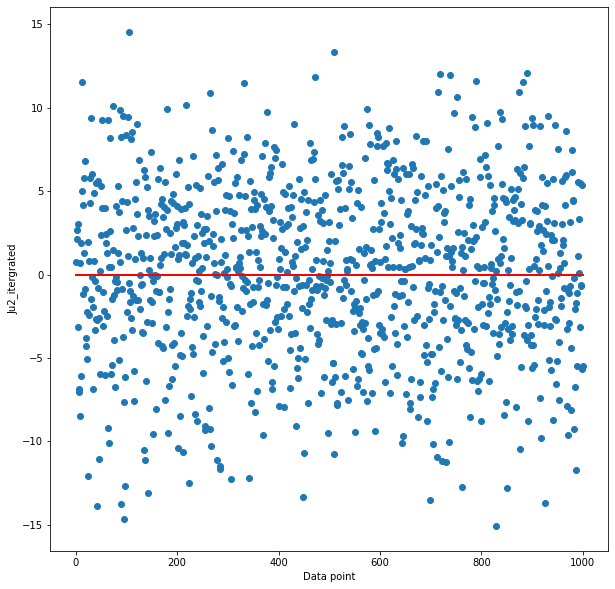

In [129]:
case = np.arange(1, N+1, 1)

plt.scatter(case,Ju_save[:,1])
# plt.ylim(-1000, 1000)
plt.plot([0,N], [0,0], color="r", linestyle="solid", linewidth=2.0)
plt.xlabel("Data point")
plt.ylabel("Ju2_itergrated")

In [ ]:
case = np.arange(1, N+1, 1)

plt.scatter(case,J-J_p)
plt.plot([0,N], [0,0], color="r", linestyle="solid", linewidth=2.0)
plt.xlabel("Data point")
plt.ylabel("Loss")

# Random Forest Regression

In [352]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
Regressor_1 = RandomForestRegressor(n_estimators=50, random_state=7)
Regressor_2 = RandomForestRegressor(n_estimators=50, random_state=7)

In [353]:
                     ### Model of u_opt_1 ###
#Prepare data for model fitting:
T1_train = np.array(train_ds['x_train_1'])
T2_train = np.array(train_ds['x_train_2'])
T3_train = np.array(train_ds['x_train_3'])
T4_train = np.array(train_ds['x_train_4'])
T5_train = np.array(train_ds['x_train_5'])
T6_train = np.array(train_ds['x_train_6'])
T7_train = np.array(train_ds['x_train_7'])
x_train = np.array([T1_train,T2_train,T3_train,T4_train,T5_train,T6_train,T7_train]).transpose()
u1_train = np.array(train_ds["u_opt_1"])
u2_train = np.array(train_ds["u_opt_2"])
x_train.shape, u1_train.shape, u2_train.shape
#Model fitting:
Regressor_1.fit(x_train, u1_train)
Regressor_2.fit(x_train, u2_train)

RandomForestRegressor(n_estimators=50, random_state=7)

In [354]:
###############################Opened loop analysis:######################################
#Model prediction:
T1 = np.array(testdata['x_train_1'])
T2 = np.array(testdata['x_train_2'])
T3 = np.array(testdata['x_train_3'])
T4 = np.array(testdata['x_train_4'])
T5 = np.array(testdata['x_train_5'])
T6 = np.array(testdata['x_train_6'])
T7 = np.array(testdata['x_train_7'])
x = np.array([T1,T2,T3,T4,T5,T6,T7]).transpose()
u1_predict = np.expand_dims(np.squeeze(Regressor_1.predict(x)), axis =-1)
u2_predict = np.expand_dims(np.squeeze(Regressor_2.predict(x)), axis =-1)
#Model evaluation:
#Regression Metrics:
u1_true = np.array([testdata["u_opt_1"]]).T
u2_true = np.array([testdata["u_opt_2"]]).T

print('Mean Absolute Error of u_opt1:', metrics.mean_absolute_error(u1_true, u1_predict))
print('Mean Squared Error of u_opt1::', metrics.mean_squared_error(u1_true, u1_predict))
print('Root Mean Squared Error of u_opt1::', np.sqrt(metrics.mean_squared_error(u1_true, u1_predict)))
print('')
print('Mean Absolute Error of u_opt2:', metrics.mean_absolute_error(u2_true, u2_predict))
print('Mean Squared Error of u_opt2::', metrics.mean_squared_error(u2_true, u2_predict))
print('Root Mean Squared Error of u_opt2::', np.sqrt(metrics.mean_squared_error(u2_true, u2_predict)))

Mean Absolute Error of u_opt1: 0.011390029872902727
Mean Squared Error of u_opt1:: 0.00021117856456454208
Root Mean Squared Error of u_opt1:: 0.014531984192275398

Mean Absolute Error of u_opt2: 0.019480536705745805
Mean Squared Error of u_opt2:: 0.0005982752164709041
Root Mean Squared Error of u_opt2:: 0.024459665093187685


In [359]:
###############################Closed loop analysis:######################################
                         
#Define the parameter vector:
#x_train_1 = T_0 ; x_train_2 = T1; x_train_3 = Th1; x_train_4 = T2; x_train_5 = Th2
#x_train_6 = T3; x_train_7 = Th2
par_0 = np.expand_dims(np.array(par['dist_6']), axis =-1)
par_1 = np.expand_dims(np.array(par['dist_7']), axis =-1)
par_2 = np.expand_dims(np.array(par['dist_8']), axis =-1)
par_3 = np.expand_dims(np.array(par['dist_1']), axis =-1)
par_4 = np.expand_dims(np.array(par['dist_2']), axis =-1)
par_5 = np.expand_dims(np.array(par['dist_3']), axis =-1)
par_6 = np.expand_dims(np.array(par['dist_4']), axis =-1)
par_7 = np.expand_dims(np.array(par['dist_5']), axis =-1)
par_8 = np.expand_dims(np.array(par['dist_9']), axis =-1)
par_9 = np.expand_dims(np.array(par['dist_10']), axis =-1)
par_10 = np.expand_dims(np.array(par['dist_11']), axis =-1)
par1 = np.concatenate((par_0, par_1, par_2, 
                      par_3,par_4,
                      par_5,par_6,
                      par_7,par_8,
                      par_9,par_10),axis=1).transpose()
    

#Define two vectors u_opt_1 and u_opt_2:
u_true = np.concatenate((u1_true, u2_true), axis=1)
# For loop:
#Initialize the counter
N = 62
datapoint = 0
J_p = np.zeros(N)
Ju1_save = np.zeros(N)
Ju2_save = np.zeros(N)
Ju_save = np.zeros((N,2))
u_save = np.zeros((N,2))
#For loop:
for i in range (N):
    datapoint = datapoint + 1
    print(" ")
    print("Data point :",datapoint)
    par_test = par1[:,i]
    y_x = x[i,:].reshape(1,-1)
    #print("intital y_x",y_x)
    u_n = [0.14,0.5]
    print("Intial values of u(n):",u_n)
    error = [1,1]
    u_np1 = u_n
    print("Intial values of u(n+1):",u_np1)
    c = -1
    J_pm1 = 0
    iter = 24
    u1 = np.zeros((iter,1))
    u2 = np.zeros((iter,1))
    du1 = np.zeros((iter,1))
    du2 = np.zeros((iter,1))
    J_save = np.zeros((iter,1))
    #while loop:
    while error[0] > 1e-3 or error[1] > 1e-3:
        u_np1 = RFR_model(y_x)
        print(u_np1)
        u_np1 = u_np1[0]
        c += 1
        ratio = 0.1
        u_np1 = u_n + (u_np1-u_n)*ratio
        #print("Update u(n)",u_n)
        y = np.expand_dims(np.array(plant(u_np1,par_test)), axis =-1).T
        y_x = np.expand_dims(np.array([y[0][1],y[0][2],y[0][3],y[0][4],y[0][5],y[0][6],y[0][7]]), axis =-1).T
        #print("updated y_x",y_x)
        J_p[i] = y[0][0]
        y_x = y_x + test_bias.values[i,:]
        print("optimal cost",J[i])
        print("updated cost",J_p[i])
        #print("Updated u(n+1)",u_np1)
        error = abs(u_np1 - u_n)
        du = (u_np1-u_n)*ratio
        for j in range (iter):
            if j == c:
                u1[j] = u_np1[0]
                u2[j] = u_np1[1]
                du1[j] = du[0]
                du2[j] = du[1]
                J_save[j] = J_p[i]
        print('u(n+1):',u_np1)
        print('u(n):',u_n)
        print('J(n+1)',J_p[i])
        print('J(n)',J_pm1)
        print('d_u',error)
        Jp_u1 = (J_p - J_pm1)/du[0]
        Jp_u2 = (J_p - J_pm1)/du[1]
        print("gradient J_u1",Jp_u1[i])
        print("gradient J_u2",Jp_u2[i])
        J_pm1 = y[0][0]
        u_n = u_np1
        print(" ")
        print("Iterations:",c,"Errors:",error)
        if c >= 1000:
            print("Data point is not converged")
            break
    
    Ju1_save[i] = Jp_u1[i]
    Ju2_save[i] = Jp_u2[i]
    u_save[i] = u_np1
    Ju_save = np.concatenate([Ju1_save.reshape(1,-1),Ju2_save.reshape(1,-1)]).T

 
Data point : 1
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.15706813 0.62181661]]
optimal cost 129.40940471503998
updated cost 128.1869552406819
u(n+1): [0.14170681 0.51218166]
u(n): [0.14, 0.5]
J(n+1) 128.1869552406819
J(n) 0
d_u [0.00170681 0.01218166]
gradient J_u1 751030.9314220648
gradient J_u2 105229.45719270057
 
Iterations: 0 Errors: [0.00170681 0.01218166]
[[0.15207914 0.63475745]]
optimal cost 129.40940471503998
updated cost 128.40642833638967
u(n+1): [0.14274405 0.52443924]
u(n): [0.14170681 0.51218166]
J(n+1) 128.40642833638967
J(n) 128.1869552406819
d_u [0.00103723 0.01225758]
gradient J_u1 2115.94949753801
gradient J_u2 179.0509364726283
 
Iterations: 1 Errors: [0.00103723 0.01225758]
[[0.15217983 0.63402867]]
optimal cost 129.40940471503998
updated cost 128.58509401527868
u(n+1): [0.14368762 0.53539818]
u(n): [0.14274405 0.52443924]
J(n+1) 128.58509401527868
J(n) 128.40642833638967
d_u [0.00094358 0.01095894]
gradient J_u1 1893.4905152819

[[0.21004391 0.59341221]]
optimal cost 126.915072518736
updated cost 126.78011352240432
u(n+1): [0.19508261 0.57574252]
u(n): [0.19342025 0.57377922]
J(n+1) 126.78011352240432
J(n) 126.75779588951589
d_u [0.00166237 0.0019633 ]
gradient J_u1 134.25216410983845
gradient J_u2 113.67414661417749
 
Iterations: 14 Errors: [0.00166237 0.0019633 ]
[[0.20974999 0.59393486]]
optimal cost 126.915072518736
updated cost 126.79884143795209
u(n+1): [0.19654935 0.57756175]
u(n): [0.19508261 0.57574252]
J(n+1) 126.79884143795209
J(n) 126.78011352240432
d_u [0.00146674 0.00181923]
gradient J_u1 127.68414970609841
gradient J_u2 102.94398240151133
 
Iterations: 15 Errors: [0.00146674 0.00181923]
[[0.20957743 0.59500124]]
optimal cost 126.915072518736
updated cost 126.81488238943052
u(n+1): [0.19785216 0.5793057 ]
u(n): [0.19654935 0.57756175]
J(n+1) 126.81488238943052
J(n) 126.79884143795209
d_u [0.00130281 0.00174395]
gradient J_u1 123.126040957564
gradient J_u2 91.98061558868264
 
Iterations: 16 Errors

gradient J_u1 74.69725295840979
gradient J_u2 12.765610772371732
 
Iterations: 11 Errors: [0.00052502 0.00307211]
[[0.15942318 0.61371197]]
optimal cost 138.957721709467
updated cost 138.95740410216396
u(n+1): [0.15460214 0.58817281]
u(n): [0.15406647 0.58533512]
J(n+1) 138.95740410216396
J(n) 138.95574620552344
d_u [0.00053567 0.00283768]
gradient J_u1 30.949929980581913
gradient J_u2 5.84242770209269
 
Iterations: 12 Errors: [0.00053567 0.00283768]
[[0.16030496 0.61464035]]
optimal cost 138.957721709467
updated cost 138.95715776568554
u(n+1): [0.15517243 0.59081956]
u(n): [0.15460214 0.58817281]
J(n+1) 138.95715776568554
J(n) 138.95740410216396
d_u [0.00057028 0.00264675]
gradient J_u1 -4.319555547049028
gradient J_u2 -0.9307117674088615
 
Iterations: 13 Errors: [0.00057028 0.00264675]
[[0.15905448 0.61454473]]
optimal cost 138.957721709467
updated cost 138.95545289567437
u(n+1): [0.15556063 0.59319208]
u(n): [0.15517243 0.59081956]
J(n+1) 138.95545289567437
J(n) 138.95715776568554
d

[[0.18900813 0.63161274]]
optimal cost 152.232654457856
updated cost 150.11689174707408
u(n+1): [0.15670194 0.54507278]
u(n): [0.15311236 0.53545723]
J(n+1) 150.11689174707408
J(n) 149.7642836479046
d_u [0.00358958 0.00961555]
gradient J_u1 982.3110299740798
gradient J_u2 366.70608217082133
 
Iterations: 3 Errors: [0.00358958 0.00961555]
[[0.18900813 0.63161274]]
optimal cost 152.232654457856
updated cost 150.41354184109636
u(n+1): [0.15993256 0.55372678]
u(n): [0.15670194 0.54507278]
J(n+1) 150.41354184109636
J(n) 150.11689174707408
d_u [0.00323062 0.008654  ]
gradient J_u1 918.2453081206079
gradient J_u2 342.7897367919546
 
Iterations: 4 Errors: [0.00323062 0.008654  ]
[[0.18900813 0.63161274]]
optimal cost 152.232654457856
updated cost 150.66348103647914
u(n+1): [0.16284011 0.56151537]
u(n): [0.15993256 0.55372678]
J(n+1) 150.66348103647914
J(n) 150.41354184109636
d_u [0.00290756 0.0077886 ]
gradient J_u1 859.619157385837
gradient J_u2 320.9040352242203
 
Iterations: 5 Errors: [0.00

[[0.15697472 0.61043795]]
optimal cost 131.644377110363
updated cost 131.6220266490397
u(n+1): [0.14966762 0.56826952]
u(n): [0.14885572 0.56358414]
J(n+1) 131.6220266490397
J(n) 131.60564592800068
d_u [0.0008119  0.00468538]
gradient J_u1 201.75779599978154
gradient J_u2 34.96134118287401
 
Iterations: 8 Errors: [0.0008119  0.00468538]
[[0.15676915 0.60989351]]
optimal cost 131.644377110363
updated cost 131.63281177370885
u(n+1): [0.15037777 0.57243192]
u(n): [0.14966762 0.56826952]
J(n+1) 131.63281177370885
J(n) 131.6220266490397
d_u [0.00071015 0.0041624 ]
gradient J_u1 151.87050965273258
gradient J_u2 25.910838168070107
 
Iterations: 9 Errors: [0.00071015 0.0041624 ]
[[0.15737624 0.60878991]]
optimal cost 131.644377110363
updated cost 131.6394217842418
u(n+1): [0.15107762 0.57606771]
u(n): [0.15037777 0.57243192]
J(n+1) 131.6394217842418
J(n) 131.63281177370885
d_u [0.00069985 0.0036358 ]
gradient J_u1 94.44933562002089
gradient J_u2 18.18034944192643
 
Iterations: 10 Errors: [0.00

[[0.14795487 0.58084751]]
optimal cost 129.584861676607
updated cost 129.04980481348946
u(n+1): [0.14079549 0.50808475]
u(n): [0.14, 0.5]
J(n+1) 129.04980481348946
J(n) 0
d_u [0.00079549 0.00808475]
gradient J_u1 1622275.204773425
gradient J_u2 159621.24733329745
 
Iterations: 0 Errors: [0.00079549 0.00808475]
[[0.15665989 0.57705904]]
optimal cost 129.584861676607
updated cost 129.1492236748731
u(n+1): [0.14238193 0.51498218]
u(n): [0.14079549 0.50808475]
J(n+1) 129.1492236748731
J(n) 129.04980481348946
d_u [0.00158644 0.00689743]
gradient J_u1 626.6787505867582
gradient J_u2 144.13902216388135
 
Iterations: 1 Errors: [0.00158644 0.00689743]
[[0.15710971 0.57552233]]
optimal cost 129.584861676607
updated cost 129.22924846460953
u(n+1): [0.14385471 0.5210362 ]
u(n): [0.14238193 0.51498218]
J(n+1) 129.22924846460953
J(n) 129.1492236748731
d_u [0.00147278 0.00605402]
gradient J_u1 543.3592208564306
gradient J_u2 132.18464701969177
 
Iterations: 2 Errors: [0.00147278 0.00605402]
[[0.15688

[[0.15005622 0.65326904]]
optimal cost 132.99708727459299
updated cost 132.48261040358716
u(n+1): [0.14395881 0.5624342 ]
u(n): [0.14328132 0.55234144]
J(n+1) 132.48261040358716
J(n) 132.35764467512814
d_u [0.00067749 0.01009276]
gradient J_u1 1844.5399790620493
gradient J_u2 123.81719599522431
 
Iterations: 4 Errors: [0.00067749 0.01009276]
[[0.1504164  0.65091252]]
optimal cost 132.99708727459299
updated cost 132.57954292536238
u(n+1): [0.14460457 0.57128203]
u(n): [0.14395881 0.5624342 ]
J(n+1) 132.57954292536238
J(n) 132.48261040358716
d_u [0.00064576 0.00884783]
gradient J_u1 1501.0645217898225
gradient J_u2 109.55511695872559
 
Iterations: 5 Errors: [0.00064576 0.00884783]
[[0.15045891 0.65130259]]
optimal cost 132.99708727459299
updated cost 132.6562427731394
u(n+1): [0.14519    0.57928409]
u(n): [0.14460457 0.57128203]
J(n+1) 132.6562427731394
J(n) 132.57954292536238
d_u [0.00058543 0.00800206]
gradient J_u1 1310.1369283628017
gradient J_u2 95.85018169946575
 
Iterations: 6 Err

[[0.15799652 0.62282307]]
optimal cost 122.95514871646799
updated cost 122.8474770720755
u(n+1): [0.15573103 0.6109181 ]
u(n): [0.15547931 0.60959533]
J(n+1) 122.8474770720755
J(n) 122.8400841566346
d_u [0.00025172 0.00132277]
gradient J_u1 293.69483880825277
gradient J_u2 55.88944810353847
 
Iterations: 21 Errors: [0.00025172 0.00132277]
[[0.15785199 0.62282307]]
optimal cost 122.95514871646799
updated cost 122.85379045898989
u(n+1): [0.15594313 0.6121086 ]
u(n): [0.15573103 0.6109181 ]
J(n+1) 122.85379045898989
J(n) 122.8474770720755
d_u [0.0002121 0.0011905]
gradient J_u1 297.667631452692
gradient J_u2 53.03150820985257
 
Iterations: 22 Errors: [0.0002121 0.0011905]
[[0.15776374 0.62287748]]
optimal cost 122.95514871646799
updated cost 122.85923998200025
u(n+1): [0.15612519 0.61318549]
u(n): [0.15594313 0.6121086 ]
J(n+1) 122.85923998200025
J(n) 122.85379045898989
d_u [0.00018206 0.00107689]
gradient J_u1 299.3240027692369
gradient J_u2 50.604344745706484
 
Iterations: 23 Errors: [0

[[0.1993207  0.58962533]]
optimal cost 134.854419918876
updated cost 134.81693954115784
u(n+1): [0.17335302 0.55853245]
u(n): [0.17046772 0.55507769]
J(n+1) 134.81693954115784
J(n) 134.7985809096247
d_u [0.0028853  0.00345476]
gradient J_u1 63.62820240479586
gradient J_u2 53.14003772865079
 
Iterations: 9 Errors: [0.0028853  0.00345476]
[[0.19632181 0.59035897]]
optimal cost 134.854419918876
updated cost 134.82859373218488
u(n+1): [0.1756499 0.5617151]
u(n): [0.17335302 0.55853245]
J(n+1) 134.82859373218488
J(n) 134.81693954115784
d_u [0.00229688 0.00318265]
gradient J_u1 50.7392410932472
gradient J_u2 36.6178623916634
 
Iterations: 10 Errors: [0.00229688 0.00318265]
[[0.19561895 0.5889581 ]]
optimal cost 134.854419918876
updated cost 134.83512662405232
u(n+1): [0.1776468 0.5644394]
u(n): [0.1756499 0.5617151]
J(n+1) 134.83512662405232
J(n) 134.82859373218488
d_u [0.0019969 0.0027243]
gradient J_u1 32.715087847762454
gradient J_u2 23.98007627984872
 
Iterations: 11 Errors: [0.0019969 0

[[0.16629332 0.57787464]]
optimal cost 126.51294711481
updated cost 126.41682659016972
u(n+1): [0.15779823 0.55600493]
u(n): [0.15685433 0.55357496]
J(n+1) 126.41682659016972
J(n) 126.40035961305163
d_u [0.0009439  0.00242997]
gradient J_u1 174.45693967530264
gradient J_u2 67.76621045094522
 
Iterations: 11 Errors: [0.0009439  0.00242997]
[[0.16592007 0.57958898]]
optimal cost 126.51294711481
updated cost 126.43118979596545
u(n+1): [0.15861041 0.55836333]
u(n): [0.15779823 0.55600493]
J(n+1) 126.43118979596545
J(n) 126.41682659016972
d_u [0.00081218 0.00235841]
gradient J_u1 176.8465869630526
gradient J_u2 60.902192592836705
 
Iterations: 12 Errors: [0.00081218 0.00235841]
[[0.1657312  0.57993851]]
optimal cost 126.51294711481
updated cost 126.44316616690026
u(n+1): [0.15932249 0.56052085]
u(n): [0.15861041 0.55836333]
J(n+1) 126.44316616690026
J(n) 126.43118979596545
d_u [0.00071208 0.00215752]
gradient J_u1 168.18891552332147
gradient J_u2 55.509955556478445
 
Iterations: 13 Errors: 

[[0.18168043 0.64678133]]
optimal cost 139.875305069493
updated cost 138.56918069944015
u(n+1): [0.154309   0.54999368]
u(n): [0.15126773 0.53923949]
J(n+1) 138.56918069944015
J(n) 138.31661278575547
d_u [0.00304127 0.01075418]
gradient J_u1 830.468382685875
gradient J_u2 234.85549710786017
 
Iterations: 3 Errors: [0.00304127 0.01075418]
[[0.18168043 0.64678133]]
optimal cost 139.875305069493
updated cost 138.7787187129234
u(n+1): [0.15704614 0.55967244]
u(n): [0.154309   0.54999368]
J(n+1) 138.7787187129234
J(n) 138.56918069944015
d_u [0.00273714 0.00967877]
gradient J_u1 765.5353305878292
gradient J_u2 216.49250515397435
 
Iterations: 4 Errors: [0.00273714 0.00967877]
[[0.18222377 0.64678133]]
optimal cost 139.875305069493
updated cost 138.95358107603602
u(n+1): [0.15956391 0.56838333]
u(n): [0.15704614 0.55967244]
J(n+1) 138.95358107603602
J(n) 138.7787187129234
d_u [0.00251776 0.00871089]
gradient J_u1 694.514759743119
gradient J_u2 200.73998039832236
 
Iterations: 5 Errors: [0.002

[[0.2029292  0.62080736]]
optimal cost 126.347976537859
updated cost 126.24986588334693
u(n+1): [0.19380553 0.60600144]
u(n): [0.19279179 0.60435634]
J(n+1) 126.24986588334693
J(n) 126.23663269951841
d_u [0.00101374 0.0016451 ]
gradient J_u1 130.5380952903404
gradient J_u2 80.43986840488085
 
Iterations: 18 Errors: [0.00101374 0.0016451 ]
[[0.2029292  0.62080736]]
optimal cost 126.347976537859
updated cost 126.26094987592444
u(n+1): [0.1947179  0.60748203]
u(n): [0.19380553 0.60600144]
J(n+1) 126.26094987592444
J(n) 126.24986588334693
d_u [0.00091237 0.00148059]
gradient J_u1 121.48611467369903
gradient J_u2 74.86187886867215
 
Iterations: 19 Errors: [0.00091237 0.00148059]
[[0.20312085 0.62080736]]
optimal cost 126.347976537859
updated cost 126.27036536279154
u(n+1): [0.19555819 0.60881456]
u(n): [0.1947179  0.60748203]
J(n+1) 126.27036536279154
J(n) 126.26094987592444
d_u [0.0008403  0.00133253]
gradient J_u1 112.04974864669995
gradient J_u2 70.65855781611695
 
Iterations: 20 Errors:

[[0.18516745 0.63022932]]
optimal cost 152.27991870578302
updated cost 150.70102467944398
u(n+1): [0.16114515 0.56095457]
u(n): [0.158476   0.55325738]
J(n+1) 150.70102467944398
J(n) 150.4543638374259
d_u [0.00266915 0.00769719]
gradient J_u1 924.1191903949601
gradient J_u2 320.4555263028409
 
Iterations: 5 Errors: [0.00266915 0.00769719]
[[0.18516745 0.63022932]]
optimal cost 152.27991870578302
updated cost 150.90948355198552
u(n+1): [0.16354738 0.56788205]
u(n): [0.16114515 0.56095457]
J(n+1) 150.90948355198552
J(n) 150.70102467944398
d_u [0.00240223 0.00692747]
gradient J_u1 867.7720429919524
gradient J_u2 300.91610437071813
 
Iterations: 6 Errors: [0.00240223 0.00692747]
[[0.18516745 0.63022932]]
optimal cost 152.27991870578302
updated cost 151.085910627691
u(n+1): [0.16570938 0.57411678]
u(n): [0.16354738 0.56788205]
J(n+1) 151.085910627691
J(n) 150.90948355198552
d_u [0.00216201 0.00623473]
gradient J_u1 816.0335154281452
gradient J_u2 282.9748071301499
 
Iterations: 7 Errors: [0

[[0.19511269 0.55811553]]
optimal cost 136.324781381964
updated cost 136.24250441294885
u(n+1): [0.18187232 0.54864795]
u(n): [0.18040116 0.547596  ]
J(n+1) 136.24250441294885
J(n) 136.22904754544436
d_u [0.00147115 0.00105195]
gradient J_u1 91.47156176240007
gradient J_u2 127.9226516469319
 
Iterations: 15 Errors: [0.00147115 0.00105195]
[[0.19513826 0.55811553]]
optimal cost 136.324781381964
updated cost 136.2537766546869
u(n+1): [0.18319891 0.54959471]
u(n): [0.18187232 0.54864795]
J(n+1) 136.2537766546869
J(n) 136.24250441294885
d_u [0.00132659 0.00094676]
gradient J_u1 84.97126882833822
gradient J_u2 119.06147570759043
 
Iterations: 16 Errors: [0.00132659 0.00094676]
[[0.19525895 0.55811553]]
optimal cost 136.324781381964
updated cost 136.26328678737937
u(n+1): [0.18440491 0.55044679]
u(n): [0.18319891 0.54959471]
J(n+1) 136.26328678737937
J(n) 136.2537766546869
d_u [0.001206   0.00085208]
gradient J_u1 78.85655592090718
gradient J_u2 111.6104950404879
 
Iterations: 17 Errors: [0.

[[0.18669699 0.61082507]]
optimal cost 130.129865050979
updated cost 130.0450587241856
u(n+1): [0.17620187 0.59391552]
u(n): [0.17503575 0.59203669]
J(n+1) 130.0450587241856
J(n) 130.0288361663631
d_u [0.00116612 0.00187884]
gradient J_u1 139.1151390587681
gradient J_u2 86.34354196870035
 
Iterations: 16 Errors: [0.00116612 0.00187884]
[[0.18608622 0.61082507]]
optimal cost 130.129865050979
updated cost 130.05812716609537
u(n+1): [0.17719031 0.59560648]
u(n): [0.17620187 0.59391552]
J(n+1) 130.05812716609537
J(n) 130.0450587241856
d_u [0.00098843 0.00169095]
gradient J_u1 132.21352324431257
gradient J_u2 77.28439859619422
 
Iterations: 17 Errors: [0.00098843 0.00169095]
[[0.18608622 0.61039016]]
optimal cost 130.129865050979
updated cost 130.06866100648858
u(n+1): [0.1780799  0.59708485]
u(n): [0.17719031 0.59560648]
J(n+1) 130.06866100648858
J(n) 130.05812716609537
d_u [0.00088959 0.00147837]
gradient J_u1 118.4121566624287
gradient J_u2 71.25317142343488
 
Iterations: 18 Errors: [0.0

[[0.17947286 0.58806655]]
optimal cost 123.99858675062
updated cost 123.67763450862523
u(n+1): [0.15952521 0.54906906]
u(n): [0.15730881 0.54473601]
J(n+1) 123.67763450862523
J(n) 123.62112280974613
d_u [0.00221641 0.00433305]
gradient J_u1 254.97003911535464
gradient J_u2 130.4200195424302
 
Iterations: 6 Errors: [0.00221641 0.00433305]
[[0.18000018 0.58806655]]
optimal cost 123.99858675062
updated cost 123.7246509121006
u(n+1): [0.16157271 0.55296881]
u(n): [0.15952521 0.54906906]
J(n+1) 123.7246509121006
J(n) 123.67763450862523
d_u [0.0020475  0.00389975]
gradient J_u1 229.62874968314208
gradient J_u2 120.56265205448088
 
Iterations: 7 Errors: [0.0020475  0.00389975]
[[0.17961514 0.58829377]]
optimal cost 123.99858675062
updated cost 123.7629320554122
u(n+1): [0.16337695 0.55650131]
u(n): [0.16157271 0.55296881]
J(n+1) 123.7629320554122
J(n) 123.7246509121006
d_u [0.00180424 0.0035325 ]
gradient J_u1 212.17288009849185
gradient J_u2 108.36852787604124
 
Iterations: 8 Errors: [0.0018

[[0.18068565 0.63248695]]
optimal cost 139.03024034127301
updated cost 138.96820416169803
u(n+1): [0.17838559 0.62292613]
u(n): [0.17813002 0.62186381]
J(n+1) 138.96820416169803
J(n) 138.963805503181
d_u [0.00025556 0.00106231]
gradient J_u1 172.11674406996778
gradient J_u2 41.40640486267533
 
Iterations: 24 Errors: [0.00025556 0.00106231]
[[0.18068565 0.63152295]]
optimal cost 139.03024034127301
updated cost 138.97158262003038
u(n+1): [0.17861559 0.62378581]
u(n): [0.17838559 0.62292613]
J(n+1) 138.97158262003038
J(n) 138.96820416169803
d_u [0.00023001 0.00085968]
gradient J_u1 146.8855020452656
gradient J_u2 39.29893215845715
 
Iterations: 25 Errors: [0.00023001 0.00085968]
 
Data point : 28
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.18954638 0.63727095]]
optimal cost 147.584017622439
updated cost 144.21990429637836
u(n+1): [0.14495464 0.5137271 ]
u(n): [0.14, 0.5]
J(n+1) 144.21990429637836
J(n) 0
d_u [0.00495464 0.0137271 ]
gradient J_u1 291080.59405

[[0.17170738 0.62920877]]
optimal cost 126.811917305637
updated cost 126.64191733805563
u(n+1): [0.15961796 0.59504081]
u(n): [0.15827469 0.59124437]
J(n+1) 126.64191733805563
J(n) 126.60877943182997
d_u [0.00134327 0.00379644]
gradient J_u1 246.69604308842415
gradient J_u2 87.28678851511393
 
Iterations: 11 Errors: [0.00134327 0.00379644]
[[0.1734062  0.62920867]]
optimal cost 126.811917305637
updated cost 126.67023761450587
u(n+1): [0.16099678 0.59845759]
u(n): [0.15961796 0.59504081]
J(n+1) 126.67023761450587
J(n) 126.64191733805563
d_u [0.00137882 0.00341679]
gradient J_u1 205.3943743568257
gradient J_u2 82.88570605082505
 
Iterations: 12 Errors: [0.00137882 0.00341679]
[[0.17369479 0.62975532]]
optimal cost 126.811917305637
updated cost 126.69405575219156
u(n+1): [0.16226658 0.60158737]
u(n): [0.16099678 0.59845759]
J(n+1) 126.69405575219156
J(n) 126.67023761450587
d_u [0.0012698  0.00312977]
gradient J_u1 187.5739027931245
gradient J_u2 76.10182086378516
 
Iterations: 13 Errors: 

[[0.19311939 0.58999416]]
optimal cost 133.32516067345802
updated cost 132.70406044129072
u(n+1): [0.15813739 0.53028095]
u(n): [0.1542505  0.52364615]
J(n+1) 132.70406044129072
J(n) 132.56127100371822
d_u [0.00388689 0.0066348 ]
gradient J_u1 367.36169128959045
gradient J_u2 215.212844805615
 
Iterations: 3 Errors: [0.00388689 0.0066348 ]
[[0.19289514 0.58999416]]
optimal cost 133.32516067345802
updated cost 132.82048547053853
u(n+1): [0.16161316 0.53625227]
u(n): [0.15813739 0.53028095]
J(n+1) 132.82048547053853
J(n) 132.70406044129072
d_u [0.00347578 0.00597132]
gradient J_u1 334.96130362216394
gradient J_u2 194.9736632949096
 
Iterations: 4 Errors: [0.00347578 0.00597132]
[[0.19322681 0.58999416]]
optimal cost 133.32516067345802
updated cost 132.91601596742214
u(n+1): [0.16477453 0.54162646]
u(n): [0.16161316 0.53625227]
J(n+1) 132.91601596742214
J(n) 132.82048547053853
d_u [0.00316136 0.00537419]
gradient J_u1 302.1811938364
gradient J_u2 177.75798682654525
 
Iterations: 5 Errors:

[[0.21157482 0.5606224 ]]
optimal cost 121.647839972457
updated cost 121.61737466590034
u(n+1): [0.1999211  0.55339207]
u(n): [0.19862624 0.5525887 ]
J(n+1) 121.61737466590034
J(n) 121.62161733964584
d_u [0.00129486 0.00080337]
gradient J_u1 -32.765555635947436
gradient J_u2 -52.810969823627005
 
Iterations: 16 Errors: [0.00129486 0.00080337]
[[0.21122566 0.5606224 ]]
optimal cost 121.647839972457
updated cost 121.61310446303466
u(n+1): [0.20105155 0.55411511]
u(n): [0.1999211  0.55339207]
J(n+1) 121.61310446303466
J(n) 121.61737466590034
d_u [0.00113046 0.00072303]
gradient J_u1 -37.774141452564564
gradient J_u2 -59.05960046482706
 
Iterations: 17 Errors: [0.00113046 0.00072303]
[[0.21088937 0.5606224 ]]
optimal cost 121.647839972457
updated cost 121.60894119198852
u(n+1): [0.20203534 0.55476584]
u(n): [0.20105155 0.55411511]
J(n+1) 121.60894119198852
J(n) 121.61310446303466
d_u [0.00098378 0.00065073]
gradient J_u1 -42.31906558739988
gradient J_u2 -63.97851768685347
 
Iterations: 18 

[[0.20508951 0.5667474 ]]
optimal cost 127.059738970077
updated cost 126.98403154625652
u(n+1): [0.1789578 0.5427689]
u(n): [0.17605428 0.54010462]
J(n+1) 126.98403154625652
J(n) 126.95697141656983
d_u [0.00290352 0.00266428]
gradient J_u1 93.19756976547953
gradient J_u2 101.56646886236726
 
Iterations: 8 Errors: [0.00290352 0.00266428]
[[0.20509027 0.56543222]]
optimal cost 127.059738970077
updated cost 127.004501743285
u(n+1): [0.18157105 0.54503523]
u(n): [0.1789578 0.5427689]
J(n+1) 127.004501743285
J(n) 126.98403154625652
d_u [0.00261325 0.00226633]
gradient J_u1 78.33244669767376
gradient J_u2 90.32303255080511
 
Iterations: 9 Errors: [0.00261325 0.00226633]
[[0.20517086 0.56504018]]
optimal cost 127.059738970077
updated cost 127.0201006141487
u(n+1): [0.18393103 0.54703572]
u(n): [0.18157105 0.54503523]
J(n+1) 127.0201006141487
J(n) 127.004501743285
d_u [0.00235998 0.0020005 ]
gradient J_u1 66.09744170089766
gradient J_u2 77.97503772207308
 
Iterations: 10 Errors: [0.00235998 0.

[[0.18141089 0.6212163 ]]
optimal cost 134.45430794826
updated cost 133.7772128069991
u(n+1): [0.15987365 0.55699483]
u(n): [0.15748062 0.54985911]
J(n+1) 133.7772128069991
J(n) 133.65196849469768
d_u [0.00239303 0.00713572]
gradient J_u1 523.371991146626
gradient J_u2 175.51743434818007
 
Iterations: 5 Errors: [0.00239303 0.00713572]
[[0.18163623 0.62009835]]
optimal cost 134.45430794826
updated cost 133.8801755559599
u(n+1): [0.16204991 0.56330518]
u(n): [0.15987365 0.55699483]
J(n+1) 133.8801755559599
J(n) 133.7772128069991
d_u [0.00217626 0.00631035]
gradient J_u1 473.118274371499
gradient J_u2 163.16482181970252
 
Iterations: 6 Errors: [0.00217626 0.00631035]
[[0.18202791 0.62026285]]
optimal cost 134.45430794826
updated cost 133.96643054726718
u(n+1): [0.16404771 0.56900095]
u(n): [0.16204991 0.56330518]
J(n+1) 133.96643054726718
J(n) 133.8801755559599
d_u [0.0019978  0.00569577]
gradient J_u1 431.7497964335819
gradient J_u2 151.43700631154644
 
Iterations: 7 Errors: [0.0019978  

[[0.17925611 0.60735886]]
optimal cost 130.854310964757
updated cost 130.7619617119068
u(n+1): [0.16151416 0.5615362 ]
u(n): [0.15954283 0.55644479]
J(n+1) 130.7619617119068
J(n) 130.72613972117068
d_u [0.00197133 0.00509141]
gradient J_u1 181.71505692753445
gradient J_u2 70.35774533817022
 
Iterations: 7 Errors: [0.00197133 0.00509141]
[[0.17553663 0.60845005]]
optimal cost 130.854310964757
updated cost 130.78834301135316
u(n+1): [0.16291641 0.56622758]
u(n): [0.16151416 0.5615362 ]
J(n+1) 130.78834301135316
J(n) 130.7619617119068
d_u [0.00140225 0.00469139]
gradient J_u1 188.1358322511782
gradient J_u2 56.23349264606809
 
Iterations: 8 Errors: [0.00140225 0.00469139]
[[0.17479611 0.60697827]]
optimal cost 130.854310964757
updated cost 130.80767283617837
u(n+1): [0.16410438 0.57030265]
u(n): [0.16291641 0.56622758]
J(n+1) 130.80767283617837
J(n) 130.78834301135316
d_u [0.00118797 0.00407507]
gradient J_u1 162.71306401936647
gradient J_u2 47.43434870615451
 
Iterations: 9 Errors: [0.00

[[0.17879506 0.61408114]]
optimal cost 143.84282124696998
updated cost 143.3083645368654
u(n+1): [0.16231766 0.56496111]
u(n): [0.16048684 0.55950333]
J(n+1) 143.3083645368654
J(n) 143.20842978202128
d_u [0.00183082 0.00545778]
gradient J_u1 545.8463120734394
gradient J_u2 183.10511993372668
 
Iterations: 7 Errors: [0.00183082 0.00545778]
[[0.17911165 0.61408114]]
optimal cost 143.84282124696998
updated cost 143.39196172036117
u(n+1): [0.16399706 0.56987311]
u(n): [0.16231766 0.56496111]
J(n+1) 143.39196172036117
J(n) 143.3083645368654
d_u [0.0016794 0.004912 ]
gradient J_u1 497.7805690885495
gradient J_u2 170.1896217074244
 
Iterations: 8 Errors: [0.0016794 0.004912 ]
[[0.17980761 0.61408114]]
optimal cost 143.84282124696998
updated cost 143.46239871146201
u(n+1): [0.16557812 0.57429392]
u(n): [0.16399706 0.56987311]
J(n+1) 143.46239871146201
J(n) 143.39196172036117
d_u [0.00158105 0.0044208 ]
gradient J_u1 445.5064325222533
gradient J_u2 159.33079146634978
 
Iterations: 9 Errors: [0.

Iterations: 7 Errors: [0.00292889 0.00310442]
[[0.19840493 0.56677575]]
optimal cost 137.510796279129
updated cost 137.38481600276086
u(n+1): [0.17481397 0.5415431 ]
u(n): [0.17219276 0.53873947]
J(n+1) 137.38481600276086
J(n) 137.37195966367352
d_u [0.00262122 0.00280363]
gradient J_u1 49.0472002839699
gradient J_u2 45.85608269510283
 
Iterations: 8 Errors: [0.00262122 0.00280363]
[[0.19847822 0.56677575]]
optimal cost 137.510796279129
updated cost 137.3914957855237
u(n+1): [0.1771804  0.54406637]
u(n): [0.17481397 0.5415431 ]
J(n+1) 137.3914957855237
J(n) 137.38481600276086
d_u [0.00236642 0.00252327]
gradient J_u1 28.227318843396983
gradient J_u2 26.472774651984686
 
Iterations: 9 Errors: [0.00236642 0.00252327]
[[0.19868512 0.56677575]]
optimal cost 137.510796279129
updated cost 137.3935357905455
u(n+1): [0.17933087 0.54633731]
u(n): [0.1771804  0.54406637]
J(n+1) 137.3935357905455
J(n) 137.3914957855237
d_u [0.00215047 0.00227094]
gradient J_u1 9.48631431729698
gradient J_u2 8.983

[[0.1667065  0.58816857]]
optimal cost 139.101621949815
updated cost 138.9783085755409
u(n+1): [0.15591999 0.54945938]
u(n): [0.15472149 0.54515836]
J(n+1) 138.9783085755409
J(n) 138.94176041691733
d_u [0.0011985  0.00430102]
gradient J_u1 304.9487747941741
gradient J_u2 84.97554489399936
 
Iterations: 7 Errors: [0.0011985  0.00430102]
[[0.16548978 0.58811946]]
optimal cost 139.101621949815
updated cost 139.00667797106206
u(n+1): [0.15687697 0.55332539]
u(n): [0.15591999 0.54945938]
J(n+1) 139.00667797106206
J(n) 138.9783085755409
d_u [0.00095698 0.00386601]
gradient J_u1 296.44744469737196
gradient J_u2 73.38162989281327
 
Iterations: 8 Errors: [0.00095698 0.00386601]
[[0.16496546 0.5877514 ]]
optimal cost 139.101621949815
updated cost 139.02870184210565
u(n+1): [0.15768582 0.55676799]
u(n): [0.15687697 0.55332539]
J(n+1) 139.02870184210565
J(n) 139.00667797106206
d_u [0.00080885 0.0034426 ]
gradient J_u1 272.2866057007798
gradient J_u2 63.97451551146324
 
Iterations: 9 Errors: [0.000

[[0.16613525 0.64433503]]
optimal cost 145.24171433277098
updated cost 145.0136480205009
u(n+1): [0.16309315 0.62703858]
u(n): [0.16275514 0.62511675]
J(n+1) 145.0136480205009
J(n) 144.9928148404523
d_u [0.00033801 0.00192183]
gradient J_u1 616.3459950550595
gradient J_u2 108.40294103183345
 
Iterations: 19 Errors: [0.00033801 0.00192183]
[[0.16613941 0.64433503]]
optimal cost 145.24171433277098
updated cost 145.03163273836813
u(n+1): [0.16339778 0.62876823]
u(n): [0.16309315 0.62703858]
J(n+1) 145.03163273836813
J(n) 145.0136480205009
d_u [0.00030463 0.00172965]
gradient J_u1 590.3878919394077
gradient J_u2 103.9792349343907
 
Iterations: 20 Errors: [0.00030463 0.00172965]
[[0.16603325 0.64433503]]
optimal cost 145.24171433277098
updated cost 145.04713826301918
u(n+1): [0.16366133 0.63032491]
u(n): [0.16339778 0.62876823]
J(n+1) 145.04713826301918
J(n) 145.03163273836813
d_u [0.00026355 0.00155668]
gradient J_u1 588.3387610779253
gradient J_u2 99.60633135403522
 
Iterations: 21 Errors

[[0.1581359  0.65334106]]
optimal cost 139.45638148037
updated cost 139.44039451644989
u(n+1): [0.15816228 0.6445698 ]
u(n): [0.15816522 0.64359522]
J(n+1) 139.44039451644989
J(n) 139.4407366391228
d_u [2.93132836e-06 9.74583963e-04]
gradient J_u1 1167.1250394945375
gradient J_u2 -3.510448415849504
 
Iterations: 26 Errors: [2.93132836e-06 9.74583963e-04]
 
Data point : 47
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.14763349 0.58165072]]
optimal cost 128.774893053487
updated cost 128.4737147527815
u(n+1): [0.14076335 0.50816507]
u(n): [0.14, 0.5]
J(n+1) 128.4737147527815
J(n) 0
d_u [0.00076335 0.00816507]
gradient J_u1 1683027.041381122
gradient J_u2 157345.47399767672
 
Iterations: 0 Errors: [0.00076335 0.00816507]
[[0.15136246 0.59004785]]
optimal cost 128.774893053487
updated cost 128.55129016501104
u(n+1): [0.14182326 0.51635335]
u(n): [0.14076335 0.50816507]
J(n+1) 128.55129016501104
J(n) 128.4737147527815
d_u [0.00105991 0.00818828]
gradient J_u1 73

Iterations: 17 Errors: [0.00091615 0.00122684]
[[0.20044875 0.57054253]]
optimal cost 123.221388956539
updated cost 123.16009717031528
u(n+1): [0.19286485 0.5606051 ]
u(n): [0.19202219 0.55950094]
J(n+1) 123.16009717031528
J(n) 123.16326221354561
d_u [0.00084266 0.00110416]
gradient J_u1 -37.56036089012557
gradient J_u2 -28.66475654414191
 
Iterations: 18 Errors: [0.00084266 0.00110416]
[[0.19928156 0.57059039]]
optimal cost 123.221388956539
updated cost 123.15669699711971
u(n+1): [0.19350652 0.56160363]
u(n): [0.19286485 0.5606051 ]
J(n+1) 123.15669699711971
J(n) 123.16009717031528
d_u [0.00064167 0.00099853]
gradient J_u1 -52.98933635486892
gradient J_u2 -34.05182732987294
 
Iterations: 19 Errors: [0.00064167 0.00099853]
 
Data point : 49
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.19050296 0.6345578 ]]
optimal cost 142.867332794882
updated cost 141.06233224015784
u(n+1): [0.1450503  0.51345578]
u(n): [0.14, 0.5]
J(n+1) 141.06233224015784
J(n) 0
d_u [0

[[0.16825747 0.60894637]]
optimal cost 141.759695468747
updated cost 141.66252583779507
u(n+1): [0.16119126 0.58075182]
u(n): [0.16040613 0.57761909]
J(n+1) 141.66252583779507
J(n) 141.6418520007398
d_u [0.00078513 0.00313273]
gradient J_u1 263.31586766089026
gradient J_u2 65.99308914057573
 
Iterations: 12 Errors: [0.00078513 0.00313273]
[[0.16781181 0.60743993]]
optimal cost 141.759695468747
updated cost 141.6783925564678
u(n+1): [0.16185332 0.58342063]
u(n): [0.16119126 0.58075182]
J(n+1) 141.6783925564678
J(n) 141.66252583779507
d_u [0.00066206 0.00266881]
gradient J_u1 239.65853975620715
gradient J_u2 59.45239161514395
 
Iterations: 13 Errors: [0.00066206 0.00266881]
[[0.16675163 0.6084046 ]]
optimal cost 141.759695468747
updated cost 141.6915563780729
u(n+1): [0.16234315 0.58591903]
u(n): [0.16185332 0.58342063]
J(n+1) 141.6915563780729
J(n) 141.6783925564678
d_u [0.00048983 0.0024984 ]
gradient J_u1 268.741589279077
gradient J_u2 52.689068640713415
 
Iterations: 14 Errors: [0.00

Iterations: 1 Errors: [0.00261365 0.00964444]
[[0.17004185 0.60529772]]
optimal cost 144.862385137359
updated cost 143.58136312891713
u(n+1): [0.14785283 0.52738415]
u(n): [0.14538739 0.51872709]
J(n+1) 143.58136312891713
J(n) 143.35128419581523
d_u [0.00246545 0.00865706]
gradient J_u1 933.2140100799302
gradient J_u2 265.77021301510644
 
Iterations: 2 Errors: [0.00246545 0.00865706]
[[0.16883953 0.60545698]]
optimal cost 144.862385137359
updated cost 143.77211087103524
u(n+1): [0.1499515  0.53519144]
u(n): [0.14785283 0.52738415]
J(n+1) 143.77211087103524
J(n) 143.58136312891713
d_u [0.00209867 0.00780728]
gradient J_u1 908.8983723739282
gradient J_u2 244.32029004054394
 
Iterations: 3 Errors: [0.00209867 0.00780728]
[[0.16709035 0.60557453]]
optimal cost 144.862385137359
updated cost 143.92962758596497
u(n+1): [0.15166539 0.54222975]
u(n): [0.1499515  0.53519144]
J(n+1) 143.92962758596497
J(n) 143.77211087103524
d_u [0.00171388 0.00703831]
gradient J_u1 919.0627610082731
gradient J_u

[[0.19191071 0.63639601]]
optimal cost 136.820022750604
updated cost 136.691879270391
u(n+1): [0.18556161 0.62248962]
u(n): [0.18485615 0.62094446]
J(n+1) 136.691879270391
J(n) 136.68147557588972
d_u [0.00070546 0.00154515]
gradient J_u1 147.47481658451804
gradient J_u2 67.33109247589553
 
Iterations: 20 Errors: [0.00070546 0.00154515]
[[0.1922528  0.63639601]]
optimal cost 136.820022750604
updated cost 136.70071585116014
u(n+1): [0.18623073 0.62388026]
u(n): [0.18556161 0.62248962]
J(n+1) 136.70071585116014
J(n) 136.691879270391
d_u [0.00066912 0.00139064]
gradient J_u1 132.06280335015168
gradient J_u2 63.54330685795757
 
Iterations: 21 Errors: [0.00066912 0.00139064]
[[0.19205049 0.63639601]]
optimal cost 136.820022750604
updated cost 136.70816838854313
u(n+1): [0.1868127  0.62513183]
u(n): [0.18623073 0.62388026]
J(n+1) 136.70816838854313
J(n) 136.70071585116014
d_u [0.00058198 0.00125158]
gradient J_u1 128.05578092355404
gradient J_u2 59.54526255626954
 
Iterations: 22 Errors: [0.0

[[0.20609056 0.55451343]]
optimal cost 123.84687275486999
updated cost 123.79778374732528
u(n+1): [0.19475969 0.54476879]
u(n): [0.19350071 0.54368605]
J(n+1) 123.79778374732528
J(n) 123.79782021159943
d_u [0.00125898 0.00108274]
gradient J_u1 -0.2896324386911454
gradient J_u2 -0.3367782212506324
 
Iterations: 15 Errors: [0.00125898 0.00108274]
[[0.20614123 0.55451343]]
optimal cost 123.84687275486999
updated cost 123.796985865562
u(n+1): [0.19589785 0.54574325]
u(n): [0.19475969 0.54476879]
J(n+1) 123.796985865562
J(n) 123.79778374732528
d_u [0.00113815 0.00097446]
gradient J_u1 -7.010316583711589
gradient J_u2 -8.187898590938312
 
Iterations: 16 Errors: [0.00113815 0.00097446]
[[0.20614123 0.55171676]]
optimal cost 123.84687275486999
updated cost 123.79646945952413
u(n+1): [0.19692219 0.5463406 ]
u(n): [0.19589785 0.54574325]
J(n+1) 123.79646945952413
J(n) 123.796985865562
d_u [0.00102434 0.00059735]
gradient J_u1 -5.041362124484174
gradient J_u2 -8.644933663021533
 
Iterations: 17 E

[[0.2036584  0.59064232]]
optimal cost 128.384760169121
updated cost 128.3104238895592
u(n+1): [0.19048152 0.57440379]
u(n): [0.18901742 0.57259951]
J(n+1) 128.3104238895592
J(n) 128.29564134009686
d_u [0.0014641  0.00180428]
gradient J_u1 100.9669734818429
gradient J_u2 81.93043160323117
 
Iterations: 14 Errors: [0.0014641  0.00180428]
[[0.20428974 0.59021215]]
optimal cost 128.384760169121
updated cost 128.32272713840044
u(n+1): [0.19186234 0.57598463]
u(n): [0.19048152 0.57440379]
J(n+1) 128.32272713840044
J(n) 128.3104238895592
d_u [0.00138082 0.00158084]
gradient J_u1 89.10092936697016
gradient J_u2 77.82748052610651
 
Iterations: 15 Errors: [0.00138082 0.00158084]
[[0.20429913 0.58934995]]
optimal cost 128.384760169121
updated cost 128.3325770171831
u(n+1): [0.19310602 0.57732116]
u(n): [0.19186234 0.57598463]
J(n+1) 128.3325770171831
J(n) 128.32272713840044
d_u [0.00124368 0.00133653]
gradient J_u1 79.19953071714563
gradient J_u2 73.69726664941517
 
Iterations: 16 Errors: [0.001

[[0.19308265 0.59602991]]
optimal cost 126.057760228641
updated cost 125.81267284386008
u(n+1): [0.1706864  0.55483558]
u(n): [0.16819793 0.55025843]
J(n+1) 125.81267284386008
J(n) 125.75938392263153
d_u [0.00248847 0.00457715]
gradient J_u1 214.14309787481307
gradient J_u2 116.42386229894127
 
Iterations: 7 Errors: [0.00248847 0.00457715]
[[0.19295086 0.59601028]]
optimal cost 126.057760228641
updated cost 125.85634501383439
u(n+1): [0.17291285 0.55895305]
u(n): [0.1706864  0.55483558]
J(n+1) 125.85634501383439
J(n) 125.81267284386008
d_u [0.00222645 0.00411747]
gradient J_u1 196.15193335885817
gradient J_u2 106.0655321841681
 
Iterations: 8 Errors: [0.00222645 0.00411747]
[[0.19295086 0.59601028]]
optimal cost 126.057760228641
updated cost 125.89220734164086
u(n+1): [0.17491665 0.56265877]
u(n): [0.17291285 0.55895305]
J(n+1) 125.89220734164086
J(n) 125.85634501383439
d_u [0.0020038  0.00370572]
gradient J_u1 178.9714629127732
gradient J_u2 96.77551036365898
 
Iterations: 9 Errors: [

[[0.17794073 0.61154533]]
optimal cost 127.142681414666
updated cost 127.10708966390696
u(n+1): [0.17492156 0.60201793]
u(n): [0.17458609 0.60095933]
J(n+1) 127.10708966390696
J(n) 127.10290747182444
d_u [0.00033546 0.0010586 ]
gradient J_u1 124.66911090340882
gradient J_u2 39.506811328576894
 
Iterations: 23 Errors: [0.00033546 0.0010586 ]
[[0.17794073 0.61158539]]
optimal cost 127.142681414666
updated cost 127.1106364249195
u(n+1): [0.17522347 0.60297468]
u(n): [0.17492156 0.60201793]
J(n+1) 127.1106364249195
J(n) 127.10708966390696
d_u [0.00030192 0.00095675]
gradient J_u1 117.47468879042329
gradient J_u2 37.0710945995119
 
Iterations: 24 Errors: [0.00030192 0.00095675]
 
Data point : 61
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.15860934 0.58830556]]
optimal cost 117.660747883484
updated cost 117.25077253190061
u(n+1): [0.14186093 0.50883056]
u(n): [0.14, 0.5]
J(n+1) 117.25077253190061
J(n) 0
d_u [0.00186093 0.00883056]
gradient J_u1 630064.17716491

[[0.19773122 0.61316617]]
optimal cost 123.798804798705
updated cost 123.7342843179068
u(n+1): [0.18855564 0.59896031]
u(n): [0.18753613 0.59738188]
J(n+1) 123.7342843179068
J(n) 123.7370293878139
d_u [0.00101951 0.00157843]
gradient J_u1 -26.925407807896317
gradient J_u2 -17.391148303738348
 
Iterations: 19 Errors: [0.00101951 0.00157843]
[[0.19737674 0.61304514]]
optimal cost 123.798804798705
updated cost 123.73091832927122
u(n+1): [0.18943775 0.60036879]
u(n): [0.18855564 0.59896031]
J(n+1) 123.73091832927122
J(n) 123.7342843179068
d_u [0.00088211 0.00140848]
gradient J_u1 -38.15838363711888
gradient J_u2 -23.897970579403612
 
Iterations: 20 Errors: [0.00088211 0.00140848]
[[0.19696486 0.61304514]]
optimal cost 123.798804798705
updated cost 123.72715473606856
u(n+1): [0.19019046 0.60163642]
u(n): [0.18943775 0.60036879]
J(n+1) 123.72715473606856
J(n) 123.73091832927122
d_u [0.00075271 0.00126763]
gradient J_u1 -50.000530887353946
gradient J_u2 -29.68988687450305
 
Iterations: 21 Err

0.19156480423003966 123.71919591768345
Goal values: 0.209828358954392 123.798804798705


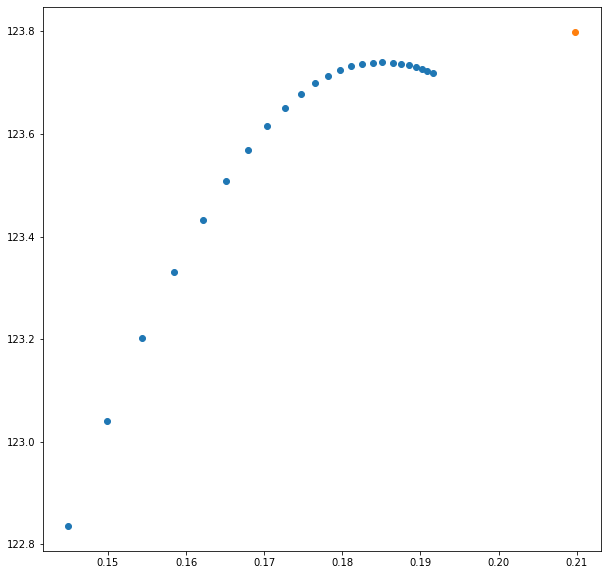

In [362]:
# print('du1:',du1,' ','u1:',u1,' ','J:',J_save)
# plt.scatter(np.squeeze(du1),np.squeeze(J_save))
plt.scatter(np.squeeze(u1),np.squeeze(J_save))
print(u1[-1,0],J_save[-1,0])
print("Goal values:",u_true[N-1,0],J[N-1])
plt.scatter(u_true[N-1,0],J[N-1])

0.6038098653964766 123.71919591768345
Goal values: 0.565676065166433 123.798804798705


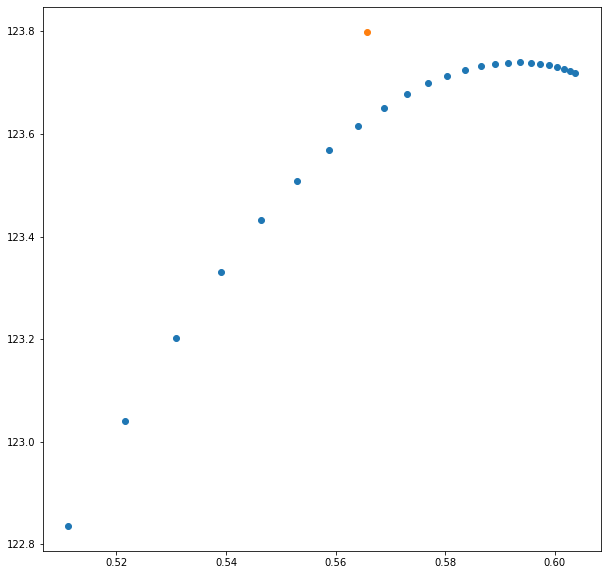

In [361]:
# print('du2:',du2,' ','u2:',u2,' ','J:',J_save)
# plt.scatter(np.squeeze(du1),np.squeeze(J_save))
plt.scatter(np.squeeze(u2),np.squeeze(J_save))
print(u2[-1,0],J_save[-1,0])
print("Goal values:",u_true[N-1,1],J[N-1])
plt.scatter(u_true[N-1,1],J[N-1])

In [122]:
i_save = 0
for i in range (N):
    if Ju_save[i,0] < -5000:
        i_save = [i_save, i]
        print("Ju greater than 1000",i_save)

Ju greater than 1000 [0, 62]
Ju greater than 1000 [[0, 62], 136]
Ju greater than 1000 [[[0, 62], 136], 217]
Ju greater than 1000 [[[[0, 62], 136], 217], 639]
Ju greater than 1000 [[[[[0, 62], 136], 217], 639], 656]


In [ ]:
plt.scatter(np.squeeze(u_true[:,0]), np.squeeze(u_save[:,0]))
plt.plot([0.1, 0.26], [0.1, 0.26], color="black", linestyle="dashed", linewidth=2.0)
plt.xlabel("u1_true")
plt.ylabel("u1_itergrated")

In [ ]:
plt.scatter(np.squeeze(u_true[:,1]), np.squeeze(u_save[:,1]))
plt.plot([max(u_true[:,1]), min(u_true[:,1])], [max(u_true[:,1]), min(u_true[:,1])], color="black", linestyle="dashed", linewidth=2.0)
plt.xlabel("u2_true")
plt.ylabel("u2_itergrated")

In [ ]:
#J-J_p in box plot
print("MAE test score of Cost:", metrics.mean_absolute_error(J[0:N], J_p))
print('Mean Squared Error of u_opt1::', metrics.mean_squared_error(J[0:N], J_p))
plt.scatter(J_p,J[0:N])
plt.plot([max(J[0:N]), min(J[0:N])], [max(J[0:N]), min(J[0:N])], color="black", linestyle="dashed", linewidth=2.0)
plt.xlabel("J_true")
plt.ylabel("J_predict")

Text(0, 0.5, 'Ju2_itergrated')

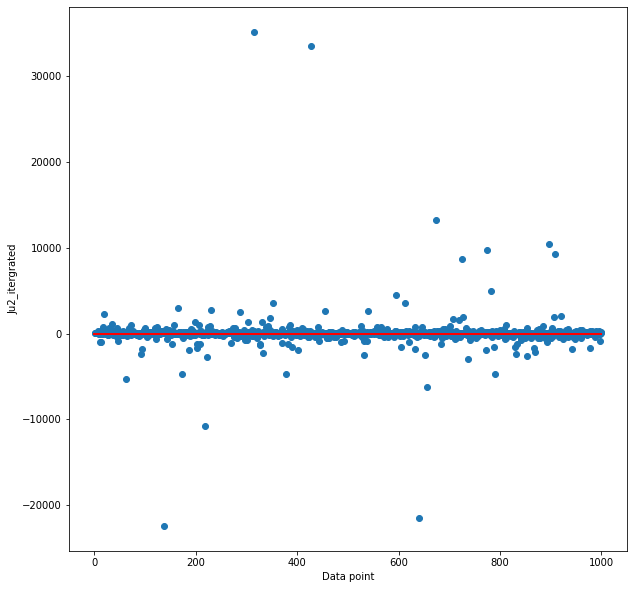

In [123]:
case = np.arange(1, N+1, 1)

plt.scatter(case,Ju_save[:,0])
# plt.ylim(-500, 500)
plt.plot([0,1000], [0,0], color="r", linestyle="solid", linewidth=2.0)
plt.xlabel("Data point")
plt.ylabel("Ju2_itergrated")

Text(0, 0.5, 'Ju2_itergrated')

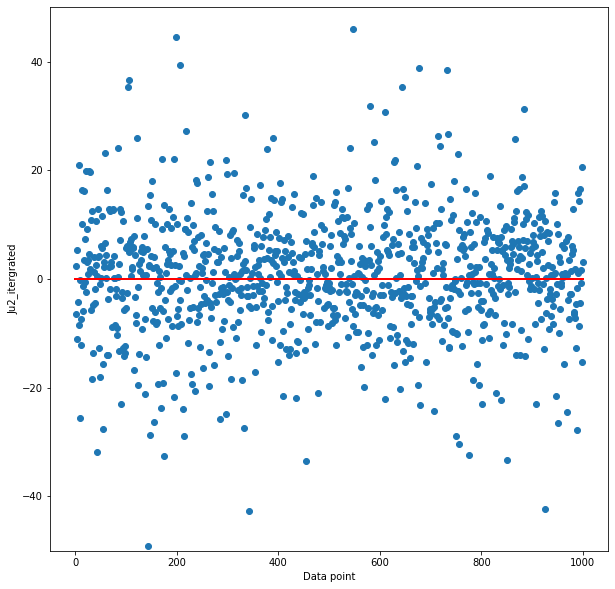

In [70]:
case = np.arange(1, N+1, 1)

plt.scatter(case,Ju_save[:,1])
plt.ylim(-50, 50)
plt.plot([0,1000], [0,0], color="r", linestyle="solid", linewidth=2.0)
plt.xlabel("Data point")
plt.ylabel("Ju2_itergrated")

Text(0, 0.5, 'Loss')

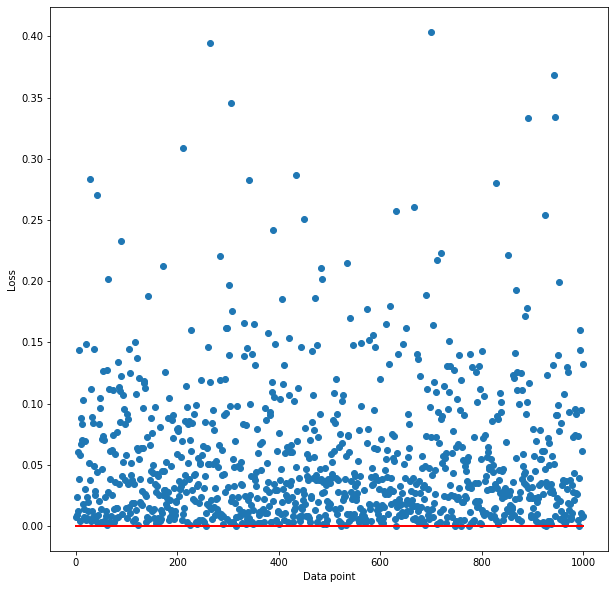

In [71]:
case = np.arange(1, N+1, 1)

plt.scatter(case,J-J_p)
#plt.ylim(-100, 100)
plt.plot([0,1000], [0,0], color="r", linestyle="solid", linewidth=2.0)
plt.xlabel("Data point")
plt.ylabel("Loss")

# Support vector regression

In [500]:
from sklearn.svm import SVR
regressor1 = SVR(kernel = 'rbf',tol=0.001,epsilon = 0.001)
regressor2 = SVR(kernel = 'rbf',tol=0.001,epsilon = 0.001)

In [501]:
                     ### Model of u_opt_1 ###
#Prepare data for model fitting:
T1_train = np.array(train_ds['x_train_1'])
T2_train = np.array(train_ds['x_train_2'])
T3_train = np.array(train_ds['x_train_3'])
T4_train = np.array(train_ds['x_train_4'])
T5_train = np.array(train_ds['x_train_5'])
T6_train = np.array(train_ds['x_train_6'])
T7_train = np.array(train_ds['x_train_7'])
x_train = np.array([T1_train,T2_train,T3_train,T4_train,T5_train,T6_train,T7_train]).transpose()
u1_train = np.array(train_ds["u_opt_1"])
u2_train = np.array(train_ds["u_opt_2"])
x_train.shape, u1_train.shape, u2_train.shape
#Model fitting:
regressor1.fit(x_train, u1_train)
regressor2.fit(x_train, u2_train)

SVR(epsilon=0.001)

In [502]:
testx = np.array([50,80,90,20,45,100,24]).reshape(-1,1).T
print(testx.shape)
u1predict = np.expand_dims(np.squeeze(regressor1.predict(testx)), axis =-1)
u2predict = np.expand_dims(np.squeeze(regressor2.predict(testx)), axis =-1)
print(u1predict)

(1, 7)
[0.16490338]


In [503]:
###############################Opened loop analysis:######################################
#Model prediction:
T1 = np.array(testdata['x_train_1'])
T2 = np.array(testdata['x_train_2'])
T3 = np.array(testdata['x_train_3'])
T4 = np.array(testdata['x_train_4'])
T5 = np.array(testdata['x_train_5'])
T6 = np.array(testdata['x_train_6'])
T7 = np.array(testdata['x_train_7'])
x = np.array([T1,T2,T3,T4,T5,T6,T7]).transpose()
print(x.shape)
u1_predict = np.expand_dims(np.squeeze(regressor1.predict(x)), axis =-1)
u2_predict = np.expand_dims(np.squeeze(regressor2.predict(x)), axis =-1)
#Model evaluation:
#Regression Metrics:
u1_true = np.array([testdata["u_opt_1"]]).T
u2_true = np.array([testdata["u_opt_2"]]).T

print('Mean Absolute Error of u_opt1:', metrics.mean_absolute_error(u1_true, u1_predict))
print('Mean Squared Error of u_opt1::', metrics.mean_squared_error(u1_true, u1_predict))
print('Root Mean Squared Error of u_opt1::', np.sqrt(metrics.mean_squared_error(u1_true, u1_predict)))
print('')
print('Mean Absolute Error of u_opt2:', metrics.mean_absolute_error(u2_true, u2_predict))
print('Mean Squared Error of u_opt2::', metrics.mean_squared_error(u2_true, u2_predict))
print('Root Mean Squared Error of u_opt2::', np.sqrt(metrics.mean_squared_error(u2_true, u2_predict)))

(1000, 7)
Mean Absolute Error of u_opt1: 0.010238375365542883
Mean Squared Error of u_opt1:: 0.00016693629770363747
Root Mean Squared Error of u_opt1:: 0.012920383032388686

Mean Absolute Error of u_opt2: 0.015747077147371308
Mean Squared Error of u_opt2:: 0.00038118253693794515
Root Mean Squared Error of u_opt2:: 0.019523896561341056


In [504]:
print(u1_predict)

[[0.16173054]
 [0.20195139]
 [0.1947541 ]
 [0.14410587]
 [0.16064576]
 [0.1915043 ]
 [0.14931724]
 [0.2128663 ]
 [0.15128094]
 [0.21540978]
 [0.15807159]
 [0.15839379]
 [0.14950186]
 [0.18369567]
 [0.20133001]
 [0.15858043]
 [0.18971849]
 [0.17749891]
 [0.20777786]
 [0.13519679]
 [0.17224845]
 [0.18761512]
 [0.14115032]
 [0.18666385]
 [0.17024325]
 [0.17930825]
 [0.17438385]
 [0.18172466]
 [0.16307828]
 [0.14983716]
 [0.20335149]
 [0.21025157]
 [0.17093026]
 [0.2067183 ]
 [0.20633387]
 [0.18665737]
 [0.18129853]
 [0.165063  ]
 [0.19944962]
 [0.17434147]
 [0.18154559]
 [0.19239212]
 [0.17091289]
 [0.16214462]
 [0.15666545]
 [0.15239885]
 [0.13859158]
 [0.19791161]
 [0.1788691 ]
 [0.15537217]
 [0.14363058]
 [0.159797  ]
 [0.19152218]
 [0.12933942]
 [0.19704643]
 [0.20231403]
 [0.20758273]
 [0.17020715]
 [0.18567675]
 [0.18625099]
 [0.15177825]
 [0.18766796]
 [0.14688834]
 [0.15694965]
 [0.18669959]
 [0.16577593]
 [0.21540498]
 [0.18474011]
 [0.19508951]
 [0.18874705]
 [0.18455379]
 [0.21

In [505]:
###############################Closed loop analysis:######################################
                         
#Define the parameter vector:
#x_train_1 = T_0 ; x_train_2 = T1; x_train_3 = Th1; x_train_4 = T2; x_train_5 = Th2
#x_train_6 = T3; x_train_7 = Th2
par_0 = np.expand_dims(np.array(par['dist_6']), axis =-1)
par_1 = np.expand_dims(np.array(par['dist_7']), axis =-1)
par_2 = np.expand_dims(np.array(par['dist_8']), axis =-1)
par_3 = np.expand_dims(np.array(par['dist_1']), axis =-1)
par_4 = np.expand_dims(np.array(par['dist_2']), axis =-1)
par_5 = np.expand_dims(np.array(par['dist_3']), axis =-1)
par_6 = np.expand_dims(np.array(par['dist_4']), axis =-1)
par_7 = np.expand_dims(np.array(par['dist_5']), axis =-1)
par_8 = np.expand_dims(np.array(par['dist_9']), axis =-1)
par_9 = np.expand_dims(np.array(par['dist_10']), axis =-1)
par_10 = np.expand_dims(np.array(par['dist_11']), axis =-1)
par1 = np.concatenate((par_0, par_1, par_2, 
                      par_3,par_4,
                      par_5,par_6,
                      par_7,par_8,
                      par_9,par_10),axis=1).transpose()
    

#Define two vectors u_opt_1 and u_opt_2:
u_true = np.concatenate((u1_true, u2_true), axis=1)
# For loop:
#Initialize the counter
N = 1000
datapoint = 0
J_p = np.zeros(N)
Ju1_save = np.zeros(N)
Ju2_save = np.zeros(N)
Ju_save = np.zeros((N,2))
u_save = np.zeros((N,2))
#For loop:
for i in range (N):
    datapoint = datapoint + 1
    print(" ")
    print("Data point :",datapoint)
    par_test = par1[:,i]
    y_x = x[i,:].reshape(1,-1)
    #print("intital y_x",y_x)
    u_n = [0.14,0.5]
    print("Intial values of u(n):",u_n)
    error = [1,1]
    u_np1 = u_n
    print("Intial values of u(n+1):",u_np1)
    c = -1
    J_pm1 = 0
    iter = 6
    u1 = np.zeros((iter,1))
    u2 = np.zeros((iter,1))
    du1 = np.zeros((iter,1))
    du2 = np.zeros((iter,1))
    J_save = np.zeros((iter,1))
    #while loop:
    while error[0] > 1e-3 or error[1] > 1e-3:
        u_np1 = SVR_model(y_x)
        print(u_np1)
        u_np1 = u_np1[0]
        c += 1
        ratio = 0.5
        u_np1 = u_n + (u_np1-u_n)*ratio
        #print("Update u(n)",u_n)
        y = np.expand_dims(np.array(plant(u_np1,par_test)), axis =-1).T
        y_x = np.expand_dims(np.array([y[0][1],y[0][2],y[0][3],y[0][4],y[0][5],y[0][6],y[0][7]]), axis =-1).T
        #print("updated y_x",y_x)
        J_p[i] = y[0][0]
        y_x = y_x + test_bias.values[i,:]
        print("optimal cost",J[i])
        print("updated cost",J_p[i])
        #print("Updated u(n+1)",u_np1)
        error = abs(u_np1 - u_n)
        du = (u_np1-u_n)*ratio
#         #Investigate convergence:
#         for j in range (iter):
#             if j == c:
#                 u1[j] = u_np1[0]
#                 u2[j] = u_np1[1]
#                 du1[j] = du[0]
#                 du2[j] = du[1]
#                 J_save[j] = J_p[i]
        print('u(n+1):',u_np1)
        print('u(n):',u_n)
        print('J(n+1)',J_p[i])
        print('J(n)',J_pm1)
        print('d_u',error)
        Jp_u1 = (J_p - J_pm1)/du[0]
        Jp_u2 = (J_p - J_pm1)/du[1]
        print("gradient J_u1",Jp_u1[i])
        print("gradient J_u2",Jp_u2[i])
        J_pm1 = y[0][0]
        u_n = u_np1
        print(" ")
        print("Iterations:",c,"Errors:",error)
        if c >= 1000:
            print("Data point is not converged")
            break
    
    Ju1_save[i] = Jp_u1[i]
    Ju2_save[i] = Jp_u2[i]
    u_save[i] = u_np1
    Ju_save = np.concatenate([Ju1_save.reshape(1,-1),Ju2_save.reshape(1,-1)]).T

 
Data point : 1
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.16173054 0.62337087]]
optimal cost 129.40940471503998
updated cost 128.99458269670305
u(n+1): [0.15086527 0.56168544]
u(n): [0.14, 0.5]
J(n+1) 128.99458269670305
J(n) 0
d_u [0.01086527 0.06168544]
gradient J_u1 23744.387873993837
gradient J_u2 4182.335044856509
 
Iterations: 0 Errors: [0.01086527 0.06168544]
[[0.16803814 0.63199911]]
optimal cost 129.40940471503998
updated cost 129.32827744456563
u(n+1): [0.1594517  0.59684227]
u(n): [0.15086527 0.56168544]
J(n+1) 129.32827744456563
J(n) 128.99458269670305
d_u [0.00858644 0.03515684]
gradient J_u1 77.7260260607484
gradient J_u2 18.98320718427832
 
Iterations: 1 Errors: [0.00858644 0.03515684]
[[0.16703372 0.6293458 ]]
optimal cost 129.40940471503998
updated cost 129.39630909418338
u(n+1): [0.16324271 0.61309404]
u(n): [0.1594517  0.59684227]
J(n+1) 129.39630909418338
J(n) 129.32827744456563
d_u [0.00379101 0.01625176]
gradient J_u1 35.891054038

[[0.19583646 0.64655317]]
optimal cost 152.232654457856
updated cost 152.1972498935236
u(n+1): [0.19372877 0.64217179]
u(n): [0.19162107 0.63779042]
J(n+1) 152.1972498935236
J(n) 152.1685363435818
d_u [0.0021077  0.00438137]
gradient J_u1 27.24637629542914
gradient J_u2 13.107103760783476
 
Iterations: 4 Errors: [0.0021077  0.00438137]
[[0.19583393 0.64648379]]
optimal cost 152.232654457856
updated cost 152.20819073114652
u(n+1): [0.19478135 0.64432779]
u(n): [0.19372877 0.64217179]
J(n+1) 152.20819073114652
J(n) 152.1972498935236
d_u [0.00105258 0.002156  ]
gradient J_u1 20.788518644645453
gradient J_u2 10.149200001740349
 
Iterations: 5 Errors: [0.00105258 0.002156  ]
[[0.19582359 0.64645353]]
optimal cost 152.232654457856
updated cost 152.21277974586843
u(n+1): [0.19530247 0.64539066]
u(n): [0.19478135 0.64432779]
J(n+1) 152.21277974586843
J(n) 152.20819073114652
d_u [0.00052112 0.00106287]
gradient J_u1 17.612200250873066
gradient J_u2 8.635165189702246
 
Iterations: 6 Errors: [0.0

optimal cost 132.99708727459299
updated cost 132.65226241856718
u(n+1): [0.1490358 0.57298  ]
u(n): [0.14, 0.5]
J(n+1) 132.65226241856718
J(n) 0
d_u [0.0090358 0.07298  ]
gradient J_u1 29361.501714440346
gradient J_u2 3635.3043859056706
 
Iterations: 0 Errors: [0.0090358 0.07298  ]
[[0.16591821 0.64813299]]
optimal cost 132.99708727459299
updated cost 132.92918292633235
u(n+1): [0.157477  0.6105565]
u(n): [0.1490358 0.57298  ]
J(n+1) 132.92918292633235
J(n) 132.65226241856718
d_u [0.00844121 0.0375765 ]
gradient J_u1 65.6115851703271
gradient J_u2 14.739027945167075
 
Iterations: 1 Errors: [0.00844121 0.0375765 ]
[[0.16547128 0.64486451]]
optimal cost 132.99708727459299
updated cost 132.94736850567745
u(n+1): [0.16147414 0.6277105 ]
u(n): [0.157477  0.6105565]
J(n+1) 132.94736850567745
J(n) 132.92918292633235
d_u [0.00399714 0.017154  ]
gradient J_u1 9.099294420916692
gradient J_u2 2.1202722662041604
 
Iterations: 2 Errors: [0.00399714 0.017154  ]
[[0.16494501 0.64356666]]
optimal cost

[[0.21548109 0.60821126]]
optimal cost 126.347976537859
updated cost 126.32398519363231
u(n+1): [0.21066651 0.60267063]
u(n): [0.20585193 0.59713   ]
J(n+1) 126.32398519363231
J(n) 126.2879820144019
d_u [0.00481458 0.00554063]
gradient J_u1 14.955892417033237
gradient J_u2 12.99606193984889
 
Iterations: 3 Errors: [0.00481458 0.00554063]
[[0.21507625 0.60774536]]
optimal cost 126.347976537859
updated cost 126.33514799232843
u(n+1): [0.21287138 0.60520799]
u(n): [0.21066651 0.60267063]
J(n+1) 126.33514799232843
J(n) 126.32398519363231
d_u [0.00220487 0.00253736]
gradient J_u1 10.12558547181177
gradient J_u2 8.798739749375732
 
Iterations: 4 Errors: [0.00220487 0.00253736]
[[0.21487602 0.60754315]]
optimal cost 126.347976537859
updated cost 126.33909918554625
u(n+1): [0.2138737  0.60637557]
u(n): [0.21287138 0.60520799]
J(n+1) 126.33909918554625
J(n) 126.33514799232843
d_u [0.00100232 0.00116758]
gradient J_u1 7.884064735671772
gradient J_u2 6.768185523345281
 
Iterations: 5 Errors: [0.0

[[0.17024325 0.64210375]]
optimal cost 143.77824199512
updated cost 143.17058572575755
u(n+1): [0.15512162 0.57105187]
u(n): [0.14, 0.5]
J(n+1) 143.17058572575755
J(n) 0
d_u [0.01512162 0.07105187]
gradient J_u1 18935.874596237732
gradient J_u2 4030.029858206073
 
Iterations: 0 Errors: [0.01512162 0.07105187]
[[0.17346681 0.65097224]]
optimal cost 143.77824199512
updated cost 143.63006373886873
u(n+1): [0.16429422 0.61101206]
u(n): [0.15512162 0.57105187]
J(n+1) 143.63006373886873
J(n) 143.17058572575755
d_u [0.00917259 0.03996019]
gradient J_u1 100.18499607562474
gradient J_u2 22.996790737850983
 
Iterations: 1 Errors: [0.00917259 0.03996019]
[[0.1744451  0.64862784]]
optimal cost 143.77824199512
updated cost 143.7116367101034
u(n+1): [0.16936966 0.62981995]
u(n): [0.16429422 0.61101206]
J(n+1) 143.7116367101034
J(n) 143.63006373886873
d_u [0.00507544 0.01880789]
gradient J_u1 32.14418063116975
gradient J_u2 8.674335318039425
 
Iterations: 2 Errors: [0.00507544 0.01880789]
[[0.1744343

[[0.15634059 0.66739802]]
optimal cost 133.21852653655898
updated cost 133.0570498874732
u(n+1): [0.15340802 0.64726491]
u(n): [0.15047545 0.6271318 ]
J(n+1) 133.0570498874732
J(n) 132.88552989580998
d_u [0.00293257 0.02013311]
gradient J_u1 116.97585081870034
gradient J_u2 17.038600755970688
 
Iterations: 2 Errors: [0.00293257 0.02013311]
[[0.15610262 0.66584295]]
optimal cost 133.21852653655898
updated cost 133.11052212048287
u(n+1): [0.15475532 0.65655393]
u(n): [0.15340802 0.64726491]
J(n+1) 133.11052212048287
J(n) 133.0570498874732
d_u [0.0013473  0.00928902]
gradient J_u1 79.37695960512309
gradient J_u2 11.51299731627609
 
Iterations: 3 Errors: [0.0013473  0.00928902]
[[0.15591542 0.66515959]]
optimal cost 133.21852653655898
updated cost 133.129475541737
u(n+1): [0.15533537 0.66085676]
u(n): [0.15475532 0.65655393]
J(n+1) 133.129475541737
J(n) 133.11052212048287
d_u [0.00058005 0.00430283]
gradient J_u1 65.35119415047485
gradient J_u2 8.809745938373133
 
Iterations: 4 Errors: [0.

gradient J_u1 5.914956663698142
gradient J_u2 2.2802674667538985
 
Iterations: 6 Errors: [0.00027364 0.00070983]
 
Data point : 37
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.18129853 0.54440076]]
optimal cost 120.21983570593099
updated cost 119.95205690078733
u(n+1): [0.16064926 0.52220038]
u(n): [0.14, 0.5]
J(n+1) 119.95205690078733
J(n) 0
d_u [0.02064926 0.02220038]
gradient J_u1 11618.046234421498
gradient J_u2 10806.30692341156
 
Iterations: 0 Errors: [0.02064926 0.02220038]
[[0.18974488 0.54382342]]
optimal cost 120.21983570593099
updated cost 120.12879298672541
u(n+1): [0.17519707 0.5330119 ]
u(n): [0.16064926 0.52220038]
J(n+1) 120.12879298672541
J(n) 119.95205690078733
d_u [0.01454781 0.01081152]
gradient J_u1 24.297282106416606
gradient J_u2 32.69403739041021
 
Iterations: 1 Errors: [0.01454781 0.01081152]
[[0.1874757  0.54306908]]
optimal cost 120.21983570593099
updated cost 120.17660325565257
u(n+1): [0.18133639 0.53804049]
u(n): [0.17519707 

[[0.16876273 0.57842814]]
optimal cost 139.101621949815
updated cost 139.09122726433228
u(n+1): [0.16860678 0.57789554]
u(n): [0.16845083 0.57736293]
J(n+1) 139.09122726433228
J(n) 139.091562205351
d_u [0.00015595 0.0005326 ]
gradient J_u1 -4.2955334570245425
gradient J_u2 -1.257746984074328
 
Iterations: 6 Errors: [0.00015595 0.0005326 ]
 
Data point : 45
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.15666545 0.6647475 ]]
optimal cost 145.24171433277098
updated cost 144.22144689281436
u(n+1): [0.14833273 0.58237375]
u(n): [0.14, 0.5]
J(n+1) 144.22144689281436
J(n) 0
d_u [0.00833273 0.08237375]
gradient J_u1 34615.670690048275
gradient J_u2 3501.635974091478
 
Iterations: 0 Errors: [0.00833273 0.08237375]
[[0.16376705 0.65254622]]
optimal cost 145.24171433277098
updated cost 144.858292609118
u(n+1): [0.15604989 0.61745999]
u(n): [0.14833273 0.58237375]
J(n+1) 144.858292609118
J(n) 144.22144689281436
d_u [0.00771716 0.03508623]
gradient J_u1 165.04663826246

optimal cost 142.867332794882
updated cost 142.86727104976907
u(n+1): [0.18208918 0.63827062]
u(n): [0.18059697 0.63423395]
J(n+1) 142.86727104976907
J(n) 142.86478054439422
d_u [0.00149222 0.00403667]
gradient J_u1 3.3379961166002294
gradient J_u2 1.233939220512374
 
Iterations: 4 Errors: [0.00149222 0.00403667]
[[0.18350774 0.64215806]]
optimal cost 142.867332794882
updated cost 142.8666302758285
u(n+1): [0.18279846 0.64021434]
u(n): [0.18208918 0.63827062]
J(n+1) 142.8666302758285
J(n) 142.86727104976907
d_u [0.00070928 0.00194372]
gradient J_u1 -1.8068361562677218
gradient J_u2 -0.6593279819736407
 
Iterations: 5 Errors: [0.00070928 0.00194372]
[[0.18346882 0.64208837]]
optimal cost 142.867332794882
updated cost 142.8658928043612
u(n+1): [0.18313364 0.64115135]
u(n): [0.18279846 0.64021434]
J(n+1) 142.8658928043612
J(n) 142.8666302758285
d_u [0.00033518 0.00093701]
gradient J_u1 -4.40043263558784
gradient J_u2 -1.574093515140505
 
Iterations: 6 Errors: [0.00033518 0.00093701]
 
Dat

d_u [0.02018902 0.00841207]
gradient J_u1 17.67462724738158
gradient J_u2 42.41921763676113
 
Iterations: 1 Errors: [0.02018902 0.00841207]
[[0.20617848 0.53649303]]
optimal cost 123.84687275486999
updated cost 123.82291814623993
u(n+1): [0.19744536 0.53247628]
u(n): [0.18871223 0.52845954]
J(n+1) 123.82291814623993
J(n) 123.79112162438273
d_u [0.00873313 0.00401675]
gradient J_u1 7.281819588843424
gradient J_u2 15.831980056451721
 
Iterations: 2 Errors: [0.00873313 0.00401675]
[[0.20489952 0.53657536]]
optimal cost 123.84687275486999
updated cost 123.82727993041193
u(n+1): [0.20117244 0.53452582]
u(n): [0.19744536 0.53247628]
J(n+1) 123.82727993041193
J(n) 123.82291814623993
d_u [0.00372708 0.00204954]
gradient J_u1 2.340590614611297
gradient J_u2 4.256360023424413
 
Iterations: 3 Errors: [0.00372708 0.00204954]
[[0.20432766 0.53666101]]
optimal cost 123.84687275486999
updated cost 123.82703463340974
u(n+1): [0.20275005 0.53559341]
u(n): [0.20117244 0.53452582]
J(n+1) 123.827034633409

gradient J_u1 21.959348679744444
gradient J_u2 8.86004416156337
 
Iterations: 1 Errors: [0.00841462 0.02085538]
[[0.16155507 0.59043041]]
optimal cost 117.660747883484
updated cost 117.66035271913994
u(n+1): [0.15792941 0.58063706]
u(n): [0.15430374 0.57084371]
J(n+1) 117.66035271913994
J(n) 117.64688806327003
d_u [0.00362566 0.00979335]
gradient J_u1 7.427414474619713
gradient J_u2 2.7497551575349437
 
Iterations: 2 Errors: [0.00362566 0.00979335]
[[0.1609823  0.58993826]]
optimal cost 117.660747883484
updated cost 117.66006691561947
u(n+1): [0.15945585 0.58528766]
u(n): [0.15792941 0.58063706]
J(n+1) 117.66006691561947
J(n) 117.66035271913994
d_u [0.00152644 0.0046506 ]
gradient J_u1 -0.37446955225215245
gradient J_u2 -0.12291035538116998
 
Iterations: 3 Errors: [0.00152644 0.0046506 ]
[[0.16072009 0.58972857]]
optimal cost 117.660747883484
updated cost 117.65850743002744
u(n+1): [0.16008797 0.58750811]
u(n): [0.15945585 0.58528766]
J(n+1) 117.65850743002744
J(n) 117.66006691561947
d

Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.16577593 0.57404071]]
optimal cost 124.07388006527799
updated cost 123.91585987433322
u(n+1): [0.15288797 0.53702036]
u(n): [0.14, 0.5]
J(n+1) 123.91585987433322
J(n) 0
d_u [0.01288797 0.03702036]
gradient J_u1 19229.698576895502
gradient J_u2 6694.471392975804
 
Iterations: 0 Errors: [0.01288797 0.03702036]
[[0.16830924 0.56534688]]
optimal cost 124.07388006527799
updated cost 124.02690580971083
u(n+1): [0.1605986  0.55118362]
u(n): [0.15288797 0.53702036]
J(n+1) 124.02690580971083
J(n) 123.91585987433322
d_u [0.00771064 0.01416326]
gradient J_u1 28.80331160675157
gradient J_u2 15.680844322165978
 
Iterations: 1 Errors: [0.00771064 0.01416326]
[[0.16709552 0.56453798]]
optimal cost 124.07388006527799
updated cost 124.05592336558608
u(n+1): [0.16384706 0.5578608 ]
u(n): [0.1605986  0.55118362]
J(n+1) 124.05592336558608
J(n) 124.02690580971083
d_u [0.00324846 0.00667718]
gradient J_u1 17.865446622112348
gradient

J(n+1) 132.28910254299248
J(n) 0
d_u [0.02437353 0.05892274]
gradient J_u1 10855.146638394428
gradient J_u2 4490.25627228721
 
Iterations: 0 Errors: [0.02437353 0.05892274]
[[0.19421146 0.62092279]]
optimal cost 132.77187700364
updated cost 132.66211082893636
u(n+1): [0.17929249 0.58992276]
u(n): [0.16437353 0.55892274]
J(n+1) 132.66211082893636
J(n) 132.28910254299248
d_u [0.01491897 0.03100002]
gradient J_u1 50.00457753708149
gradient J_u2 24.065031768854883
 
Iterations: 1 Errors: [0.01491897 0.03100002]
[[0.19310041 0.61909875]]
optimal cost 132.77187700364
updated cost 132.74834642048776
u(n+1): [0.18619645 0.60451076]
u(n): [0.17929249 0.58992276]
J(n+1) 132.74834642048776
J(n) 132.66211082893636
d_u [0.00690396 0.01458799]
gradient J_u1 24.981483215546785
gradient J_u2 11.822817667661802
 
Iterations: 2 Errors: [0.00690396 0.01458799]
[[0.19235566 0.61840072]]
optimal cost 132.77187700364
updated cost 132.76720175388127
u(n+1): [0.18927606 0.61145574]
u(n): [0.18619645 0.6045107

[[0.19614783 0.60809383]]
optimal cost 140.439119504147
updated cost 140.42845964749714
u(n+1): [0.19461656 0.60477364]
u(n): [0.1930853  0.60145344]
J(n+1) 140.42845964749714
J(n) 140.41678497727827
d_u [0.00153127 0.00332019]
gradient J_u1 15.248384539107153
gradient J_u2 7.032520937112875
 
Iterations: 4 Errors: [0.00153127 0.00332019]
[[0.19598887 0.60802358]]
optimal cost 140.439119504147
updated cost 140.4324991417342
u(n+1): [0.19530272 0.60639861]
u(n): [0.19461656 0.60477364]
J(n+1) 140.4324991417342
J(n) 140.42845964749714
d_u [0.00068615 0.00162497]
gradient J_u1 11.774346370144418
gradient J_u2 4.9717718992902125
 
Iterations: 5 Errors: [0.00068615 0.00162497]
[[0.19591457 0.60799049]]
optimal cost 140.439119504147
updated cost 140.4340699761816
u(n+1): [0.19560864 0.60719455]
u(n): [0.19530272 0.60639861]
J(n+1) 140.4340699761816
J(n) 140.4324991417342
d_u [0.00030593 0.00079594]
gradient J_u1 10.269361154808553
gradient J_u2 3.947121302386435
 
Iterations: 6 Errors: [0.00

[[0.18696705 0.57681634]]
optimal cost 116.90545225615
updated cost 116.90333583522792
u(n+1): [0.18132063 0.56669059]
u(n): [0.17567422 0.55656485]
J(n+1) 116.90333583522792
J(n) 116.87698480244481
d_u [0.00564641 0.01012575]
gradient J_u1 9.333723591596758
gradient J_u2 5.204759255713464
 
Iterations: 2 Errors: [0.00564641 0.01012575]
[[0.18590183 0.57616597]]
optimal cost 116.90545225615
updated cost 116.90498919188265
u(n+1): [0.18361123 0.57142828]
u(n): [0.18132063 0.56669059]
J(n+1) 116.90498919188265
J(n) 116.90333583522792
d_u [0.0022906  0.00473769]
gradient J_u1 1.4436014560797945
gradient J_u2 0.697958876910641
 
Iterations: 3 Errors: [0.0022906  0.00473769]
[[0.18543562 0.57590597]]
optimal cost 116.90545225615
updated cost 116.90362662486012
u(n+1): [0.18452343 0.57366713]
u(n): [0.18361123 0.57142828]
J(n+1) 116.90362662486012
J(n) 116.90498919188265
d_u [0.00091219 0.00223884]
gradient J_u1 -2.987448960295844
gradient J_u2 -1.2172068426856606
 
Iterations: 4 Errors: [0.

gradient J_u1 18.81774689493726
gradient J_u2 4.978229794529242
 
Iterations: 2 Errors: [0.00364835 0.01379081]
[[0.168047   0.61046293]]
optimal cost 130.626874197447
updated cost 130.59193151676791
u(n+1): [0.16641681 0.60398881]
u(n): [0.16478661 0.59751468]
J(n+1) 130.59193151676791
J(n) 130.58997985237033
d_u [0.0016302  0.00647412]
gradient J_u1 2.394392414427124
gradient J_u2 0.6029122715680229
 
Iterations: 3 Errors: [0.0016302  0.00647412]
[[0.16783343 0.61011439]]
optimal cost 130.626874197447
updated cost 130.58979150424378
u(n+1): [0.16712512 0.6070516 ]
u(n): [0.16641681 0.60398881]
J(n+1) 130.58979150424378
J(n) 130.59193151676791
d_u [0.00070831 0.00306279]
gradient J_u1 -6.0425837299869
gradient J_u2 -1.3974261324079347
 
Iterations: 4 Errors: [0.00070831 0.00306279]
[[0.16773185 0.60995924]]
optimal cost 130.626874197447
updated cost 130.58816997728871
u(n+1): [0.16742848 0.60850542]
u(n): [0.16712512 0.6070516 ]
J(n+1) 130.58816997728871
J(n) 130.58979150424378
d_u [0

u(n): [0.14, 0.5]
J(n+1) 132.98876444758716
J(n) 0
d_u [0.00640228 0.06253618]
gradient J_u1 41544.179858399635
gradient J_u2 4253.178214876724
 
Iterations: 0 Errors: [0.00640228 0.06253618]
[[0.15133165 0.62724939]]
optimal cost 133.732284718445
updated cost 133.39710647384342
u(n+1): [0.14886697 0.59489279]
u(n): [0.14640228 0.56253618]
J(n+1) 133.39710647384342
J(n) 132.98876444758716
d_u [0.00246468 0.0323566 ]
gradient J_u1 331.3543796301401
gradient J_u2 25.240105068830644
 
Iterations: 1 Errors: [0.00246468 0.0323566 ]
[[0.15139567 0.62487747]]
optimal cost 133.732284718445
updated cost 133.53272202448787
u(n+1): [0.15013132 0.60988513]
u(n): [0.14886697 0.59489279]
J(n+1) 133.53272202448787
J(n) 133.39710647384342
d_u [0.00126435 0.01499234]
gradient J_u1 214.52211615593072
gradient J_u2 18.09131014718019
 
Iterations: 2 Errors: [0.00126435 0.01499234]
[[0.15123576 0.62392015]]
optimal cost 133.732284718445
updated cost 133.583558316055
u(n+1): [0.15068354 0.61690264]
u(n): [0

gradient J_u2 21.251381472593472
 
Iterations: 1 Errors: [0.01087521 0.02179342]
[[0.18176475 0.5838131 ]]
optimal cost 127.90314831512501
updated cost 127.87211718736377
u(n+1): [0.17680926 0.57383922]
u(n): [0.17185378 0.56386533]
J(n+1) 127.87211718736377
J(n) 127.81244784660458
d_u [0.00495548 0.00997389]
gradient J_u1 24.08215630861185
gradient J_u2 11.96511420133739
 
Iterations: 2 Errors: [0.00495548 0.00997389]
[[0.18117953 0.58315687]]
optimal cost 127.90314831512501
updated cost 127.88903485475804
u(n+1): [0.1789944  0.57849804]
u(n): [0.17680926 0.57383922]
J(n+1) 127.88903485475804
J(n) 127.87211718736377
d_u [0.00218513 0.00465883]
gradient J_u1 15.484331669158161
gradient J_u2 7.262628843010301
 
Iterations: 3 Errors: [0.00218513 0.00465883]
[[0.18089219 0.58289463]]
optimal cost 127.90314831512501
updated cost 127.89450984111582
u(n+1): [0.1799433  0.58069634]
u(n): [0.1789944  0.57849804]
J(n+1) 127.89450984111582
J(n) 127.88903485475804
d_u [0.0009489  0.00219829]
grad

[[0.22575443 0.59724536]]
optimal cost 120.622629638827
updated cost 120.53821427979273
u(n+1): [0.20269049 0.57130528]
u(n): [0.17962655 0.54536519]
J(n+1) 120.53821427979273
J(n) 120.19592088835863
d_u [0.02306394 0.02594008]
gradient J_u1 29.682128357999428
gradient J_u2 26.391078973837754
 
Iterations: 1 Errors: [0.02306394 0.02594008]
[[0.22306531 0.59443026]]
optimal cost 120.622629638827
updated cost 120.58798436216203
u(n+1): [0.2128779  0.58286777]
u(n): [0.20269049 0.57130528]
J(n+1) 120.58798436216203
J(n) 120.53821427979273
d_u [0.01018741 0.01156249]
gradient J_u1 9.770902659945722
gradient J_u2 8.608887516089235
 
Iterations: 2 Errors: [0.01018741 0.01156249]
[[0.2216511  0.59339755]]
optimal cost 120.622629638827
updated cost 120.58742955504201
u(n+1): [0.2172645  0.58813266]
u(n): [0.2128779  0.58286777]
J(n+1) 120.58742955504201
J(n) 120.58798436216203
d_u [0.0043866  0.00526489]
gradient J_u1 -0.25295552987738895
gradient J_u2 -0.21075721694073388
 
Iterations: 3 Erro

Iterations: 4 Errors: [5.56236796e-05 2.63475878e-03]
[[0.14488263 0.58764772]]
optimal cost 130.319527467201
updated cost 130.3133230366859
u(n+1): [0.14487681 0.58636569]
u(n): [0.14487099 0.58508366]
J(n+1) 130.3133230366859
J(n) 130.31184408554077
d_u [5.81914735e-06 1.28202965e-03]
gradient J_u1 508.30510244106284
gradient J_u2 2.307202716110988
 
Iterations: 5 Errors: [5.81914735e-06 1.28202965e-03]
[[0.1448637  0.58761424]]
optimal cost 130.319527467201
updated cost 130.3139283080981
u(n+1): [0.14487026 0.58698996]
u(n): [0.14487681 0.58636569]
J(n+1) 130.3139283080981
J(n) 130.3133230366859
d_u [6.55694935e-06 6.24276437e-04]
gradient J_u1 -184.61982250964834
gradient J_u2 1.939113431194195
 
Iterations: 6 Errors: [6.55694935e-06 6.24276437e-04]
 
Data point : 113
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.14847666 0.64536856]]
optimal cost 123.785563570325
updated cost 123.494927157001
u(n+1): [0.14423833 0.57268428]
u(n): [0.14, 0.5]
J(n+1) 12

[[0.17406733 0.58694605]]
optimal cost 135.993280405841
updated cost 135.93000880963507
u(n+1): [0.17172746 0.58178594]
u(n): [0.16938759 0.57662582]
J(n+1) 135.93000880963507
J(n) 135.92116511959222
d_u [0.00233987 0.00516011]
gradient J_u1 7.559124250919951
gradient J_u2 3.4277107890737084
 
Iterations: 3 Errors: [0.00233987 0.00516011]
[[0.17387712 0.58681236]]
optimal cost 135.993280405841
updated cost 135.93134805004038
u(n+1): [0.17280229 0.58429915]
u(n): [0.17172746 0.58178594]
J(n+1) 135.93134805004038
J(n) 135.93000880963507
d_u [0.00107483 0.00251321]
gradient J_u1 2.4919995454719674
gradient J_u2 1.0657607137372833
 
Iterations: 4 Errors: [0.00107483 0.00251321]
[[0.17378373 0.58675966]]
optimal cost 135.993280405841
updated cost 135.93138680038567
u(n+1): [0.17329301 0.5855294 ]
u(n): [0.17280229 0.58429915]
J(n+1) 135.93138680038567
J(n) 135.93134805004038
d_u [0.00049072 0.00123026]
gradient J_u1 0.1579325636852154
gradient J_u2 0.06299559655311704
 
Iterations: 5 Errors

[[0.19610312 0.57570694]]
optimal cost 112.402607272824
updated cost 112.36884021372028
u(n+1): [0.19462635 0.57397639]
u(n): [0.19314957 0.57224584]
J(n+1) 112.36884021372028
J(n) 112.36142327486941
d_u [0.00147678 0.00173055]
gradient J_u1 10.044776525994699
gradient J_u2 8.571788617255518
 
Iterations: 4 Errors: [0.00147678 0.00173055]
[[0.19588547 0.57558788]]
optimal cost 112.402607272824
updated cost 112.37173431616793
u(n+1): [0.19525591 0.57478214]
u(n): [0.19462635 0.57397639]
J(n+1) 112.37173431616793
J(n) 112.36884021372028
d_u [0.00062956 0.00080575]
gradient J_u1 9.194016602404544
gradient J_u2 7.1836645363794736
 
Iterations: 5 Errors: [0.00062956 0.00080575]
 
Data point : 126
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.15816513 0.61305847]]
optimal cost 128.271532480503
updated cost 128.03086955408372
u(n+1): [0.14908257 0.55652924]
u(n): [0.14, 0.5]
J(n+1) 128.03086955408372
J(n) 0
d_u [0.00908257 0.05652924]
gradient J_u1 28192.66558881

 
Iterations: 3 Errors: [0.00123818 0.00395639]
[[0.16409582 0.56049494]]
optimal cost 118.718382769091
updated cost 118.69961734381963
u(n+1): [0.16358939 0.5585813 ]
u(n): [0.16308295 0.55666767]
J(n+1) 118.69961734381963
J(n) 118.69488674209919
d_u [0.00050644 0.00191363]
gradient J_u1 18.681884958397006
gradient J_u2 4.9441034248892475
 
Iterations: 4 Errors: [0.00050644 0.00191363]
[[0.16399627 0.56043724]]
optimal cost 118.718382769091
updated cost 118.70156641470099
u(n+1): [0.16379283 0.55950927]
u(n): [0.16358939 0.5585813 ]
J(n+1) 118.70156641470099
J(n) 118.69961734381963
d_u [0.00020344 0.00092797]
gradient J_u1 19.160996467958093
gradient J_u2 4.200722602172605
 
Iterations: 5 Errors: [0.00020344 0.00092797]
 
Data point : 131
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.17412565 0.61714388]]
optimal cost 146.131207744342
updated cost 145.5514013274069
u(n+1): [0.15706283 0.55857194]
u(n): [0.14, 0.5]
J(n+1) 145.5514013274069
J(n) 0
d_u [0.01

d_u [0.0127064  0.02497839]
gradient J_u1 47.34028420355198
gradient J_u2 24.081805516318582
 
Iterations: 1 Errors: [0.0127064  0.02497839]
[[0.18255896 0.59491249]]
optimal cost 120.964236433631
updated cost 120.87960832491392
u(n+1): [0.17705435 0.58330178]
u(n): [0.17154975 0.57169107]
J(n+1) 120.87960832491392
J(n) 120.7891522675873
d_u [0.0055046  0.01161071]
gradient J_u1 32.865608273324526
gradient J_u2 15.581485209252802
 
Iterations: 2 Errors: [0.0055046  0.01161071]
[[0.18171292 0.59423542]]
optimal cost 120.964236433631
updated cost 120.91049715817562
u(n+1): [0.17938364 0.5887686 ]
u(n): [0.17705435 0.58330178]
J(n+1) 120.91049715817562
J(n) 120.87960832491392
d_u [0.00232928 0.00546682]
gradient J_u1 26.522196044300227
gradient J_u2 11.30047351291373
 
Iterations: 3 Errors: [0.00232928 0.00546682]
[[0.18132327 0.59395171]]
optimal cost 120.964236433631
updated cost 120.9223620337444
u(n+1): [0.18035345 0.59136015]
u(n): [0.17938364 0.5887686 ]
J(n+1) 120.9223620337444
J(n

[[0.22592575 0.56260374]]
optimal cost 121.135532112852
updated cost 121.1079163526703
u(n+1): [0.21535477 0.55546513]
u(n): [0.20478379 0.54832652]
J(n+1) 121.1079163526703
J(n) 121.04588407254633
d_u [0.01057098 0.00713861]
gradient J_u1 11.736332176531038
gradient J_u2 17.37937068840378
 
Iterations: 2 Errors: [0.01057098 0.00713861]
[[0.22476245 0.56176345]]
optimal cost 121.135532112852
updated cost 121.12042234639594
u(n+1): [0.22005861 0.55861429]
u(n): [0.21535477 0.55546513]
J(n+1) 121.12042234639594
J(n) 121.1079163526703
d_u [0.00470384 0.00314916]
gradient J_u1 5.317355164014899
gradient J_u2 7.9424327710024585
 
Iterations: 3 Errors: [0.00470384 0.00314916]
[[0.22420408 0.56144819]]
optimal cost 121.135532112852
updated cost 121.12295409327118
u(n+1): [0.22213135 0.56003124]
u(n): [0.22005861 0.55861429]
J(n+1) 121.12295409327118
J(n) 121.12042234639594
d_u [0.00207274 0.00141695]
gradient J_u1 2.442902773897899
gradient J_u2 3.573516086340258
 
Iterations: 4 Errors: [0.00

[[0.2011477  0.55536559]]
optimal cost 133.516636962219
updated cost 133.49049948237476
u(n+1): [0.1995104  0.55369489]
u(n): [0.19787309 0.55202418]
J(n+1) 133.49049948237476
J(n) 133.48245042844943
d_u [0.00163731 0.00167071]
gradient J_u1 9.832070472970353
gradient J_u2 9.635507047619328
 
Iterations: 4 Errors: [0.00163731 0.00167071]
[[0.20091028 0.55542546]]
optimal cost 133.516636962219
updated cost 133.49344092596604
u(n+1): [0.20021034 0.55456017]
u(n): [0.1995104  0.55369489]
J(n+1) 133.49344092596604
J(n) 133.49049948237476
d_u [0.00069994 0.00086529]
gradient J_u1 8.404850363072606
gradient J_u2 6.798770508311602
 
Iterations: 5 Errors: [0.00069994 0.00086529]
 
Data point : 148
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.16259526 0.63739564]]
optimal cost 125.885089884232
updated cost 125.3260236521721
u(n+1): [0.15129763 0.56869782]
u(n): [0.14, 0.5]
J(n+1) 125.3260236521721
J(n) 0
d_u [0.01129763 0.06869782]
gradient J_u1 22186.254114149768

J(n) 124.38008901627956
d_u [0.00848247 0.01082728]
gradient J_u1 8.299364307659486
gradient J_u2 6.502012966507694
 
Iterations: 2 Errors: [0.00848247 0.01082728]
[[0.20937655 0.59199435]]
optimal cost 124.422172789272
updated cost 124.41302708600435
u(n+1): [0.20573048 0.58697935]
u(n): [0.20208441 0.58196435]
J(n+1) 124.41302708600435
J(n) 124.41528856106646
d_u [0.00364607 0.005015  ]
gradient J_u1 -1.2405013623826584
gradient J_u2 -0.9018845673195136
 
Iterations: 3 Errors: [0.00364607 0.005015  ]
[[0.20881886 0.59167899]]
optimal cost 124.422172789272
updated cost 124.40813615742574
u(n+1): [0.20727467 0.58932917]
u(n): [0.20573048 0.58697935]
J(n+1) 124.40813615742574
J(n) 124.41302708600435
d_u [0.00154419 0.00234982]
gradient J_u1 -6.334627920277055
gradient J_u2 -4.162805757624167
 
Iterations: 4 Errors: [0.00154419 0.00234982]
[[0.20857139 0.59154321]]
optimal cost 124.422172789272
updated cost 124.40509762583326
u(n+1): [0.20792303 0.59043619]
u(n): [0.20727467 0.58932917]


Iterations: 3 Errors: [0.00338679 0.00542972]
[[0.20157858 0.59114952]]
optimal cost 133.550559934553
updated cost 133.53066821942525
u(n+1): [0.2001008  0.58851888]
u(n): [0.19862302 0.58588825]
J(n+1) 133.53066821942525
J(n) 133.53931300601397
d_u [0.00147778 0.00263063]
gradient J_u1 -11.69967815058022
gradient J_u2 -6.572396465664405
 
Iterations: 4 Errors: [0.00147778 0.00263063]
[[0.20137856 0.59107647]]
optimal cost 133.550559934553
updated cost 133.5256880655696
u(n+1): [0.20073968 0.58979767]
u(n): [0.2001008  0.58851888]
J(n+1) 133.5256880655696
J(n) 133.53066821942525
d_u [0.00063888 0.00127879]
gradient J_u1 -15.590329583647387
gradient J_u2 -7.788848407258402
 
Iterations: 5 Errors: [0.00063888 0.00127879]
[[0.20128857 0.59104204]]
optimal cost 133.550559934553
updated cost 133.52314658333984
u(n+1): [0.20101412 0.59041986]
u(n): [0.20073968 0.58979767]
J(n+1) 133.52314658333984
J(n) 133.5256880655696
d_u [0.00027444 0.00062218]
gradient J_u1 -18.52097096979332
gradient J_

gradient J_u1 45586.992069459164
gradient J_u2 5717.269919605112
 
Iterations: 0 Errors: [0.0056278  0.04487356]
[[0.16633899 0.58026739]]
optimal cost 128.417950675388
updated cost 128.40032501495642
u(n+1): [0.15598339 0.56257048]
u(n): [0.1456278  0.54487356]
J(n+1) 128.40032501495642
J(n) 128.27713361396957
d_u [0.0103556  0.01769692]
gradient J_u1 23.792238827335222
gradient J_u2 13.922358877781948
 
Iterations: 1 Errors: [0.0103556  0.01769692]
[[0.16466307 0.57945785]]
optimal cost 128.417950675388
updated cost 128.4175402524585
u(n+1): [0.16032323 0.57101416]
u(n): [0.15598339 0.56257048]
J(n+1) 128.4175402524585
J(n) 128.40032501495642
d_u [0.00433984 0.00844369]
gradient J_u1 7.933578681686449
gradient J_u2 4.077659707292227
 
Iterations: 2 Errors: [0.00433984 0.00844369]
[[0.16387869 0.57922065]]
optimal cost 128.417950675388
updated cost 128.41689642637246
u(n+1): [0.16210096 0.5751174 ]
u(n): [0.16032323 0.57101416]
J(n+1) 128.41689642637246
J(n) 128.4175402524585
d_u [0.0

u(n): [0.20599638 0.62018342]
J(n+1) 138.22725551900896
J(n) 138.23362291391012
d_u [0.00098536 0.00155705]
gradient J_u1 -12.924025032635017
gradient J_u2 -8.178786811803684
 
Iterations: 5 Errors: [0.00098536 0.00155705]
[[0.20789062 0.62322341]]
optimal cost 138.276702510368
updated cost 138.2238725911273
u(n+1): [0.20743618 0.62248194]
u(n): [0.20698174 0.62174047]
J(n+1) 138.2238725911273
J(n) 138.22725551900896
d_u [0.00045444 0.00074147]
gradient J_u1 -14.888438573130173
gradient J_u2 -9.124958217002318
 
Iterations: 6 Errors: [0.00045444 0.00074147]
 
Data point : 168
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.16265775 0.59540088]]
optimal cost 123.032979254366
updated cost 122.74922387114881
u(n+1): [0.15132888 0.54770044]
u(n): [0.14, 0.5]
J(n+1) 122.74922387114881
J(n) 0
d_u [0.01132888 0.04770044]
gradient J_u1 21670.150753308575
gradient J_u2 5146.670564295717
 
Iterations: 0 Errors: [0.01132888 0.04770044]
[[0.16985419 0.58978445]]
optimal

[[0.16169541 0.57280991]]
optimal cost 128.753304144736
updated cost 128.7036652797255
u(n+1): [0.16141168 0.57180283]
u(n): [0.16112794 0.57079574]
J(n+1) 128.7036652797255
J(n) 128.7078926695229
d_u [0.00028373 0.00100709]
gradient J_u1 -29.798483143518876
gradient J_u2 -8.39528536931926
 
Iterations: 5 Errors: [0.00028373 0.00100709]
[[0.16166186 0.57280047]]
optimal cost 128.753304144736
updated cost 128.7015075310879
u(n+1): [0.16153677 0.57230165]
u(n): [0.16141168 0.57180283]
J(n+1) 128.7015075310879
J(n) 128.7036652797255
d_u [0.00012509 0.00049882]
gradient J_u1 -34.498220543171506
gradient J_u2 -8.651388774442339
 
Iterations: 6 Errors: [0.00012509 0.00049882]
 
Data point : 173
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.19362599 0.58433917]]
optimal cost 126.634050105095
updated cost 126.08487164187991
u(n+1): [0.16681299 0.54216958]
u(n): [0.14, 0.5]
J(n+1) 126.08487164187991
J(n) 0
d_u [0.02681299 0.04216958]
gradient J_u1 9404.758619300133

[[0.19721706 0.55719013]]
optimal cost 128.46231363293302
updated cost 128.45648841570318
u(n+1): [0.18292533 0.54433184]
u(n): [0.16863359 0.53147355]
J(n+1) 128.45648841570318
J(n) 128.37352786762708
d_u [0.01429173 0.01285829]
gradient J_u1 11.60958397282526
gradient J_u2 12.903819079267837
 
Iterations: 1 Errors: [0.01429173 0.01285829]
[[0.1957292  0.55676101]]
optimal cost 128.46231363293302
updated cost 128.46138789567075
u(n+1): [0.18932726 0.55054643]
u(n): [0.18292533 0.54433184]
J(n+1) 128.46138789567075
J(n) 128.45648841570318
d_u [0.00640194 0.00621458]
gradient J_u1 1.5306239443100673
gradient J_u2 1.5767682672617354
 
Iterations: 2 Errors: [0.00640194 0.00621458]
[[0.19498509 0.55670169]]
optimal cost 128.46231363293302
updated cost 128.4561956838684
u(n+1): [0.19215618 0.55362406]
u(n): [0.18932726 0.55054643]
J(n+1) 128.4561956838684
J(n) 128.46138789567075
d_u [0.00282891 0.00307763]
gradient J_u1 -3.670815638290349
gradient J_u2 -3.3741595597684797
 
Iterations: 3 Er

Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.17914496 0.62596645]]
optimal cost 149.978761808146
updated cost 148.8727103790471
u(n+1): [0.15957248 0.56298323]
u(n): [0.14, 0.5]
J(n+1) 148.8727103790471
J(n) 0
d_u [0.01957248 0.06298323]
gradient J_u1 15212.451637037633
gradient J_u2 4727.376442780971
 
Iterations: 0 Errors: [0.01957248 0.06298323]
[[0.18571162 0.63092087]]
optimal cost 149.978761808146
updated cost 149.57272549230757
u(n+1): [0.17264205 0.59695205]
u(n): [0.15957248 0.56298323]
J(n+1) 149.57272549230757
J(n) 148.8727103790471
d_u [0.01306957 0.03396882]
gradient J_u1 107.12135506282846
gradient J_u2 41.21515601858801
 
Iterations: 1 Errors: [0.01306957 0.03396882]
[[0.18671918 0.62983259]]
optimal cost 149.978761808146
updated cost 149.79172646065643
u(n+1): [0.17968061 0.61339232]
u(n): [0.17264205 0.59695205]
J(n+1) 149.79172646065643
J(n) 149.57272549230757
d_u [0.00703856 0.01644027]
gradient J_u1 62.22890194071439
gradient J_u2 26.6

[[0.17834728 0.55113204]]
optimal cost 134.76035334967898
updated cost 134.67209716426294
u(n+1): [0.16586777 0.54079771]
u(n): [0.15338826 0.53046338]
J(n+1) 134.67209716426294
J(n) 134.50592916035032
d_u [0.01247951 0.01033433]
gradient J_u1 26.630539450307204
gradient J_u2 32.15843693470971
 
Iterations: 1 Errors: [0.01247951 0.01033433]
[[0.17670806 0.55127389]]
optimal cost 134.76035334967898
updated cost 134.7188583044906
u(n+1): [0.17128791 0.5460358 ]
u(n): [0.16586777 0.54079771]
J(n+1) 134.7188583044906
J(n) 134.67209716426294
d_u [0.00542014 0.00523809]
gradient J_u1 17.254578952129382
gradient J_u2 17.85427873189112
 
Iterations: 2 Errors: [0.00542014 0.00523809]
[[0.17593957 0.55146051]]
optimal cost 134.76035334967898
updated cost 134.73380377890237
u(n+1): [0.17361374 0.54874815]
u(n): [0.17128791 0.5460358 ]
J(n+1) 134.73380377890237
J(n) 134.7188583044906
d_u [0.00232583 0.00271236]
gradient J_u1 12.851739768178248
gradient J_u2 11.02029164251836
 
Iterations: 3 Errors

[[0.14873754 0.59561962]]
optimal cost 123.20583219747
updated cost 123.14438919051611
u(n+1): [0.14871871 0.59431573]
u(n): [0.14869988 0.59301184]
J(n+1) 123.14438919051611
J(n) 123.14947500800375
d_u [1.88307495e-05 1.30388909e-03]
gradient J_u1 -540.1609210221246
gradient J_u2 -7.800997062130139
 
Iterations: 5 Errors: [1.88307495e-05 1.30388909e-03]
[[0.1487148  0.59557328]]
optimal cost 123.20583219747
updated cost 123.14188922641625
u(n+1): [0.14871675 0.5949445 ]
u(n): [0.14871871 0.59431573]
J(n+1) 123.14188922641625
J(n) 123.14438919051611
d_u [1.95362049e-06 6.28775535e-04]
gradient J_u1 2559.3139612139926
gradient J_u2 -7.95184914423562
 
Iterations: 6 Errors: [1.95362049e-06 6.28775535e-04]
 
Data point : 203
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.16318189 0.59501141]]
optimal cost 136.090435342029
updated cost 135.71173521964863
u(n+1): [0.15159095 0.5475057 ]
u(n): [0.14, 0.5]
J(n+1) 135.71173521964863
J(n) 0
d_u [0.01159095 0.0475057

[[0.17140712 0.59234404]]
optimal cost 139.710675409027
updated cost 139.6860565372125
u(n+1): [0.16919118 0.58708683]
u(n): [0.16697523 0.58182963]
J(n+1) 139.6860565372125
J(n) 139.66419445781534
d_u [0.00221595 0.00525721]
gradient J_u1 19.731589434316483
gradient J_u2 8.316991664946368
 
Iterations: 3 Errors: [0.00221595 0.00525721]
[[0.17125562 0.59224116]]
optimal cost 139.710675409027
updated cost 139.69378813276253
u(n+1): [0.1702234  0.58966399]
u(n): [0.16919118 0.58708683]
J(n+1) 139.69378813276253
J(n) 139.6860565372125
d_u [0.00103222 0.00257716]
gradient J_u1 14.980466806400289
gradient J_u2 6.000087202814466
 
Iterations: 4 Errors: [0.00103222 0.00257716]
[[0.17117934 0.59220029]]
optimal cost 139.710675409027
updated cost 139.69687241805042
u(n+1): [0.17070137 0.59093214]
u(n): [0.1702234  0.58966399]
J(n+1) 139.69687241805042
J(n) 139.69378813276253
d_u [0.00047797 0.00126815]
gradient J_u1 12.905801837656798
gradient J_u2 4.8642310197965495
 
Iterations: 5 Errors: [0.

[[0.15948698 0.66095076]]
optimal cost 138.44172744776301
updated cost 138.43123070250448
u(n+1): [0.15893681 0.65660159]
u(n): [0.15838664 0.65225243]
J(n+1) 138.43123070250448
J(n) 138.41999240012765
d_u [0.00055017 0.00434917]
gradient J_u1 40.8537296928711
gradient J_u2 5.168024688291766
 
Iterations: 4 Errors: [0.00055017 0.00434917]
[[0.15944047 0.66065803]]
optimal cost 138.44172744776301
updated cost 138.435023526475
u(n+1): [0.15918864 0.65862981]
u(n): [0.15893681 0.65660159]
J(n+1) 138.435023526475
J(n) 138.43123070250448
d_u [0.00025183 0.00202822]
gradient J_u1 30.122360778332716
gradient J_u2 3.740051621278007
 
Iterations: 5 Errors: [0.00025183 0.00202822]
[[0.15941569 0.66052335]]
optimal cost 138.44172744776301
updated cost 138.43647364239462
u(n+1): [0.15930216 0.65957658]
u(n): [0.15918864 0.65862981]
J(n+1) 138.43647364239462
J(n) 138.435023526475
d_u [0.00011353 0.00094677]
gradient J_u1 25.546658285785153
gradient J_u2 3.0633010646071175
 
Iterations: 6 Errors: [0

[[0.19248253 0.58811613]]
optimal cost 132.862476763441
updated cost 132.2073868226837
u(n+1): [0.16624127 0.54405806]
u(n): [0.14, 0.5]
J(n+1) 132.2073868226837
J(n) 0
d_u [0.02624127 0.04405806]
gradient J_u1 10076.296540486252
gradient J_u2 6001.506931676635
 
Iterations: 0 Errors: [0.02624127 0.04405806]
[[0.20866161 0.57383877]]
optimal cost 132.862476763441
updated cost 132.5877388328724
u(n+1): [0.18745144 0.55894842]
u(n): [0.16624127 0.54405806]
J(n+1) 132.5877388328724
J(n) 132.2073868226837
d_u [0.02121017 0.01489035]
gradient J_u1 35.86505914076432
gradient J_u2 51.08704247312956
 
Iterations: 1 Errors: [0.02121017 0.01489035]
[[0.20655508 0.5728491 ]]
optimal cost 132.862476763441
updated cost 132.6977099079231
u(n+1): [0.19700326 0.56589876]
u(n): [0.18745144 0.55894842]
J(n+1) 132.6977099079231
J(n) 132.5877388328724
d_u [0.00955182 0.00695034]
gradient J_u1 23.0262015210358
gradient J_u2 31.644781992200972
 
Iterations: 2 Errors: [0.00955182 0.00695034]
[[0.20544875 0.5

d_u [0.00026922 0.00053377]
gradient J_u1 -12.447651646962115
gradient J_u2 -6.278317384766278
 
Iterations: 6 Errors: [0.00026922 0.00053377]
 
Data point : 226
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.20681681 0.6055825 ]]
optimal cost 130.136546059676
updated cost 129.7428843470888
u(n+1): [0.1734084  0.55279125]
u(n): [0.14, 0.5]
J(n+1) 129.7428843470888
J(n) 0
d_u [0.0334084  0.05279125]
gradient J_u1 7767.08100692322
gradient J_u2 4915.317991526614
 
Iterations: 0 Errors: [0.0334084  0.05279125]
[[0.2118001  0.60450432]]
optimal cost 130.136546059676
updated cost 130.06064804381282
u(n+1): [0.19260425 0.57864778]
u(n): [0.1734084  0.55279125]
J(n+1) 130.06064804381282
J(n) 129.7428843470888
d_u [0.01919585 0.02585654]
gradient J_u1 33.10754493082483
gradient J_u2 24.578983871422032
 
Iterations: 1 Errors: [0.01919585 0.02585654]
[[0.2102593  0.60273933]]
optimal cost 130.136546059676
updated cost 130.12487915284441
u(n+1): [0.20143178 0.59069355

[[0.18636756 0.56166927]]
optimal cost 133.593815719765
updated cost 133.5571942562419
u(n+1): [0.18588027 0.56063813]
u(n): [0.18539298 0.55960699]
J(n+1) 133.5571942562419
J(n) 133.5595121248573
d_u [0.00048729 0.00103114]
gradient J_u1 -9.513342745513212
gradient J_u2 -4.495738369243885
 
Iterations: 5 Errors: [0.00048729 0.00103114]
[[0.1862927  0.56170142]]
optimal cost 133.593815719765
updated cost 133.55581544437246
u(n+1): [0.18608648 0.56116977]
u(n): [0.18588027 0.56063813]
J(n+1) 133.55581544437246
J(n) 133.5571942562419
d_u [0.00020621 0.00053164]
gradient J_u1 -13.372688564547655
gradient J_u2 -5.187001246953888
 
Iterations: 6 Errors: [0.00020621 0.00053164]
 
Data point : 230
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.15244346 0.58090286]]
optimal cost 122.457219903536
updated cost 122.24703310466188
u(n+1): [0.14622173 0.54045143]
u(n): [0.14, 0.5]
J(n+1) 122.24703310466188
J(n) 0
d_u [0.00622173 0.04045143]
gradient J_u1 39296.809898522

Iterations: 0 Errors: [0.02150102 0.04182982]
[[0.1841548  0.58300384]]
optimal cost 139.366522858997
updated cost 139.27118981412286
u(n+1): [0.17282791 0.56241683]
u(n): [0.16150102 0.54182982]
J(n+1) 139.27118981412286
J(n) 139.0907371549598
d_u [0.01132689 0.02058701]
gradient J_u1 31.862701384182884
gradient J_u2 17.530731563312557
 
Iterations: 1 Errors: [0.01132689 0.02058701]
[[0.18353276 0.58263072]]
optimal cost 139.366522858997
updated cost 139.30396166488532
u(n+1): [0.17818034 0.57252378]
u(n): [0.17282791 0.56241683]
J(n+1) 139.30396166488532
J(n) 139.27118981412286
d_u [0.00535243 0.01010695]
gradient J_u1 12.245605668851855
gradient J_u2 6.485015192249473
 
Iterations: 2 Errors: [0.00535243 0.01010695]
[[0.18310148 0.58264689]]
optimal cost 139.366522858997
updated cost 139.30562523730785
u(n+1): [0.18064091 0.57758533]
u(n): [0.17818034 0.57252378]
J(n+1) 139.30562523730785
J(n) 139.30396166488532
d_u [0.00246057 0.00506156]
gradient J_u1 1.3521834226845564
gradient J_

gradient J_u1 10.84771862862609
gradient J_u2 0.35806039301010073
 
Iterations: 5 Errors: [7.10524307e-05 2.15258876e-03]
[[0.14239932 0.67412351]]
optimal cost 136.44670760343
updated cost 136.4449904766892
u(n+1): [0.14236783 0.67312302]
u(n): [0.14233633 0.67212253]
J(n+1) 136.4449904766892
J(n) 136.44509232130974
d_u [3.14942495e-05 1.00049107e-03]
gradient J_u1 -6.467505787731598
gradient J_u2 -0.20358926419423742
 
Iterations: 6 Errors: [3.14942495e-05 1.00049107e-03]
[[0.14239512 0.6740534 ]]
optimal cost 136.44670760343
updated cost 136.44488281454397
u(n+1): [0.14238147 0.67358821]
u(n): [0.14236783 0.67312302]
J(n+1) 136.44488281454397
J(n) 136.4449904766892
d_u [1.36449695e-05 4.65190101e-04]
gradient J_u1 -15.780488905400874
gradient J_u2 -0.4628737586712298
 
Iterations: 7 Errors: [1.36449695e-05 4.65190101e-04]
 
Data point : 244
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.18612631 0.57560871]]
optimal cost 126.749847399275
updated cost 126

d_u [0.00635633 0.00445878]
gradient J_u1 9.976471022985727
gradient J_u2 14.22221970195826
 
Iterations: 2 Errors: [0.00635633 0.00445878]
[[0.18036956 0.55108584]]
optimal cost 118.35117978651002
updated cost 118.32081805592321
u(n+1): [0.17764949 0.54896746]
u(n): [0.17492943 0.54684908]
J(n+1) 118.32081805592321
J(n) 118.31120132141683
d_u [0.00272007 0.00211838]
gradient J_u1 7.070957946812992
gradient J_u2 9.079333859953604
 
Iterations: 3 Errors: [0.00272007 0.00211838]
[[0.17996872 0.55100339]]
optimal cost 118.35117978651002
updated cost 118.32430925526432
u(n+1): [0.17880911 0.54998543]
u(n): [0.17764949 0.54896746]
J(n+1) 118.32430925526432
J(n) 118.32081805592321
d_u [0.00115961 0.00101797]
gradient J_u1 6.021326480225883
gradient J_u2 6.859161137547205
 
Iterations: 4 Errors: [0.00115961 0.00101797]
[[0.17979491 0.5509683 ]]
optimal cost 118.35117978651002
updated cost 118.32575565648284
u(n+1): [0.17930201 0.55047686]
u(n): [0.17880911 0.54998543]
J(n+1) 118.3257556564828

d_u [0.00048999 0.00139983]
gradient J_u1 -3.4009138162743553
gradient J_u2 -1.1904438427877755
 
Iterations: 5 Errors: [0.00048999 0.00139983]
[[0.19016554 0.6061613 ]]
optimal cost 132.235149747966
updated cost 132.2107675430877
u(n+1): [0.18996507 0.60548915]
u(n): [0.1897646 0.604817 ]
J(n+1) 132.2107675430877
J(n) 132.211279150749
d_u [0.00020047 0.00067215]
gradient J_u1 -5.104139764288783
gradient J_u2 -1.5223085209166025
 
Iterations: 6 Errors: [0.00020047 0.00067215]
 
Data point : 254
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.18718885 0.597193  ]]
optimal cost 127.419175708867
updated cost 127.00323444051702
u(n+1): [0.16359443 0.5485965 ]
u(n): [0.14, 0.5]
J(n+1) 127.00323444051702
J(n) 0
d_u [0.02359443 0.0485965 ]
gradient J_u1 10765.528466665399
gradient J_u2 5226.846795823029
 
Iterations: 0 Errors: [0.02359443 0.0485965 ]
[[0.1960413 0.6079464]]
optimal cost 127.419175708867
updated cost 127.33666366251472
u(n+1): [0.17981786 0.57827145

u(n+1): [0.14214693 0.55576564]
u(n): [0.14, 0.5]
J(n+1) 135.2454232532433
J(n) 0
d_u [0.00214693 0.05576564]
gradient J_u1 125989.8791488137
gradient J_u2 4850.493227938186
 
Iterations: 0 Errors: [0.00214693 0.05576564]
[[0.1462776  0.61499121]]
optimal cost 135.653215584425
updated cost 135.5317685120877
u(n+1): [0.14421226 0.58537842]
u(n): [0.14214693 0.55576564]
J(n+1) 135.5317685120877
J(n) 135.2454232532433
d_u [0.00206534 0.02961279]
gradient J_u1 277.2865642646071
gradient J_u2 19.339299008842264
 
Iterations: 1 Errors: [0.00206534 0.02961279]
[[0.14638815 0.61301603]]
optimal cost 135.653215584425
updated cost 135.60709482345683
u(n+1): [0.14530021 0.59919723]
u(n): [0.14421226 0.58537842]
J(n+1) 135.60709482345683
J(n) 135.5317685120877
d_u [0.00108795 0.0138188 ]
gradient J_u1 138.47439863294207
gradient J_u2 10.90200158494724
 
Iterations: 2 Errors: [0.00108795 0.0138188 ]
[[0.14625303 0.61230496]]
optimal cost 135.653215584425
updated cost 135.6289795825416
u(n+1): [0.14

u(n+1): [0.1745232 0.543588 ]
u(n): [0.16242134 0.52862561]
J(n+1) 133.40367365668484
J(n) 133.28161497897966
d_u [0.01210186 0.01496239]
gradient J_u1 20.171890753217067
gradient J_u2 16.315395123374817
 
Iterations: 1 Errors: [0.01210186 0.01496239]
[[0.18560245 0.5585236 ]]
optimal cost 133.464006969944
updated cost 133.42565384853543
u(n+1): [0.18006283 0.5510558 ]
u(n): [0.1745232 0.543588 ]
J(n+1) 133.42565384853543
J(n) 133.40367365668484
d_u [0.00553962 0.0074678 ]
gradient J_u1 7.935624631180075
gradient J_u2 5.886657567226027
 
Iterations: 2 Errors: [0.00553962 0.0074678 ]
[[0.18504206 0.5586643 ]]
optimal cost 133.464006969944
updated cost 133.426978933313
u(n+1): [0.18255244 0.55486005]
u(n): [0.18006283 0.5510558 ]
J(n+1) 133.426978933313
J(n) 133.42565384853543
d_u [0.00248962 0.00380425]
gradient J_u1 1.0644885842497875
gradient J_u2 0.6966340381230527
 
Iterations: 3 Errors: [0.00248962 0.00380425]
[[0.18476588 0.55876638]]
optimal cost 133.464006969944
updated cost 133

gradient J_u1 19.16390225272511
gradient J_u2 17.96775553672419
 
Iterations: 2 Errors: [0.00983334 0.01048796]
[[0.21024907 0.60083712]]
optimal cost 129.105822456429
updated cost 129.0657300627121
u(n+1): [0.20568642 0.59598169]
u(n): [0.20112376 0.59112626]
J(n+1) 129.0657300627121
J(n) 129.04183028989604
d_u [0.00456266 0.00485543]
gradient J_u1 10.476256210010733
gradient J_u2 9.844550337385837
 
Iterations: 3 Errors: [0.00456266 0.00485543]
[[0.20986606 0.60052392]]
optimal cost 129.105822456429
updated cost 129.07224894736117
u(n+1): [0.20777624 0.5982528 ]
u(n): [0.20568642 0.59598169]
J(n+1) 129.07224894736117
J(n) 129.0657300627121
d_u [0.00208982 0.00227111]
gradient J_u1 6.238702489273399
gradient J_u2 5.740691968601736
 
Iterations: 4 Errors: [0.00208982 0.00227111]
[[0.20967912 0.60038852]]
optimal cost 129.105822456429
updated cost 129.0742326945147
u(n+1): [0.20872768 0.59932066]
u(n): [0.20777624 0.5982528 ]
J(n+1) 129.0742326945147
J(n) 129.07224894736117
d_u [0.00095

Iterations: 2 Errors: [0.00180213 0.01287362]
[[0.14692474 0.60499222]]
optimal cost 128.500316176864
updated cost 128.49433867645644
u(n+1): [0.14603891 0.59908006]
u(n): [0.14515307 0.59316791]
J(n+1) 128.49433867645644
J(n) 128.48332892678107
d_u [0.00088583 0.00591215]
gradient J_u1 24.85738494862475
gradient J_u2 3.7244476269075735
 
Iterations: 3 Errors: [0.00088583 0.00591215]
[[0.14686677 0.60456254]]
optimal cost 128.500316176864
updated cost 128.49706375718145
u(n+1): [0.14645284 0.6018213 ]
u(n): [0.14603891 0.59908006]
J(n+1) 128.49706375718145
J(n) 128.49433867645644
d_u [0.00041393 0.00274124]
gradient J_u1 13.166897614909391
gradient J_u2 1.98821173841162
 
Iterations: 4 Errors: [0.00041393 0.00274124]
[[0.1468318  0.60437494]]
optimal cost 128.500316176864
updated cost 128.497810818662
u(n+1): [0.14664232 0.60309812]
u(n): [0.14645284 0.6018213 ]
J(n+1) 128.497810818662
J(n) 128.49706375718145
d_u [0.00018948 0.00127682]
gradient J_u1 7.885338990902292
gradient J_u2 1.1

[[0.13820846 0.64767822]]
optimal cost 146.458547780483
updated cost 146.43842362028244
u(n+1): [0.13815331 0.64674525]
u(n): [0.13809815 0.64581229]
J(n+1) 146.43842362028244
J(n) 146.4362488421146
d_u [5.51518450e-05 9.32964795e-04]
gradient J_u1 78.865110166511
gradient J_u2 4.662079809562539
 
Iterations: 6 Errors: [5.51518450e-05 9.32964795e-04]
 
Data point : 283
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.16262125 0.58244662]]
optimal cost 124.102292552018
updated cost 123.96724163436012
u(n+1): [0.15131063 0.54122331]
u(n): [0.14, 0.5]
J(n+1) 123.96724163436012
J(n) 0
d_u [0.01131063 0.04122331]
gradient J_u1 21920.48949708702
gradient J_u2 6014.4242387489985
 
Iterations: 0 Errors: [0.01131063 0.04122331]
[[0.16510069 0.57841578]]
optimal cost 124.102292552018
updated cost 124.0730823636089
u(n+1): [0.15820566 0.55981954]
u(n): [0.15131063 0.54122331]
J(n+1) 124.0730823636089
J(n) 123.96724163436012
d_u [0.00689503 0.01859623]
gradient J_u1 30.7

[[0.1731596  0.65682717]]
optimal cost 137.064618174444
updated cost 137.05486314616775
u(n+1): [0.17210223 0.65269259]
u(n): [0.17104485 0.64855801]
J(n+1) 137.05486314616775
J(n) 137.0445349688582
d_u [0.00105738 0.00413458]
gradient J_u1 19.535468250180674
gradient J_u2 4.9959976627690805
 
Iterations: 4 Errors: [0.00105738 0.00413458]
[[0.17308755 0.65658208]]
optimal cost 137.064618174444
updated cost 137.0583402113466
u(n+1): [0.17259489 0.65463734]
u(n): [0.17210223 0.65269259]
J(n+1) 137.0583402113466
J(n) 137.05486314616775
d_u [0.00049266 0.00194474]
gradient J_u1 14.115350927279355
gradient J_u2 3.5758619186637537
 
Iterations: 5 Errors: [0.00049266 0.00194474]
[[0.17305057 0.65646843]]
optimal cost 137.064618174444
updated cost 137.059665895097
u(n+1): [0.17282273 0.65555288]
u(n): [0.17259489 0.65463734]
J(n+1) 137.059665895097
J(n) 137.0583402113466
d_u [0.00022784 0.00091555]
gradient J_u1 11.636947456800858
gradient J_u2 2.8959402832090557
 
Iterations: 6 Errors: [0.000

J(n) 127.6910985083729
d_u [0.00138356 0.00974676]
gradient J_u1 46.61389101629049
gradient J_u2 6.616899326401527
 
Iterations: 2 Errors: [0.00138356 0.00974676]
[[0.14723746 0.57604837]]
optimal cost 127.76973179224
updated cost 127.7324040609959
u(n+1): [0.14665395 0.57137498]
u(n): [0.14607043 0.56670159]
J(n+1) 127.7324040609959
J(n) 127.72334516087665
d_u [0.00058352 0.00467339]
gradient J_u1 31.049349475266816
gradient J_u2 3.876802643039427
 
Iterations: 3 Errors: [0.00058352 0.00467339]
[[0.14712738 0.57588796]]
optimal cost 127.76973179224
updated cost 127.73537052117491
u(n+1): [0.14689066 0.57363147]
u(n): [0.14665395 0.57137498]
J(n+1) 127.73537052117491
J(n) 127.7324040609959
d_u [0.00023672 0.00225649]
gradient J_u1 25.063219270239095
gradient J_u2 2.6292715702789535
 
Iterations: 4 Errors: [0.00023672 0.00225649]
[[0.14707743 0.57581651]]
optimal cost 127.76973179224
updated cost 127.73651386950749
u(n+1): [0.14698405 0.57472399]
u(n): [0.14689066 0.57363147]
J(n+1) 127

u(n+1): [0.18011754 0.56692233]
u(n): [0.16378076 0.54476369]
J(n+1) 131.94172167181642
J(n) 131.8101453727488
d_u [0.01633678 0.02215864]
gradient J_u1 16.10798633332847
gradient J_u2 11.87584564496565
 
Iterations: 1 Errors: [0.01633678 0.02215864]
[[0.19477731 0.58799847]]
optimal cost 131.943445717022
updated cost 131.93059110770125
u(n+1): [0.18744743 0.5774604 ]
u(n): [0.18011754 0.56692233]
J(n+1) 131.93059110770125
J(n) 131.94172167181642
d_u [0.00732988 0.01053807]
gradient J_u1 -3.0370365135791326
gradient J_u2 -2.1124483612146885
 
Iterations: 2 Errors: [0.00732988 0.01053807]
[[0.19384541 0.58774094]]
optimal cost 131.943445717022
updated cost 131.90857733569032
u(n+1): [0.19064642 0.58260067]
u(n): [0.18744743 0.5774604 ]
J(n+1) 131.90857733569032
J(n) 131.93059110770125
d_u [0.00319899 0.00514027]
gradient J_u1 -13.762939675072007
gradient J_u2 -8.565218278324465
 
Iterations: 3 Errors: [0.00319899 0.00514027]
[[0.19339636 0.58767087]]
optimal cost 131.943445717022
update

J(n+1) 120.71722507657692
J(n) 120.71917895220098
d_u [0.00198732 0.00161867]
gradient J_u1 -1.9663455467531443
gradient J_u2 -2.4141806150159244
 
Iterations: 4 Errors: [0.00198732 0.00161867]
[[0.22144821 0.56222209]]
optimal cost 120.824422427267
updated cost 120.71538397361522
u(n+1): [0.22060629 0.56145937]
u(n): [0.21976437 0.56069665]
J(n+1) 120.71538397361522
J(n) 120.71722507657692
d_u [0.00084192 0.00076272]
gradient J_u1 -4.373584090926953
gradient J_u2 -4.827723296136894
 
Iterations: 5 Errors: [0.00084192 0.00076272]
 
Data point : 303
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.1773031  0.60343551]]
optimal cost 122.636003709718
updated cost 122.21729466483873
u(n+1): [0.15865155 0.55171776]
u(n): [0.14, 0.5]
J(n+1) 122.21729466483873
J(n) 0
d_u [0.01865155 0.05171776]
gradient J_u1 13105.324043691586
gradient J_u2 4726.318501785036
 
Iterations: 0 Errors: [0.01865155 0.05171776]
[[0.18026635 0.62081998]]
optimal cost 122.636003709718
updat

[[0.15242465 0.66149448]]
optimal cost 131.967827921241
updated cost 131.37990714360313
u(n+1): [0.14621233 0.58074724]
u(n): [0.14, 0.5]
J(n+1) 131.37990714360313
J(n) 0
d_u [0.00621233 0.08074724]
gradient J_u1 42296.530438003465
gradient J_u2 3254.102768781774
 
Iterations: 0 Errors: [0.00621233 0.08074724]
[[0.15385153 0.67560284]]
optimal cost 131.967827921241
updated cost 131.8442212996565
u(n+1): [0.15003193 0.62817504]
u(n): [0.14621233 0.58074724]
J(n+1) 131.8442212996565
J(n) 131.37990714360313
d_u [0.0038196 0.0474278]
gradient J_u1 243.1218662499686
gradient J_u2 19.57983066836169
 
Iterations: 1 Errors: [0.0038196 0.0474278]
[[0.15447775 0.67150202]]
optimal cost 131.967827921241
updated cost 131.9391282769041
u(n+1): [0.15225484 0.64983853]
u(n): [0.15003193 0.62817504]
J(n+1) 131.9391282769041
J(n) 131.8442212996565
d_u [0.00222291 0.02166349]
gradient J_u1 85.38973215271292
gradient J_u2 8.761929552144021
 
Iterations: 2 Errors: [0.00222291 0.02166349]
[[0.15432369 0.66

Iterations: 2 Errors: [0.00928392 0.00771787]
[[0.20965345 0.5691089 ]]
optimal cost 127.925405715235
updated cost 127.90216033733924
u(n+1): [0.20549062 0.56545684]
u(n): [0.20132779 0.56180478]
J(n+1) 127.90216033733924
J(n) 127.8945172322399
d_u [0.00416283 0.00365206]
gradient J_u1 3.6720719186918127
gradient J_u2 4.185638624792864
 
Iterations: 3 Errors: [0.00416283 0.00365206]
[[0.20917722 0.56897773]]
optimal cost 127.925405715235
updated cost 127.90202086452939
u(n+1): [0.20733392 0.56721729]
u(n): [0.20549062 0.56545684]
J(n+1) 127.90202086452939
J(n) 127.90216033733924
d_u [0.0018433  0.00176045]
gradient J_u1 -0.15132927323727655
gradient J_u2 -0.15845157968362225
 
Iterations: 4 Errors: [0.0018433  0.00176045]
[[0.20895635 0.56892768]]
optimal cost 127.925405715235
updated cost 127.90110304088431
u(n+1): [0.20814514 0.56807248]
u(n): [0.20733392 0.56721729]
J(n+1) 127.90110304088431
J(n) 127.90202086452939
d_u [0.00081121 0.0008552 ]
gradient J_u1 -2.2628402941052776
gradie

[[0.14435701 0.6457779 ]]
optimal cost 136.44571723342
updated cost 135.80235567889355
u(n+1): [0.1421785  0.57288895]
u(n): [0.14, 0.5]
J(n+1) 135.80235567889355
J(n) 0
d_u [0.0021785  0.07288895]
gradient J_u1 124674.90775388028
gradient J_u2 3726.281066512352
 
Iterations: 0 Errors: [0.0021785  0.07288895]
[[0.14947581 0.65955848]]
optimal cost 136.44571723342
updated cost 136.27225221907557
u(n+1): [0.14582716 0.61622371]
u(n): [0.1421785  0.57288895]
J(n+1) 136.27225221907557
J(n) 135.80235567889355
d_u [0.00364865 0.04333477]
gradient J_u1 257.57248033027867
gradient J_u2 21.68681580214576
 
Iterations: 1 Errors: [0.00364865 0.04333477]
[[0.14980331 0.65653129]]
optimal cost 136.44571723342
updated cost 136.3926808817159
u(n+1): [0.14781524 0.6363775 ]
u(n): [0.14582716 0.61622371]
J(n+1) 136.3926808817159
J(n) 136.27225221907557
d_u [0.00198808 0.02015379]
gradient J_u1 121.15083826996289
gradient J_u2 11.950970212761058
 
Iterations: 2 Errors: [0.00198808 0.02015379]
[[0.149629

[[0.13493638 0.62820473]]
optimal cost 137.448583735066
updated cost 137.38424875283593
u(n+1): [0.13434369 0.59707884]
u(n): [0.133751   0.56595296]
J(n+1) 137.38424875283593
J(n) 137.1635346651049
d_u [0.00059269 0.03112589]
gradient J_u1 744.7915044944633
gradient J_u2 14.182027663272313
 
Iterations: 1 Errors: [0.00059269 0.03112589]
[[0.13593696 0.62538176]]
optimal cost 137.448583735066
updated cost 137.4340908737446
u(n+1): [0.13514032 0.6112303 ]
u(n): [0.13434369 0.59707884]
J(n+1) 137.4340908737446
J(n) 137.38424875283593
d_u [0.00079664 0.01415146]
gradient J_u1 125.13146885959993
gradient J_u2 7.0440972331968705
 
Iterations: 2 Errors: [0.00079664 0.01415146]
[[0.13617479 0.62430487]]
optimal cost 137.448583735066
updated cost 137.4452016297391
u(n+1): [0.13565756 0.61776759]
u(n): [0.13514032 0.6112303 ]
J(n+1) 137.4452016297391
J(n) 137.4340908737446
d_u [0.00051723 0.00653728]
gradient J_u1 42.96223630801096
gradient J_u2 3.3991959551445166
 
Iterations: 3 Errors: [0.000

optimal cost 125.306084752166
updated cost 125.17756396980164
u(n+1): [0.16172704 0.62996943]
u(n): [0.15710635 0.61348136]
J(n+1) 125.17756396980164
J(n) 125.04491624884406
d_u [0.00462069 0.01648807]
gradient J_u1 57.41470543243691
gradient J_u2 16.09014830446379
 
Iterations: 2 Errors: [0.00462069 0.01648807]
[[0.16584576 0.64526756]]
optimal cost 125.306084752166
updated cost 125.22371986223419
u(n+1): [0.1637864  0.63761849]
u(n): [0.16172704 0.62996943]
J(n+1) 125.22371986223419
J(n) 125.17756396980164
d_u [0.00205936 0.00764907]
gradient J_u1 44.825424817434985
gradient J_u2 12.06837088877006
 
Iterations: 3 Errors: [0.00205936 0.00764907]
[[0.16557689 0.64474266]]
optimal cost 125.306084752166
updated cost 125.24162859514546
u(n+1): [0.16468164 0.64118058]
u(n): [0.1637864  0.63761849]
J(n+1) 125.24162859514546
J(n) 125.22371986223419
d_u [0.00089524 0.00356208]
gradient J_u1 40.00864773284214
gradient J_u2 10.055210600228454
 
Iterations: 4 Errors: [0.00089524 0.00356208]
[[0.

[[0.14118956 0.67762768]]
optimal cost 130.567212539861
updated cost 130.50107076712982
u(n+1): [0.14087088 0.65605505]
u(n): [0.14055219 0.63448242]
J(n+1) 130.50107076712982
J(n) 130.38046838583975
d_u [0.00031868 0.02157263]
gradient J_u1 756.8752089106854
gradient J_u2 11.181055198678633
 
Iterations: 2 Errors: [0.00031868 0.02157263]
[[0.14133605 0.67576948]]
optimal cost 130.567212539861
updated cost 130.53327687826058
u(n+1): [0.14110346 0.66591226]
u(n): [0.14087088 0.65605505]
J(n+1) 130.53327687826058
J(n) 130.50107076712982
d_u [0.00023259 0.00985722]
gradient J_u1 276.9359869268541
gradient J_u2 6.534524586859012
 
Iterations: 3 Errors: [0.00023259 0.00985722]
[[0.14132561 0.67495398]]
optimal cost 130.567212539861
updated cost 130.54291834340827
u(n+1): [0.14121454 0.67043312]
u(n): [0.14110346 0.66591226]
J(n+1) 130.54291834340827
J(n) 130.53327687826058
d_u [0.00011107 0.00452086]
gradient J_u1 173.60570767117858
gradient J_u2 4.26532582103925
 
Iterations: 4 Errors: [0.

[[0.17392565 0.60090794]]
optimal cost 150.784746874832
updated cost 150.4904866090942
u(n+1): [0.16371834 0.57696177]
u(n): [0.15351103 0.55301561]
J(n+1) 150.4904866090942
J(n) 150.04809433428716
d_u [0.01020731 0.02394617]
gradient J_u1 86.68147275416925
gradient J_u2 36.9489031872533
 
Iterations: 1 Errors: [0.01020731 0.02394617]
[[0.17435629 0.60015299]]
optimal cost 150.784746874832
updated cost 150.63680115443427
u(n+1): [0.16903731 0.58855738]
u(n): [0.16371834 0.57696177]
J(n+1) 150.63680115443427
J(n) 150.4904866090942
d_u [0.00531898 0.01159561]
gradient J_u1 55.01604308998927
gradient J_u2 25.23619382962132
 
Iterations: 2 Errors: [0.00531898 0.01159561]
[[0.17433804 0.6000707 ]]
optimal cost 150.784746874832
updated cost 150.68996491303315
u(n+1): [0.17168768 0.59431404]
u(n): [0.16903731 0.58855738]
J(n+1) 150.68996491303315
J(n) 150.63680115443427
d_u [0.00265036 0.00575666]
gradient J_u1 40.11807275096164
gradient J_u2 18.47034763203582
 
Iterations: 3 Errors: [0.00265

Iterations: 5 Errors: [0.00014027 0.00137872]
[[0.1426021  0.61812067]]
optimal cost 135.258389440546
updated cost 135.20818997421034
u(n+1): [0.14253683 0.61746445]
u(n): [0.14247155 0.61680824]
J(n+1) 135.20818997421034
J(n) 135.20623675432716
d_u [6.52741600e-05 6.56212367e-04]
gradient J_u1 59.84664934925192
gradient J_u2 5.953011499569989
 
Iterations: 6 Errors: [6.52741600e-05 6.56212367e-04]
 
Data point : 358
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.15837466 0.66192101]]
optimal cost 143.37612128149598
updated cost 142.78513001962668
u(n+1): [0.14918733 0.5809605 ]
u(n): [0.14, 0.5]
J(n+1) 142.78513001962668
J(n) 0
d_u [0.00918733 0.0809605 ]
gradient J_u1 31083.051518414828
gradient J_u2 3527.278698648839
 
Iterations: 0 Errors: [0.00918733 0.0809605 ]
[[0.15879932 0.67189525]]
optimal cost 143.37612128149598
updated cost 143.28272650451734
u(n+1): [0.15399332 0.62642788]
u(n): [0.14918733 0.5809605 ]
J(n+1) 143.28272650451734
J(n) 142.785130

[[0.19561452 0.57475283]]
optimal cost 135.658316953986
updated cost 135.64803028980046
u(n+1): [0.19494637 0.57373256]
u(n): [0.19427822 0.57271229]
J(n+1) 135.64803028980046
J(n) 135.64491833040327
d_u [0.00066815 0.00102027]
gradient J_u1 9.315149531223774
gradient J_u2 6.100260691231692
 
Iterations: 5 Errors: [0.00066815 0.00102027]
[[0.19554573 0.57474348]]
optimal cost 135.658316953986
updated cost 135.6493694661416
u(n+1): [0.19524605 0.57423802]
u(n): [0.19494637 0.57373256]
J(n+1) 135.6493694661416
J(n) 135.64803028980046
d_u [0.00029968 0.00050546]
gradient J_u1 8.937347231820961
gradient J_u2 5.298862097198702
 
Iterations: 6 Errors: [0.00029968 0.00050546]
 
Data point : 365
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.19476389 0.58800628]]
optimal cost 127.456108228333
updated cost 127.1337346976014
u(n+1): [0.16738195 0.54400314]
u(n): [0.14, 0.5]
J(n+1) 127.1337346976014
J(n) 0
d_u [0.02738195 0.04400314]
gradient J_u1 9285.952738950002
gr

[[0.15362869 0.58080034]]
optimal cost 132.88993437162202
updated cost 132.81793805963497
u(n+1): [0.14681434 0.54040017]
u(n): [0.14, 0.5]
J(n+1) 132.81793805963497
J(n) 0
d_u [0.00681434 0.04040017]
gradient J_u1 38981.86747978823
gradient J_u2 6575.117848066384
 
Iterations: 0 Errors: [0.00681434 0.04040017]
[[0.15207338 0.5869172 ]]
optimal cost 132.88993437162202
updated cost 132.87812394374123
u(n+1): [0.14944386 0.56365868]
u(n): [0.14681434 0.54040017]
J(n+1) 132.87812394374123
J(n) 132.81793805963497
d_u [0.00262952 0.02325851]
gradient J_u1 45.777107103956915
gradient J_u2 5.175385022037001
 
Iterations: 1 Errors: [0.00262952 0.02325851]
[[0.15179211 0.5862402 ]]
optimal cost 132.88993437162202
updated cost 132.87438271251963
u(n+1): [0.15061799 0.57494944]
u(n): [0.14944386 0.56365868]
J(n+1) 132.87438271251963
J(n) 132.87812394374123
d_u [0.00117412 0.01129076]
gradient J_u1 -6.372802149146319
gradient J_u2 -0.6627069376591128
 
Iterations: 2 Errors: [0.00117412 0.01129076]

u(n): [0.14439787 0.63887567]
J(n+1) 145.10964190480317
J(n) 145.10097609063322
d_u [0.00045989 0.0038081 ]
gradient J_u1 37.68625077400518
gradient J_u2 4.551247970210122
 
Iterations: 4 Errors: [0.00045989 0.0038081 ]
[[0.1453084 0.6463257]]
optimal cost 145.118152199849
updated cost 145.1126798295181
u(n+1): [0.14508308 0.64450474]
u(n): [0.14485776 0.64268378]
J(n+1) 145.1126798295181
J(n) 145.10964190480317
d_u [0.00022532 0.00182096]
gradient J_u1 26.96545714575381
gradient J_u2 3.3366141077905715
 
Iterations: 5 Errors: [0.00022532 0.00182096]
[[0.14530057 0.64624934]]
optimal cost 145.118152199849
updated cost 145.11387698617835
u(n+1): [0.14519183 0.64537704]
u(n): [0.14508308 0.64450474]
J(n+1) 145.11387698617835
J(n) 145.1126798295181
d_u [0.00010875 0.0008723 ]
gradient J_u1 22.017389968889347
gradient J_u2 2.7448222140870615
 
Iterations: 6 Errors: [0.00010875 0.0008723 ]
 
Data point : 377
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.1416736

u(n+1): [0.1419812  0.61196499]
u(n): [0.14193537 0.61130807]
J(n+1) 137.2221598821172
J(n) 137.218858451765
d_u [4.58235954e-05 6.56916460e-04]
gradient J_u1 144.09303001766907
gradient J_u2 10.05129435340988
 
Iterations: 6 Errors: [4.58235954e-05 6.56916460e-04]
 
Data point : 383
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.17748842 0.65066837]]
optimal cost 135.50249066925
updated cost 134.68848788010726
u(n+1): [0.15874421 0.57533419]
u(n): [0.14, 0.5]
J(n+1) 134.68848788010726
J(n) 0
d_u [0.01874421 0.07533419]
gradient J_u1 14371.211399211954
gradient J_u2 3575.760022029906
 
Iterations: 0 Errors: [0.01874421 0.07533419]
[[0.17644049 0.65939108]]
optimal cost 135.50249066925
updated cost 135.24685586524078
u(n+1): [0.16759235 0.61736264]
u(n): [0.15874421 0.57533419]
J(n+1) 135.24685586524078
J(n) 134.68848788010726
d_u [0.00884814 0.04202845]
gradient J_u1 126.21137362588695
gradient J_u2 26.570954379862222
 
Iterations: 1 Errors: [0.00884814 0.0

[[0.16255494 0.66514566]]
optimal cost 137.16543050126302
updated cost 137.124105169334
u(n+1): [0.16081998 0.65608794]
u(n): [0.15908502 0.64703021]
J(n+1) 137.124105169334
J(n) 137.089779756012
d_u [0.00173496 0.00905773]
gradient J_u1 39.569122561334005
gradient J_u2 7.579255998805058
 
Iterations: 3 Errors: [0.00173496 0.00905773]
[[0.162423  0.6645333]]
optimal cost 137.16543050126302
updated cost 137.13421771947873
u(n+1): [0.16162149 0.66031062]
u(n): [0.16081998 0.65608794]
J(n+1) 137.13421771947873
J(n) 137.124105169334
d_u [0.00080151 0.00422268]
gradient J_u1 25.233760325493453
gradient J_u2 4.789632369918873
 
Iterations: 4 Errors: [0.00080151 0.00422268]
[[0.16234701 0.66425384]]
optimal cost 137.16543050126302
updated cost 137.13763156957427
u(n+1): [0.16198425 0.66228223]
u(n): [0.16162149 0.66031062]
J(n+1) 137.13763156957427
J(n) 137.13421771947873
d_u [0.00036276 0.00197161]
gradient J_u1 18.821432075122267
gradient J_u2 3.4630100276316873
 
Iterations: 5 Errors: [0.0

[[0.15798982 0.61026848]]
optimal cost 124.541219917159
updated cost 124.4768326008143
u(n+1): [0.15775565 0.60908675]
u(n): [0.15752147 0.60790501]
J(n+1) 124.4768326008143
J(n) 124.47152831540042
d_u [0.00023417 0.00118173]
gradient J_u1 45.30239685840505
gradient J_u2 8.977117926279782
 
Iterations: 5 Errors: [0.00023417 0.00118173]
[[0.15794592 0.61019339]]
optimal cost 124.541219917159
updated cost 124.4792112749005
u(n+1): [0.15785078 0.60964007]
u(n): [0.15775565 0.60908675]
J(n+1) 124.4792112749005
J(n) 124.4768326008143
d_u [9.51361667e-05 5.53321249e-04]
gradient J_u1 50.00567434970954
gradient J_u2 8.597804940221247
 
Iterations: 6 Errors: [9.51361667e-05 5.53321249e-04]
 
Data point : 397
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.20013611 0.58897943]]
optimal cost 128.008782021298
updated cost 127.62749306776884
u(n+1): [0.17006806 0.54448971]
u(n): [0.14, 0.5]
J(n+1) 127.62749306776884
J(n) 0
d_u [0.03006806 0.04448971]
gradient J_u1 8489.

[[0.14445538 0.60079544]]
optimal cost 135.34281396121
updated cost 135.20046654433398
u(n+1): [0.14423005 0.59517046]
u(n): [0.14400472 0.58954547]
J(n+1) 135.20046654433398
J(n) 135.16106402698202
d_u [0.00022533 0.00562499]
gradient J_u1 349.7343568447065
gradient J_u2 14.009817922833054
 
Iterations: 3 Errors: [0.00022533 0.00562499]
[[0.1444044  0.60058737]]
optimal cost 135.34281396121
updated cost 135.21758092744076
u(n+1): [0.14431723 0.59787891]
u(n): [0.14423005 0.59517046]
J(n+1) 135.21758092744076
J(n) 135.20046654433398
d_u [8.71765737e-05 2.70845562e-03]
gradient J_u1 392.63720477920594
gradient J_u2 12.637743047291789
 
Iterations: 4 Errors: [8.71765737e-05 2.70845562e-03]
[[0.14437841 0.60049265]]
optimal cost 135.34281396121
updated cost 135.22539711123608
u(n+1): [0.14434782 0.59918578]
u(n): [0.14431723 0.59787891]
J(n+1) 135.22539711123608
J(n) 135.21758092744076
d_u [3.05926695e-05 1.30686798e-03]
gradient J_u1 510.9840974074166
gradient J_u2 11.961703759481448
 
I

[[0.16321178 0.56324857]]
optimal cost 129.13042861033702
updated cost 129.09275254898012
u(n+1): [0.1629825  0.56227322]
u(n): [0.16275322 0.56129787]
J(n+1) 129.09275254898012
J(n) 129.09579050876198
d_u [0.00022928 0.00097535]
gradient J_u1 -26.49952902039903
gradient J_u2 -6.229472021269227
 
Iterations: 5 Errors: [0.00022928 0.00097535]
 
Data point : 411
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.15717982 0.67743906]]
optimal cost 134.279483861028
updated cost 133.73165645262193
u(n+1): [0.14858991 0.58871953]
u(n): [0.14, 0.5]
J(n+1) 133.73165645262193
J(n) 0
d_u [0.00858991 0.08871953]
gradient J_u1 31136.925756297343
gradient J_u2 3014.7061924799827
 
Iterations: 0 Errors: [0.00858991 0.08871953]
[[0.1678081  0.68414993]]
optimal cost 134.279483861028
updated cost 134.19322815755402
u(n+1): [0.158199   0.63643473]
u(n): [0.14858991 0.58871953]
J(n+1) 134.19322815755402
J(n) 133.73165645262193
d_u [0.0096091 0.0477152]
gradient J_u1 96.069739743

[[0.14040917 0.63622676]]
optimal cost 129.212321783182
updated cost 129.2088127481793
u(n+1): [0.14035524 0.6355401 ]
u(n): [0.1403013  0.63485345]
J(n+1) 129.2088127481793
J(n) 129.20936923851667
d_u [5.39349254e-05 6.86655384e-04]
gradient J_u1 -20.635620934161004
gradient J_u2 -1.6208722765795753
 
Iterations: 6 Errors: [5.39349254e-05 6.86655384e-04]
 
Data point : 418
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.17428026 0.59223667]]
optimal cost 122.16007288136299
updated cost 121.84439661010742
u(n+1): [0.15714013 0.54611833]
u(n): [0.14, 0.5]
J(n+1) 121.84439661010742
J(n) 0
d_u [0.01714013 0.04611833]
gradient J_u1 14217.439457249417
gradient J_u2 5283.989576775887
 
Iterations: 0 Errors: [0.01714013 0.04611833]
[[0.18131291 0.59423859]]
optimal cost 122.16007288136299
updated cost 122.08272821139583
u(n+1): [0.16922652 0.57017846]
u(n): [0.15714013 0.54611833]
J(n+1) 122.08272821139583
J(n) 121.84439661010742
d_u [0.01208639 0.02406013]
gradien

[[0.15673748 0.55676052]]
optimal cost 127.77392859375401
updated cost 127.76695027308918
u(n+1): [0.15633129 0.55510734]
u(n): [0.1559251  0.55345415]
J(n+1) 127.76695027308918
J(n) 127.76901557734655
d_u [0.00040619 0.00165319]
gradient J_u1 -10.16917687544962
gradient J_u2 -2.4985729682435345
 
Iterations: 4 Errors: [0.00040619 0.00165319]
[[0.15666558 0.55677266]]
optimal cost 127.77392859375401
updated cost 127.76575767222042
u(n+1): [0.15649843 0.55594   ]
u(n): [0.15633129 0.55510734]
J(n+1) 127.76575767222042
J(n) 127.76695027308918
d_u [0.00016715 0.00083266]
gradient J_u1 -14.270166948203512
gradient J_u2 -2.8645573504894344
 
Iterations: 5 Errors: [0.00016715 0.00083266]
 
Data point : 423
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.17355222 0.57056316]]
optimal cost 119.84358959963998
updated cost 119.65108961948324
u(n+1): [0.15677611 0.53528158]
u(n): [0.14, 0.5]
J(n+1) 119.65108961948324
J(n) 0
d_u [0.01677611 0.03528158]
gradient J_u1 142

[[0.19210743 0.64838446]]
optimal cost 138.332449939421
updated cost 138.13083574079036
u(n+1): [0.17705062 0.61037202]
u(n): [0.16199381 0.57235959]
J(n+1) 138.13083574079036
J(n) 137.5762259015432
d_u [0.01505681 0.03801243]
gradient J_u1 73.66897840871087
gradient J_u2 29.18044284962952
 
Iterations: 1 Errors: [0.01505681 0.03801243]
[[0.19254266 0.64589169]]
optimal cost 138.332449939421
updated cost 138.27278640395235
u(n+1): [0.18479664 0.62813186]
u(n): [0.17705062 0.61037202]
J(n+1) 138.27278640395235
J(n) 138.13083574079036
d_u [0.00774602 0.01775984]
gradient J_u1 36.651258329865705
gradient J_u2 15.985582422244887
 
Iterations: 2 Errors: [0.00774602 0.01775984]
[[0.19236157 0.64481606]]
optimal cost 138.332449939421
updated cost 138.30780264690048
u(n+1): [0.18857911 0.63647396]
u(n): [0.18479664 0.62813186]
J(n+1) 138.30780264690048
J(n) 138.27278640395235
d_u [0.00378247 0.0083421 ]
gradient J_u1 18.515027111890635
gradient J_u2 8.395068015073804
 
Iterations: 3 Errors: [0

[[0.16097422 0.56760347]]
optimal cost 127.897191486172
updated cost 127.87647323403378
u(n+1): [0.16030663 0.56584616]
u(n): [0.15963905 0.56408886]
J(n+1) 127.87647323403378
J(n) 127.87067724217292
d_u [0.00066758 0.00175731]
gradient J_u1 17.364121503051056
gradient J_u2 6.596452589803592
 
Iterations: 4 Errors: [0.00066758 0.00175731]
[[0.16089519 0.56755251]]
optimal cost 127.897191486172
updated cost 127.87894088140773
u(n+1): [0.16060091 0.56669934]
u(n): [0.16030663 0.56584616]
J(n+1) 127.87894088140773
J(n) 127.87647323403378
d_u [0.00029428 0.00085318]
gradient J_u1 16.770940087044174
gradient J_u2 5.784619188072466
 
Iterations: 5 Errors: [0.00029428 0.00085318]
 
Data point : 433
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.14419438 0.60969711]]
optimal cost 125.66499825875601
updated cost 125.59615666175065
u(n+1): [0.14209719 0.55484855]
u(n): [0.14, 0.5]
J(n+1) 125.59615666175065
J(n) 0
d_u [0.00209719 0.05484855]
gradient J_u1 119775.54497

[[0.14597425 0.60985025]]
optimal cost 136.35354450378202
updated cost 136.12262892790716
u(n+1): [0.14298713 0.55492513]
u(n): [0.14, 0.5]
J(n+1) 136.12262892790716
J(n) 0
d_u [0.00298713 0.05492513]
gradient J_u1 91139.50776091036
gradient J_u2 4956.661430216723
 
Iterations: 0 Errors: [0.00298713 0.05492513]
[[0.15794471 0.60573398]]
optimal cost 136.35354450378202
updated cost 136.28266561773674
u(n+1): [0.15046592 0.58032955]
u(n): [0.14298713 0.55492513]
J(n+1) 136.28266561773674
J(n) 136.12262892790716
d_u [0.00747879 0.02540443]
gradient J_u1 42.797465558310485
gradient J_u2 12.599118087591807
 
Iterations: 1 Errors: [0.00747879 0.02540443]
[[0.15784182 0.60419841]]
optimal cost 136.35354450378202
updated cost 136.30152683294682
u(n+1): [0.15415387 0.59226398]
u(n): [0.15046592 0.58032955]
J(n+1) 136.30152683294682
J(n) 136.28266561773674
d_u [0.00368795 0.01193443]
gradient J_u1 10.22856464041851
gradient J_u2 3.1608073049229928
 
Iterations: 2 Errors: [0.00368795 0.01193443]


updated cost 118.26003919393969
u(n+1): [0.16577594 0.56523661]
u(n): [0.16500309 0.56358203]
J(n+1) 118.26003919393969
J(n) 118.26073292461751
d_u [0.00077285 0.00165458]
gradient J_u1 -1.7952498340530545
gradient J_u2 -0.8385581446646914
 
Iterations: 4 Errors: [0.00077285 0.00165458]
[[0.16641516 0.5668408 ]]
optimal cost 118.264758804379
updated cost 118.25945140822012
u(n+1): [0.16609555 0.56603871]
u(n): [0.16577594 0.56523661]
J(n+1) 118.25945140822012
J(n) 118.26003919393969
d_u [0.00031961 0.00080209]
gradient J_u1 -3.6781629407320593
gradient J_u2 -1.4656274271960525
 
Iterations: 5 Errors: [0.00031961 0.00080209]
 
Data point : 444
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.13297006 0.69379503]]
optimal cost 139.6700461604
updated cost 138.64210007277478
u(n+1): [0.13648503 0.59689752]
u(n): [0.14, 0.5]
J(n+1) 138.64210007277478
J(n) 0
d_u [0.00351497 0.09689752]
gradient J_u1 -78886.64551883267
gradient J_u2 2861.62336614737
 
Iterations: 0 

[[0.13000737 0.64123367]]
optimal cost 143.210510843766
updated cost 143.20321600586254
u(n+1): [0.13064129 0.62444062]
u(n): [0.13127521 0.60764758]
J(n+1) 143.20321600586254
J(n) 143.20448106638906
d_u [0.00063392 0.01679305]
gradient J_u1 3.991220865925214
gradient J_u2 -0.15066480632210708
 
Iterations: 2 Errors: [0.00063392 0.01679305]
[[0.13054531 0.64012838]]
optimal cost 143.210510843766
updated cost 143.18436953787318
u(n+1): [0.1305933 0.6322845]
u(n): [0.13064129 0.62444062]
J(n+1) 143.18436953787318
J(n) 143.20321600586254
d_u [4.79906671e-05 7.84388169e-03]
gradient J_u1 785.4222142232377
gradient J_u2 -4.8053932304092815
 
Iterations: 3 Errors: [4.79906671e-05 7.84388169e-03]
[[0.13072144 0.63968566]]
optimal cost 143.210510843766
updated cost 143.17104619599792
u(n+1): [0.13065737 0.63598508]
u(n): [0.1305933 0.6322845]
J(n+1) 143.17104619599792
J(n) 143.18436953787318
d_u [6.40691708e-05 3.70057657e-03]
gradient J_u1 -415.9049261605496
gradient J_u2 -7.200684337127637
 

[[0.18790855 0.59883219]]
optimal cost 126.31763624679199
updated cost 126.30977771530229
u(n+1): [0.18768511 0.59820694]
u(n): [0.18746167 0.59758168]
J(n+1) 126.30977771530229
J(n) 126.30944032437134
d_u [0.00022344 0.00062525]
gradient J_u1 3.0199878042841126
gradient J_u2 1.0792137148812104
 
Iterations: 6 Errors: [0.00022344 0.00062525]
 
Data point : 461
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.18319465 0.57621442]]
optimal cost 116.148741289585
updated cost 115.75799993739297
u(n+1): [0.16159732 0.53810721]
u(n): [0.14, 0.5]
J(n+1) 115.75799993739297
J(n) 0
d_u [0.02159732 0.03810721]
gradient J_u1 10719.661763258788
gradient J_u2 6075.385663647838
 
Iterations: 0 Errors: [0.02159732 0.03810721]
[[0.19460438 0.58625298]]
optimal cost 116.148741289585
updated cost 116.02006547170024
u(n+1): [0.17810085 0.56218009]
u(n): [0.16159732 0.53810721]
J(n+1) 116.02006547170024
J(n) 115.75799993739297
d_u [0.01650353 0.02407288]
gradient J_u1 31.75872772

u(n): [0.14760544 0.61364773]
J(n+1) 135.85459273377145
J(n) 135.8562273956984
d_u [0.00058659 0.00318702]
gradient J_u1 -5.573452587739126
gradient J_u2 -1.0258240944810892
 
Iterations: 4 Errors: [0.00058659 0.00318702]
[[0.14871152 0.61989989]]
optimal cost 135.878269399731
updated cost 135.85312418779307
u(n+1): [0.14845177 0.61836732]
u(n): [0.14819203 0.61683475]
J(n+1) 135.85312418779307
J(n) 135.85459273377145
d_u [0.00025975 0.00153257]
gradient J_u1 -11.307520058098103
gradient J_u2 -1.9164486015036202
 
Iterations: 5 Errors: [0.00025975 0.00153257]
[[0.14868044 0.61984284]]
optimal cost 135.878269399731
updated cost 135.85228078726504
u(n+1): [0.1485661  0.61910508]
u(n): [0.14845177 0.61836732]
J(n+1) 135.85228078726504
J(n) 135.85312418779307
d_u [0.00011433 0.00073776]
gradient J_u1 -14.75358484628688
gradient J_u2 -2.2863852188963913
 
Iterations: 6 Errors: [0.00011433 0.00073776]
 
Data point : 465
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]


u(n): [0.17920099 0.58708865]
J(n+1) 143.24144112938507
J(n) 143.23657062136124
d_u [0.0003092  0.00068687]
gradient J_u1 31.503780125515387
gradient J_u2 14.181782844408835
 
Iterations: 6 Errors: [0.0003092  0.00068687]
 
Data point : 472
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.21193674 0.58756263]]
optimal cost 134.97515419928
updated cost 133.75484861347968
u(n+1): [0.17596837 0.54378131]
u(n): [0.14, 0.5]
J(n+1) 133.75484861347968
J(n) 0
d_u [0.03596837 0.04378131]
gradient J_u1 7437.359901866533
gradient J_u2 6110.134231837507
 
Iterations: 0 Errors: [0.03596837 0.04378131]
[[0.21816369 0.58116325]]
optimal cost 134.97515419928
updated cost 134.42522763926985
u(n+1): [0.19706603 0.56247228]
u(n): [0.17596837 0.54378131]
J(n+1) 134.42522763926985
J(n) 133.75484861347968
d_u [0.02109766 0.01869097]
gradient J_u1 63.550086267933665
gradient J_u2 71.7329268871581
 
Iterations: 1 Errors: [0.02109766 0.01869097]
[[0.21710483 0.57891474]]
optimal cost

[[0.16404504 0.58897791]]
optimal cost 122.391293317939
updated cost 122.37684947407425
u(n+1): [0.16057867 0.57922454]
u(n): [0.15711229 0.56947117]
J(n+1) 122.37684947407425
J(n) 122.34556902641404
d_u [0.00346638 0.00975337]
gradient J_u1 18.0479299588549
gradient J_u2 6.4142877698789285
 
Iterations: 2 Errors: [0.00346638 0.00975337]
[[0.16344166 0.58847429]]
optimal cost 122.391293317939
updated cost 122.38452597257236
u(n+1): [0.16201016 0.58384941]
u(n): [0.16057867 0.57922454]
J(n+1) 122.38452597257236
J(n) 122.37684947407425
d_u [0.0014315  0.00462487]
gradient J_u1 10.725114111555868
gradient J_u2 3.3196581935848597
 
Iterations: 3 Errors: [0.0014315  0.00462487]
[[0.16317007 0.58825917]]
optimal cost 122.391293317939
updated cost 122.3866569603207
u(n+1): [0.16259012 0.58605429]
u(n): [0.16201016 0.58384941]
J(n+1) 122.3866569603207
J(n) 122.38452597257236
d_u [0.00057995 0.00220488]
gradient J_u1 7.348807964323084
gradient J_u2 1.9329734610321763
 
Iterations: 4 Errors: [0.

[[0.21899351 0.52500712]]
optimal cost 127.268531155341
updated cost 127.17726411358926
u(n+1): [0.21851844 0.52494386]
u(n): [0.21804336 0.5248806 ]
J(n+1) 127.17726411358926
J(n) 127.17440974783099
d_u [4.75073489e-04 6.32608349e-05]
gradient J_u1 12.016523010687955
gradient J_u2 90.24116620408753
 
Iterations: 6 Errors: [4.75073489e-04 6.32608349e-05]
 
Data point : 486
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.1702724 0.5782076]]
optimal cost 125.27990168276699
updated cost 124.90356853118055
u(n+1): [0.1551362 0.5391038]
u(n): [0.14, 0.5]
J(n+1) 124.90356853118055
J(n) 0
d_u [0.0151362 0.0391038]
gradient J_u1 16503.952046981245
gradient J_u2 6388.308462602883
 
Iterations: 0 Errors: [0.0151362 0.0391038]
[[0.17452123 0.5870664 ]]
optimal cost 125.27990168276699
updated cost 125.15103097578763
u(n+1): [0.16482872 0.5630851 ]
u(n): [0.1551362 0.5391038]
J(n+1) 125.15103097578763
J(n) 124.90356853118055
d_u [0.00969252 0.0239813 ]
gradient J_u1 51.0

[[0.18154971 0.6384641 ]]
optimal cost 135.88358839635
updated cost 135.87703051459394
u(n+1): [0.18034787 0.6346944 ]
u(n): [0.17914602 0.6309247 ]
J(n+1) 135.87703051459394
J(n) 135.88120667579707
d_u [0.00120185 0.0037697 ]
gradient J_u1 -6.949566969668385
gradient J_u2 -2.2156460433023226
 
Iterations: 4 Errors: [0.00120185 0.0037697 ]
[[0.18147428 0.63821574]]
optimal cost 135.88358839635
updated cost 135.87365738206924
u(n+1): [0.18091107 0.63645507]
u(n): [0.18034787 0.6346944 ]
J(n+1) 135.87365738206924
J(n) 135.87703051459394
d_u [0.00056321 0.00176067]
gradient J_u1 -11.978332670609282
gradient J_u2 -3.831640101270788
 
Iterations: 5 Errors: [0.00056321 0.00176067]
[[0.18143493 0.63810257]]
optimal cost 135.88358839635
updated cost 135.87176467512
u(n+1): [0.181173   0.63727882]
u(n): [0.18091107 0.63645507]
J(n+1) 135.87176467512
J(n) 135.87365738206924
d_u [0.00026193 0.00082375]
gradient J_u1 -14.451931405329354
gradient J_u2 -4.59535913386282
 
Iterations: 6 Errors: [0.00

[[0.14079304 0.61468743]]
optimal cost 135.198858437757
updated cost 135.18623446368653
u(n+1): [0.14078602 0.61391415]
u(n): [0.14077901 0.61314087]
J(n+1) 135.18623446368653
J(n) 135.18459846554327
d_u [7.01575508e-06 7.73279230e-04]
gradient J_u1 466.3783514138298
gradient J_u2 4.2313257122252175
 
Iterations: 6 Errors: [7.01575508e-06 7.73279230e-04]
 
Data point : 502
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.1923536  0.55627568]]
optimal cost 132.783605037251
updated cost 132.44586425369954
u(n+1): [0.1661768  0.52813784]
u(n): [0.14, 0.5]
J(n+1) 132.44586425369954
J(n) 0
d_u [0.0261768  0.02813784]
gradient J_u1 10119.332592099456
gradient J_u2 9414.07459175103
 
Iterations: 0 Errors: [0.0261768  0.02813784]
[[0.20510353 0.54935302]]
optimal cost 132.783605037251
updated cost 132.70409286934498
u(n+1): [0.18564016 0.53874543]
u(n): [0.1661768  0.52813784]
J(n+1) 132.70409286934498
J(n) 132.44586425369954
d_u [0.01946336 0.01060759]
gradient J_u1

u(n): [0.15734973 0.5349566 ]
J(n+1) 117.59710628287857
J(n) 117.48980339547013
d_u [0.01017395 0.02231266]
gradient J_u1 21.093647107359818
gradient J_u2 9.618115398774162
 
Iterations: 1 Errors: [0.01017395 0.02231266]
[[0.17587217 0.57794959]]
optimal cost 117.635638484918
updated cost 117.59996540076126
u(n+1): [0.17169793 0.56760943]
u(n): [0.16752368 0.55726927]
J(n+1) 117.59996540076126
J(n) 117.59710628287857
d_u [0.00417425 0.01034016]
gradient J_u1 1.369885020323793
gradient J_u2 0.5530123308784387
 
Iterations: 2 Errors: [0.00417425 0.01034016]
[[0.17501352 0.57736882]]
optimal cost 117.635638484918
updated cost 117.5910641928902
u(n+1): [0.17335572 0.57248912]
u(n): [0.17169793 0.56760943]
J(n+1) 117.5910641928902
J(n) 117.59996540076126
d_u [0.0016578 0.0048797]
gradient J_u1 -10.738599897068408
gradient J_u2 -3.648262248839533
 
Iterations: 3 Errors: [0.0016578 0.0048797]
[[0.17463832 0.57713476]]
optimal cost 117.635638484918
updated cost 117.58464538592283
u(n+1): [0.17

u(n+1): [0.14686176 0.56111254]
u(n): [0.14, 0.5]
J(n+1) 157.82893376940342
J(n) 0
d_u [0.00686176 0.06111254]
gradient J_u1 46002.44685573383
gradient J_u2 5165.189509995124
 
Iterations: 0 Errors: [0.00686176 0.06111254]
[[0.15386041 0.61980874]]
optimal cost 158.173038649338
updated cost 158.09914382268695
u(n+1): [0.15036109 0.59046064]
u(n): [0.14686176 0.56111254]
J(n+1) 158.09914382268695
J(n) 157.82893376940342
d_u [0.00349932 0.0293481 ]
gradient J_u1 154.43556558065535
gradient J_u2 18.414145126249863
 
Iterations: 1 Errors: [0.00349932 0.0293481 ]
[[0.15520815 0.61879947]]
optimal cost 158.173038649338
updated cost 158.16093447589827
u(n+1): [0.15278462 0.60463006]
u(n): [0.15036109 0.59046064]
J(n+1) 158.16093447589827
J(n) 158.09914382268695
d_u [0.00242353 0.01416942]
gradient J_u1 50.99226611047418
gradient J_u2 8.721693413014687
 
Iterations: 2 Errors: [0.00242353 0.01416942]
[[0.15565636 0.61862864]]
optimal cost 158.173038649338
updated cost 158.17227661432773
u(n+1):

[[0.17474683 0.57184425]]
optimal cost 126.70731070537799
updated cost 126.54465309810413
u(n+1): [0.16507155 0.55363273]
u(n): [0.15539627 0.53542121]
J(n+1) 126.54465309810413
J(n) 126.31125226991576
d_u [0.00967528 0.01821152]
gradient J_u1 48.24683135785674
gradient J_u2 25.632217698832868
 
Iterations: 1 Errors: [0.00967528 0.01821152]
[[0.17340333 0.57079798]]
optimal cost 126.70731070537799
updated cost 126.6186581134529
u(n+1): [0.16923744 0.56221535]
u(n): [0.16507155 0.55363273]
J(n+1) 126.6186581134529
J(n) 126.54465309810413
d_u [0.00416589 0.00858263]
gradient J_u1 35.52905560727045
gradient J_u2 17.245307050431446
 
Iterations: 2 Errors: [0.00416589 0.00858263]
[[0.1727399  0.57043994]]
optimal cost 126.70731070537799
updated cost 126.64541381204228
u(n+1): [0.17098867 0.56632764]
u(n): [0.16923744 0.56221535]
J(n+1) 126.64541381204228
J(n) 126.6186581134529
d_u [0.00175123 0.00411229]
gradient J_u1 30.556435994186586
gradient J_u2 13.012550110996678
 
Iterations: 3 Error

[[0.15606568 0.66048032]]
optimal cost 134.675657429846
updated cost 134.62762071041809
u(n+1): [0.1556325  0.65622227]
u(n): [0.15519933 0.65196422]
J(n+1) 134.62762071041809
J(n) 134.60875343452742
d_u [0.00043318 0.00425805]
gradient J_u1 87.1111441554699
gradient J_u2 8.861926233287608
 
Iterations: 4 Errors: [0.00043318 0.00425805]
[[0.15601789 0.66019513]]
optimal cost 134.675657429846
updated cost 134.63536909658413
u(n+1): [0.1558252 0.6582087]
u(n): [0.1556325  0.65622227]
J(n+1) 134.63536909658413
J(n) 134.62762071041809
d_u [0.00019269 0.00198643]
gradient J_u1 80.42251713462275
gradient J_u2 7.801312726626458
 
Iterations: 5 Errors: [0.00019269 0.00198643]
[[0.15599417 0.66006328]]
optimal cost 134.675657429846
updated cost 134.6387474463821
u(n+1): [0.15590968 0.65913599]
u(n): [0.1558252 0.6582087]
J(n+1) 134.6387474463821
J(n) 134.63536909658413
d_u [8.44860444e-05 9.27289289e-04]
gradient J_u1 79.97415010851466
gradient J_u2 7.286506678969396
 
Iterations: 6 Errors: [8.

u(n): [0.17576633 0.55049902]
J(n+1) 123.26209872231378
J(n) 123.26416608634243
d_u [0.00216305 0.00349295]
gradient J_u1 -1.911525372035075
gradient J_u2 -1.1837346686409287
 
Iterations: 3 Errors: [0.00216305 0.00349295]
[[0.17964987 0.55743431]]
optimal cost 123.267684192588
updated cost 123.2593520393866
u(n+1): [0.17878962 0.55571314]
u(n): [0.17792938 0.55399197]
J(n+1) 123.2593520393866
J(n) 123.26209872231378
d_u [0.00086024 0.00172117]
gradient J_u1 -6.385819623469764
gradient J_u2 -3.1916507003324717
 
Iterations: 4 Errors: [0.00086024 0.00172117]
[[0.1794635  0.55741356]]
optimal cost 123.267684192588
updated cost 123.25767382470815
u(n+1): [0.17912656 0.55656335]
u(n): [0.17878962 0.55571314]
J(n+1) 123.25767382470815
J(n) 123.2593520393866
d_u [0.00033694 0.00085021]
gradient J_u1 -9.961481124300269
gradient J_u2 -3.94776239321953
 
Iterations: 5 Errors: [0.00033694 0.00085021]
 
Data point : 533
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.1

[[0.16053032 0.62066236]]
optimal cost 139.948219327908
updated cost 139.87308792296233
u(n+1): [0.1596391  0.61745999]
u(n): [0.15874787 0.61425762]
J(n+1) 139.87308792296233
J(n) 139.85337950117898
d_u [0.00089122 0.00320237]
gradient J_u1 44.227776498284996
gradient J_u2 12.30865677636442
 
Iterations: 4 Errors: [0.00089122 0.00320237]
[[0.16050166 0.62049831]]
optimal cost 139.948219327908
updated cost 139.88162276681587
u(n+1): [0.16007038 0.61897915]
u(n): [0.1596391  0.61745999]
J(n+1) 139.88162276681587
J(n) 139.87308792296233
d_u [0.00043128 0.00151916]
gradient J_u1 39.57904738349888
gradient J_u2 11.236281293750762
 
Iterations: 5 Errors: [0.00043128 0.00151916]
[[0.16048443 0.62042414]]
optimal cost 139.948219327908
updated cost 139.88549381622397
u(n+1): [0.1602774  0.61970164]
u(n): [0.16007038 0.61897915]
J(n+1) 139.88549381622397
J(n) 139.88162276681587
d_u [0.00020703 0.0007225 ]
gradient J_u1 37.39681598230399
gradient J_u2 10.715767123883227
 
Iterations: 6 Errors: [

Iterations: 0 Errors: [0.02688605 0.03903733]
[[0.20255842 0.57817866]]
optimal cost 133.68614804350202
updated cost 133.53769955232846
u(n+1): [0.18472224 0.558608  ]
u(n): [0.16688605 0.53903733]
J(n+1) 133.53769955232846
J(n) 133.19471790563267
d_u [0.01783619 0.01957067]
gradient J_u1 38.459077981793826
gradient J_u2 35.050583559453784
 
Iterations: 1 Errors: [0.01783619 0.01957067]
[[0.20097689 0.57710522]]
optimal cost 133.68614804350202
updated cost 133.6236775931989
u(n+1): [0.19284956 0.56785661]
u(n): [0.18472224 0.558608  ]
J(n+1) 133.6236775931989
J(n) 133.53769955232846
d_u [0.00812732 0.00924861]
gradient J_u1 21.15777297627301
gradient J_u2 18.592640127042117
 
Iterations: 2 Errors: [0.00812732 0.00924861]
[[0.20004451 0.57686484]]
optimal cost 133.68614804350202
updated cost 133.64629353210324
u(n+1): [0.19644703 0.57236072]
u(n): [0.19284956 0.56785661]
J(n+1) 133.64629353210324
J(n) 133.6236775931989
d_u [0.00359747 0.00450412]
gradient J_u1 12.573241912078108
gradien

gradient J_u1 15757.772068921058
gradient J_u2 4784.486328989609
 
Iterations: 0 Errors: [0.01924289 0.06337673]
[[0.17928956 0.6282364 ]]
optimal cost 152.515407136293
updated cost 152.22125369930387
u(n+1): [0.16926622 0.59580657]
u(n): [0.15924289 0.56337673]
J(n+1) 152.22125369930387
J(n) 151.61255437793503
d_u [0.01002333 0.03242984]
gradient J_u1 121.45648776599121
gradient J_u2 37.539463703010234
 
Iterations: 1 Errors: [0.01002333 0.03242984]
[[0.1808234  0.62690136]]
optimal cost 152.515407136293
updated cost 152.40617808684635
u(n+1): [0.17504481 0.61135396]
u(n): [0.16926622 0.59580657]
J(n+1) 152.40617808684635
J(n) 152.22125369930387
d_u [0.00577859 0.0155474 ]
gradient J_u1 64.00332345632451
gradient J_u2 23.788471700226157
 
Iterations: 2 Errors: [0.00577859 0.0155474 ]
[[0.18118131 0.62653717]]
optimal cost 152.515407136293
updated cost 152.46537646812743
u(n+1): [0.17811306 0.61894556]
u(n): [0.17504481 0.61135396]
J(n+1) 152.46537646812743
J(n) 152.40617808684635
d_u 

gradient J_u2 -4.531533863437604
 
Iterations: 6 Errors: [0.00019855 0.00092993]
 
Data point : 555
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.19262301 0.62561868]]
optimal cost 132.42176519603998
updated cost 131.89465628184206
u(n+1): [0.1663115  0.56280934]
u(n): [0.14, 0.5]
J(n+1) 131.89465628184206
J(n) 0
d_u [0.0263115  0.06280934]
gradient J_u1 10025.626777784606
gradient J_u2 4199.841984495959
 
Iterations: 0 Errors: [0.0263115  0.06280934]
[[0.19908111 0.62771616]]
optimal cost 132.42176519603998
updated cost 132.29293951941156
u(n+1): [0.18269631 0.59526275]
u(n): [0.1663115  0.56280934]
J(n+1) 132.29293951941156
J(n) 131.89465628184206
d_u [0.01638481 0.03245341]
gradient J_u1 48.616170200666566
gradient J_u2 24.544924447262453
 
Iterations: 1 Errors: [0.01638481 0.03245341]
[[0.19819366 0.62513629]]
optimal cost 132.42176519603998
updated cost 132.37718182648894
u(n+1): [0.19044499 0.61019952]
u(n): [0.18269631 0.59526275]
J(n+1) 132.3771818

[[0.14073866 0.68002525]]
optimal cost 145.055470950857
updated cost 144.99669234148294
u(n+1): [0.14000097 0.6577861 ]
u(n): [0.13926329 0.63554694]
J(n+1) 144.99669234148294
J(n) 144.8707855863314
d_u [0.00073769 0.02223915]
gradient J_u1 341.35620325969865
gradient J_u2 11.322981272740224
 
Iterations: 2 Errors: [0.00073769 0.02223915]
[[0.14108006 0.67854028]]
optimal cost 145.055470950857
updated cost 145.02394313172795
u(n+1): [0.14054051 0.66816319]
u(n): [0.14000097 0.6577861 ]
J(n+1) 145.02394313172795
J(n) 144.99669234148294
d_u [0.00053954 0.01037709]
gradient J_u1 101.01455268600131
gradient J_u2 5.252106320282258
 
Iterations: 3 Errors: [0.00053954 0.01037709]
[[0.14114309 0.6778812 ]]
optimal cost 145.055470950857
updated cost 145.02919167219636
u(n+1): [0.1408418  0.67302219]
u(n): [0.14054051 0.66816319]
J(n+1) 145.02919167219636
J(n) 145.02394313172795
d_u [0.00030129 0.00485901]
gradient J_u1 34.840738401680355
gradient J_u2 2.160335323687092
 
Iterations: 4 Errors: [

[[0.14104262 0.64597199]]
optimal cost 146.678924791677
updated cost 146.22154132450663
u(n+1): [0.14052131 0.57298599]
u(n): [0.14, 0.5]
J(n+1) 146.22154132450663
J(n) 0
d_u [0.00052131 0.07298599]
gradient J_u1 560978.467882705
gradient J_u2 4006.838449476327
 
Iterations: 0 Errors: [0.00052131 0.07298599]
[[0.14750297 0.64450914]]
optimal cost 146.678924791677
updated cost 146.56839692439084
u(n+1): [0.14401214 0.60874757]
u(n): [0.14052131 0.57298599]
J(n+1) 146.56839692439084
J(n) 146.22154132450663
d_u [0.00349083 0.03576157]
gradient J_u1 198.72389656495443
gradient J_u2 19.398229798837306
 
Iterations: 1 Errors: [0.00349083 0.03576157]
[[0.14846905 0.64248995]]
optimal cost 146.678924791677
updated cost 146.65311413347018
u(n+1): [0.14624059 0.62561876]
u(n): [0.14401214 0.60874757]
J(n+1) 146.65311413347018
J(n) 146.56839692439084
d_u [0.00222845 0.01687119]
gradient J_u1 76.03225293553423
gradient J_u2 10.042824230373327
 
Iterations: 2 Errors: [0.00222845 0.01687119]
[[0.148

u(n): [0.16793579 0.53481247]
J(n+1) 125.45776543152651
J(n) 125.20828846518727
d_u [0.01645692 0.01895479]
gradient J_u1 30.31879069803217
gradient J_u2 26.32337287826442
 
Iterations: 1 Errors: [0.01645692 0.01895479]
[[0.19904044 0.57147644]]
optimal cost 125.548405606161
updated cost 125.51989165185464
u(n+1): [0.19171658 0.56262185]
u(n): [0.18439271 0.55376726]
J(n+1) 125.51989165185464
J(n) 125.45776543152651
d_u [0.00732386 0.00885459]
gradient J_u1 16.965421474535052
gradient J_u2 14.032548109684514
 
Iterations: 2 Errors: [0.00732386 0.00885459]
[[0.19809137 0.57110168]]
optimal cost 125.548405606161
updated cost 125.53685156491235
u(n+1): [0.19490397 0.56686177]
u(n): [0.19171658 0.56262185]
J(n+1) 125.53685156491235
J(n) 125.51989165185464
d_u [0.00318739 0.00423992]
gradient J_u1 10.641867127733391
gradient J_u2 8.000118637250955
 
Iterations: 3 Errors: [0.00318739 0.00423992]
[[0.19764311 0.57097089]]
optimal cost 125.548405606161
updated cost 125.54215189152282
u(n+1): [

[[0.17363468 0.56559836]]
optimal cost 136.156019850319
updated cost 135.8320449944119
u(n+1): [0.15681734 0.53279918]
u(n): [0.14, 0.5]
J(n+1) 135.8320449944119
J(n) 0
d_u [0.01681734 0.03279918]
gradient J_u1 16153.806777166199
gradient J_u2 8282.649308131578
 
Iterations: 0 Errors: [0.01681734 0.03279918]
[[0.1819524  0.56536958]]
optimal cost 136.156019850319
updated cost 136.04180850101818
u(n+1): [0.16938487 0.54908438]
u(n): [0.15681734 0.53279918]
J(n+1) 136.04180850101818
J(n) 135.8320449944119
d_u [0.01256753 0.0162852 ]
gradient J_u1 33.381816872790765
gradient J_u2 25.761246452311838
 
Iterations: 1 Errors: [0.01256753 0.0162852 ]
[[0.18051663 0.56559299]]
optimal cost 136.156019850319
updated cost 136.09267209127188
u(n+1): [0.17495075 0.55733868]
u(n): [0.16938487 0.54908438]
J(n+1) 136.09267209127188
J(n) 136.04180850101818
d_u [0.00556588 0.00825431]
gradient J_u1 18.276923090555172
gradient J_u2 12.324132791383697
 
Iterations: 2 Errors: [0.00556588 0.00825431]
[[0.179

[[0.15188322 0.5966084 ]]
optimal cost 145.83761801282
updated cost 145.75857955726747
u(n+1): [0.14962426 0.58512495]
u(n): [0.1473653 0.5736415]
J(n+1) 145.75857955726747
J(n) 145.6828800144762
d_u [0.00225896 0.01148345]
gradient J_u1 67.02161239032658
gradient J_u2 13.184113218065837
 
Iterations: 2 Errors: [0.00225896 0.01148345]
[[0.15175579 0.59641881]]
optimal cost 145.83761801282
updated cost 145.78242701058633
u(n+1): [0.15069002 0.59077188]
u(n): [0.14962426 0.58512495]
J(n+1) 145.78242701058633
J(n) 145.75857955726747
d_u [0.00106576 0.00564693]
gradient J_u1 44.75190544037264
gradient J_u2 8.446169248062708
 
Iterations: 3 Errors: [0.00106576 0.00564693]
[[0.151668  0.5963846]]
optimal cost 145.83761801282
updated cost 145.7910037146982
u(n+1): [0.15117901 0.59357824]
u(n): [0.15069002 0.59077188]
J(n+1) 145.7910037146982
J(n) 145.78242701058633
d_u [0.00048899 0.00280636]
gradient J_u1 35.07919285621198
gradient J_u2 6.112336924837873
 
Iterations: 4 Errors: [0.00048899 0

Iterations: 2 Errors: [0.00471545 0.01460919]
[[0.17349625 0.61769604]]
optimal cost 126.08302759590599
updated cost 126.07564496458143
u(n+1): [0.17149557 0.61085404]
u(n): [0.16949488 0.60401204]
J(n+1) 126.07564496458143
J(n) 126.0708432946461
d_u [0.00200068 0.006842  ]
gradient J_u1 4.800032644609946
gradient J_u2 1.4035863018698806
 
Iterations: 3 Errors: [0.00200068 0.006842  ]
[[0.1731464  0.61730525]]
optimal cost 126.08302759590599
updated cost 126.07419482743848
u(n+1): [0.17232098 0.61407965]
u(n): [0.17149557 0.61085404]
J(n+1) 126.07419482743848
J(n) 126.07564496458143
d_u [0.00082542 0.00322561]
gradient J_u1 -3.513712827009391
gradient J_u2 -0.8991410930778028
 
Iterations: 4 Errors: [0.00082542 0.00322561]
[[0.17298893 0.61712973]]
optimal cost 126.08302759590599
updated cost 126.07269759175209
u(n+1): [0.17265496 0.61560469]
u(n): [0.17232098 0.61407965]
J(n+1) 126.07269759175209
J(n) 126.07419482743848
d_u [0.00033398 0.00152504]
gradient J_u1 -8.966132478028488
grad

[[0.13569951 0.63622945]]
optimal cost 154.833617366761
updated cost 154.8070044623362
u(n+1): [0.13557549 0.62811804]
u(n): [0.13545147 0.62000663]
J(n+1) 154.8070044623362
J(n) 154.78428133895446
d_u [0.00012402 0.00811141]
gradient J_u1 366.4482484604463
gradient J_u2 5.60275628140166
 
Iterations: 3 Errors: [0.00012402 0.00811141]
[[0.13591924 0.63606315]]
optimal cost 154.833617366761
updated cost 154.81265405616546
u(n+1): [0.13574736 0.63209059]
u(n): [0.13557549 0.62811804]
J(n+1) 154.81265405616546
J(n) 154.8070044623362
d_u [0.00017187 0.00397256]
gradient J_u1 65.74164925447117
gradient J_u2 2.8443114159371925
 
Iterations: 4 Errors: [0.00017187 0.00397256]
[[0.13600242 0.63601166]]
optimal cost 154.833617366761
updated cost 154.81399129044468
u(n+1): [0.13587489 0.63405113]
u(n): [0.13574736 0.63209059]
J(n+1) 154.81399129044468
J(n) 154.81265405616546
d_u [0.00012753 0.00196053]
gradient J_u1 20.97170729827122
gradient J_u2 1.3641548016310348
 
Iterations: 5 Errors: [0.000

[[0.17862034 0.64298074]]
optimal cost 132.20084826893998
updated cost 132.1987835719511
u(n+1): [0.17272171 0.62551198]
u(n): [0.16682309 0.60804321]
J(n+1) 132.1987835719511
J(n) 132.1618030342375
d_u [0.00589862 0.01746876]
gradient J_u1 12.53870327351467
gradient J_u2 4.23390513391052
 
Iterations: 2 Errors: [0.00589862 0.01746876]
[[0.17786979 0.64171997]]
optimal cost 132.20084826893998
updated cost 132.18635905409462
u(n+1): [0.17529575 0.63361597]
u(n): [0.17272171 0.62551198]
J(n+1) 132.18635905409462
J(n) 132.1987835719511
d_u [0.00257404 0.008104  ]
gradient J_u1 -9.653723783791639
gradient J_u2 -3.066268268804038
 
Iterations: 3 Errors: [0.00257404 0.008104  ]
[[0.17746897 0.64118441]]
optimal cost 132.20084826893998
updated cost 132.17409490215152
u(n+1): [0.17638236 0.63740019]
u(n): [0.17529575 0.63361597]
J(n+1) 132.17409490215152
J(n) 132.18635905409462
d_u [0.00108661 0.00378422]
gradient J_u1 -22.57323108930585
gradient J_u2 -6.481739180419089
 
Iterations: 4 Errors:

u(n): [0.1834821  0.61106175]
J(n+1) 135.98413547174755
J(n) 135.9663407863581
d_u [0.00143953 0.0032557 ]
gradient J_u1 24.72297288502878
gradient J_u2 10.93139165448594
 
Iterations: 4 Errors: [0.00143953 0.0032557 ]
[[0.18627709 0.61740888]]
optimal cost 136.071428441493
updated cost 135.99154235979861
u(n+1): [0.18559936 0.61586317]
u(n): [0.18492163 0.61431745]
J(n+1) 135.99154235979861
J(n) 135.98413547174755
d_u [0.00067773 0.00154572]
gradient J_u1 21.857861631391305
gradient J_u2 9.583760761834485
 
Iterations: 5 Errors: [0.00067773 0.00154572]
[[0.18623446 0.61733367]]
optimal cost 136.071428441493
updated cost 135.99482676659406
u(n+1): [0.18591691 0.61659842]
u(n): [0.18559936 0.61586317]
J(n+1) 135.99482676659406
J(n) 135.99154235979861
d_u [0.00031755 0.00073525]
gradient J_u1 20.686084079093447
gradient J_u2 8.934084865260079
 
Iterations: 6 Errors: [0.00031755 0.00073525]
 
Data point : 613
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.1716

optimal cost 141.43164516150298
updated cost 141.265028909927
u(n+1): [0.17468069 0.58057377]
u(n): [0.17250842 0.57527343]
J(n+1) 141.265028909927
J(n) 141.21892494294372
d_u [0.00217227 0.00530034]
gradient J_u1 42.44780833394819
gradient J_u2 17.396600324690446
 
Iterations: 3 Errors: [0.00217227 0.00530034]
[[0.17667041 0.58588585]]
optimal cost 141.43164516150298
updated cost 141.2847238998213
u(n+1): [0.17567555 0.58322981]
u(n): [0.17468069 0.58057377]
J(n+1) 141.2847238998213
J(n) 141.265028909927
d_u [0.00099486 0.00265604]
gradient J_u1 39.59344566219364
gradient J_u2 14.83034657111684
 
Iterations: 4 Errors: [0.00099486 0.00265604]
[[0.1765808  0.58590119]]
optimal cost 141.43164516150298
updated cost 141.29378619055947
u(n+1): [0.17612817 0.5845655 ]
u(n): [0.17567555 0.58322981]
J(n+1) 141.29378619055947
J(n) 141.2847238998213
d_u [0.00045263 0.00133569]
gradient J_u1 40.04315223643581
gradient J_u2 13.569437958626732
 
Iterations: 5 Errors: [0.00045263 0.00133569]
[[0.176

[[0.16698068 0.63058423]]
optimal cost 121.318379765158
updated cost 121.26000619575626
u(n+1): [0.15960352 0.59573579]
u(n): [0.15222636 0.56088735]
J(n+1) 121.26000619575626
J(n) 121.12857196143392
d_u [0.00737716 0.03484844]
gradient J_u1 35.6327282875627
gradient J_u2 7.543191516440523
 
Iterations: 1 Errors: [0.00737716 0.03484844]
[[0.16604793 0.62795581]]
optimal cost 121.318379765158
updated cost 121.25724923122094
u(n+1): [0.16282573 0.6118458 ]
u(n): [0.15960352 0.59573579]
J(n+1) 121.25724923122094
J(n) 121.26000619575626
d_u [0.00322221 0.01611001]
gradient J_u1 -1.7112283408111926
gradient J_u2 -0.3422672847511388
 
Iterations: 2 Errors: [0.00322221 0.01611001]
[[0.165473   0.62689789]]
optimal cost 121.318379765158
updated cost 121.24092052685238
u(n+1): [0.16414936 0.61937184]
u(n): [0.16282573 0.6118458 ]
J(n+1) 121.24092052685238
J(n) 121.25724923122094
d_u [0.00132364 0.00752604]
gradient J_u1 -24.67250523998602
gradient J_u2 -4.33925393789383
 
Iterations: 3 Errors: 

[[0.17915241 0.60345954]]
optimal cost 124.222375236577
updated cost 124.16952113651377
u(n+1): [0.17703373 0.59797366]
u(n): [0.17491505 0.59248778]
J(n+1) 124.16952113651377
J(n) 124.13582437299343
d_u [0.00211868 0.00548588]
gradient J_u1 31.809178974180938
gradient J_u2 12.284909464133486
 
Iterations: 3 Errors: [0.00211868 0.00548588]
[[0.17872716 0.60306562]]
optimal cost 124.222375236577
updated cost 124.18170308926396
u(n+1): [0.17788044 0.60051964]
u(n): [0.17703373 0.59797366]
J(n+1) 124.18170308926396
J(n) 124.16952113651377
d_u [0.00084671 0.00254598]
gradient J_u1 28.77473008354099
gradient J_u2 9.569552456943983
 
Iterations: 4 Errors: [0.00084671 0.00254598]
[[0.17854653 0.60289175]]
optimal cost 124.222375236577
updated cost 124.18654168073796
u(n+1): [0.17821349 0.6017057 ]
u(n): [0.17788044 0.60051964]
J(n+1) 124.18654168073796
J(n) 124.18170308926396
d_u [0.00033304 0.00118606]
gradient J_u1 29.0570727413603
gradient J_u2 8.159131314090974
 
Iterations: 5 Errors: [0.

[[0.16427246 0.61297879]]
optimal cost 129.468844217603
updated cost 129.46857739963357
u(n+1): [0.16226186 0.60723548]
u(n): [0.16025126 0.60149217]
J(n+1) 129.46857739963357
J(n) 129.46513551776846
d_u [0.0020106  0.00574331]
gradient J_u1 3.423737889190984
gradient J_u2 1.1985705975738106
 
Iterations: 3 Errors: [0.0020106  0.00574331]
[[0.1640125  0.61264191]]
optimal cost 129.468844217603
updated cost 129.4672283508584
u(n+1): [0.16313718 0.60993869]
u(n): [0.16226186 0.60723548]
J(n+1) 129.4672283508584
J(n) 129.46857739963357
d_u [0.00087532 0.00270322]
gradient J_u1 -3.082410253742725
gradient J_u2 -0.9981068627408725
 
Iterations: 4 Errors: [0.00087532 0.00270322]
[[0.16389274 0.61249135]]
optimal cost 129.468844217603
updated cost 129.4659680502907
u(n+1): [0.16351496 0.61121502]
u(n): [0.16313718 0.60993869]
J(n+1) 129.4659680502907
J(n) 129.4672283508584
d_u [0.00037778 0.00127633]
gradient J_u1 -6.6721538036344725
gradient J_u2 -1.9748863569231108
 
Iterations: 5 Errors: [

[[0.14162785 0.66169527]]
optimal cost 131.889733201762
updated cost 131.8592958319415
u(n+1): [0.14164713 0.66121151]
u(n): [0.14166641 0.66072775]
J(n+1) 131.8592958319415
J(n) 131.85786897344522
d_u [1.92786896e-05 4.83759454e-04]
gradient J_u1 -148.02442742177925
gradient J_u2 5.899041284196121
 
Iterations: 7 Errors: [1.92786896e-05 4.83759454e-04]
 
Data point : 646
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.18381305 0.55773829]]
optimal cost 125.470416594131
updated cost 125.38481193395049
u(n+1): [0.16190652 0.52886915]
u(n): [0.14, 0.5]
J(n+1) 125.38481193395049
J(n) 0
d_u [0.02190652 0.02886915]
gradient J_u1 11447.258290784439
gradient J_u2 8686.423175303098
 
Iterations: 0 Errors: [0.02190652 0.02886915]
[[0.19041233 0.56681189]]
optimal cost 125.470416594131
updated cost 125.4501754070761
u(n+1): [0.17615943 0.54784052]
u(n): [0.16190652 0.52886915]
J(n+1) 125.4501754070761
J(n) 125.38481193395049
d_u [0.01425291 0.01897137]
gradient J_u1 9

u(n+1): [0.15112043 0.56967761]
u(n): [0.14, 0.5]
J(n+1) 128.21319148294464
J(n) 0
d_u [0.01112043 0.06967761]
gradient J_u1 23059.029279620096
gradient J_u2 3680.183492293443
 
Iterations: 0 Errors: [0.01112043 0.06967761]
[[0.16948623 0.6317912 ]]
optimal cost 128.395639369153
updated cost 128.3848629787191
u(n+1): [0.16030333 0.60073441]
u(n): [0.15112043 0.56967761]
J(n+1) 128.3848629787191
J(n) 128.21319148294464
d_u [0.0091829 0.0310568]
gradient J_u1 37.38939153458798
gradient J_u2 11.055324792034915
 
Iterations: 1 Errors: [0.0091829 0.0310568]
[[0.16909483 0.62861379]]
optimal cost 128.395639369153
updated cost 128.38963210359603
u(n+1): [0.16469908 0.6146741 ]
u(n): [0.16030333 0.60073441]
J(n+1) 128.38963210359603
J(n) 128.3848629787191
d_u [0.00439575 0.01393969]
gradient J_u1 2.1698810262475323
gradient J_u2 0.6842511969573191
 
Iterations: 2 Errors: [0.00439575 0.01393969]
[[0.16866736 0.62736378]]
optimal cost 128.395639369153
updated cost 128.3750062737629
u(n+1): [0.16

[[0.16753709 0.65532279]]
optimal cost 133.599465819736
updated cost 133.00340382422857
u(n+1): [0.15376855 0.57766139]
u(n): [0.14, 0.5]
J(n+1) 133.00340382422857
J(n) 0
d_u [0.01376855 0.07766139]
gradient J_u1 19319.889700700573
gradient J_u2 3425.212940821412
 
Iterations: 0 Errors: [0.01376855 0.07766139]
[[0.16851165 0.65220391]]
optimal cost 133.599465819736
updated cost 133.43778722908615
u(n+1): [0.1611401  0.61493265]
u(n): [0.15376855 0.57766139]
J(n+1) 133.43778722908615
J(n) 133.00340382422857
d_u [0.00737155 0.03727126]
gradient J_u1 117.85399997500886
gradient J_u2 23.309297550556316
 
Iterations: 1 Errors: [0.00737155 0.03727126]
[[0.16870361 0.64865628]]
optimal cost 133.599465819736
updated cost 133.54343579012004
u(n+1): [0.16492185 0.63179446]
u(n): [0.1611401  0.61493265]
J(n+1) 133.54343579012004
J(n) 133.43778722908615
d_u [0.00378176 0.01686181]
gradient J_u1 55.87276459331871
gradient J_u2 12.531102898594499
 
Iterations: 2 Errors: [0.00378176 0.01686181]
[[0.1

u(n): [0.18080154 0.55342735]
J(n+1) 126.07925878517298
J(n) 126.04461957392661
d_u [0.00742489 0.00822813]
gradient J_u1 9.330560938263647
gradient J_u2 8.419704548118709
 
Iterations: 2 Errors: [0.00742489 0.00822813]
[[0.19470199 0.56953593]]
optimal cost 126.093966867432
updated cost 126.08402249286995
u(n+1): [0.19146421 0.56559571]
u(n): [0.18822643 0.56165548]
J(n+1) 126.08402249286995
J(n) 126.07925878517298
d_u [0.00323778 0.00394023]
gradient J_u1 2.9425768298277157
gradient J_u2 2.417987073010682
 
Iterations: 3 Errors: [0.00323778 0.00394023]
[[0.19425694 0.56941869]]
optimal cost 126.093966867432
updated cost 126.0839204781546
u(n+1): [0.19286058 0.5675072 ]
u(n): [0.19146421 0.56559571]
J(n+1) 126.0839204781546
J(n) 126.08402249286995
d_u [0.00139637 0.00191149]
gradient J_u1 -0.14611438987650016
gradient J_u2 -0.10673830426570609
 
Iterations: 4 Errors: [0.00139637 0.00191149]
[[0.19405781 0.56937019]]
optimal cost 126.093966867432
updated cost 126.08343108165002
u(n+1):

[[0.15685643 0.61366911]]
optimal cost 122.904290010891
updated cost 122.90228644195108
u(n+1): [0.15669322 0.61226334]
u(n): [0.15653    0.61085758]
J(n+1) 122.90228644195108
J(n) 122.90160291167334
d_u [0.00016321 0.00140576]
gradient J_u1 8.3760385436375
gradient J_u2 0.9724700089614046
 
Iterations: 5 Errors: [0.00016321 0.00140576]
[[0.15681795 0.6136021 ]]
optimal cost 122.904290010891
updated cost 122.90249680691238
u(n+1): [0.15675558 0.61293272]
u(n): [0.15669322 0.61226334]
J(n+1) 122.90249680691238
J(n) 122.90228644195108
d_u [6.23647543e-05 6.69380265e-04]
gradient J_u1 6.7462772394197446
gradient J_u2 0.6285364902115756
 
Iterations: 6 Errors: [6.23647543e-05 6.69380265e-04]
 
Data point : 677
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.18055594 0.56023858]]
optimal cost 126.428785137256
updated cost 126.26393519593256
u(n+1): [0.16027797 0.53011929]
u(n): [0.14, 0.5]
J(n+1) 126.26393519593256
J(n) 0
d_u [0.02027797 0.03011929]
gradient J_u1

optimal cost 137.939673444032
updated cost 137.89866938792179
u(n+1): [0.16354658 0.58353501]
u(n): [0.16186376 0.57878162]
J(n+1) 137.89866938792179
J(n) 137.87319571172918
d_u [0.00168281 0.00475339]
gradient J_u1 30.27507635633995
gradient J_u2 10.718119578635681
 
Iterations: 3 Errors: [0.00168281 0.00475339]
[[0.16512717 0.58813497]]
optimal cost 137.939673444032
updated cost 137.90863695348816
u(n+1): [0.16433687 0.58583499]
u(n): [0.16354658 0.58353501]
J(n+1) 137.90863695348816
J(n) 137.89866938792179
d_u [0.0007903  0.00229998]
gradient J_u1 25.22490991975437
gradient J_u2 8.667526777273968
 
Iterations: 4 Errors: [0.0007903  0.00229998]
[[0.16507422 0.58807015]]
optimal cost 137.939673444032
updated cost 137.91289126103368
u(n+1): [0.16470555 0.58695257]
u(n): [0.16433687 0.58583499]
J(n+1) 137.91289126103368
J(n) 137.90863695348816
d_u [0.00036867 0.00111758]
gradient J_u1 23.078970857959614
gradient J_u2 7.613421828862053
 
Iterations: 5 Errors: [0.00036867 0.00111758]
[[0.

[[0.18143544 0.61521885]]
optimal cost 133.220363053679
updated cost 132.8017845480159
u(n+1): [0.16071772 0.55760943]
u(n): [0.14, 0.5]
J(n+1) 132.8017845480159
J(n) 0
d_u [0.02071772 0.05760943]
gradient J_u1 12820.116914056067
gradient J_u2 4610.41857164625
 
Iterations: 0 Errors: [0.02071772 0.05760943]
[[0.18994542 0.60997791]]
optimal cost 133.220363053679
updated cost 133.1024661962343
u(n+1): [0.17533157 0.58379367]
u(n): [0.16071772 0.55760943]
J(n+1) 133.1024661962343
J(n) 132.8017845480159
d_u [0.01461385 0.02618424]
gradient J_u1 41.15022774247225
gradient J_u2 22.96661023200365
 
Iterations: 1 Errors: [0.01461385 0.02618424]
[[0.18897623 0.60800804]]
optimal cost 133.220363053679
updated cost 133.17622589170227
u(n+1): [0.1821539  0.59590086]
u(n): [0.17533157 0.58379367]
J(n+1) 133.17622589170227
J(n) 133.1024661962343
d_u [0.00682233 0.01210719]
gradient J_u1 21.623025033800165
gradient J_u2 12.184448490745744
 
Iterations: 2 Errors: [0.00682233 0.01210719]
[[0.1883449  

[[0.17539291 0.61740696]]
optimal cost 145.362895827388
updated cost 144.68721605113498
u(n+1): [0.15769645 0.55870348]
u(n): [0.14, 0.5]
J(n+1) 144.68721605113498
J(n) 0
d_u [0.01769645 0.05870348]
gradient J_u1 16352.114592062573
gradient J_u2 4929.425392051887
 
Iterations: 0 Errors: [0.01769645 0.05870348]
[[0.17999228 0.62266809]]
optimal cost 145.362895827388
updated cost 145.18785102695125
u(n+1): [0.16884437 0.59068578]
u(n): [0.15769645 0.55870348]
J(n+1) 145.18785102695125
J(n) 144.68721605113498
d_u [0.01114791 0.0319823 ]
gradient J_u1 89.81679339280963
gradient J_u2 31.307000250241906
 
Iterations: 1 Errors: [0.01114791 0.0319823 ]
[[0.18016396 0.62121803]]
optimal cost 145.362895827388
updated cost 145.31601325448736
u(n+1): [0.17450416 0.60595191]
u(n): [0.16884437 0.59068578]
J(n+1) 145.31601325448736
J(n) 145.18785102695125
d_u [0.0056598  0.01526612]
gradient J_u1 45.28863112117027
gradient J_u2 16.790408442126818
 
Iterations: 2 Errors: [0.0056598  0.01526612]
[[0.17

[[0.20872041 0.60327232]]
optimal cost 137.762520987605
updated cost 137.75430408454304
u(n+1): [0.2066609  0.60041197]
u(n): [0.20460138 0.59755162]
J(n+1) 137.75430408454304
J(n) 137.7483102371325
d_u [0.00205952 0.00286035]
gradient J_u1 5.820631050756929
gradient J_u2 4.190987403750197
 
Iterations: 4 Errors: [0.00205952 0.00286035]
[[0.20853031 0.60320808]]
optimal cost 137.762520987605
updated cost 137.75570781646348
u(n+1): [0.2075956  0.60181003]
u(n): [0.2066609  0.60041197]
J(n+1) 137.75570781646348
J(n) 137.75430408454304
d_u [0.00093471 0.00139805]
gradient J_u1 3.003578391059741
gradient J_u2 2.008121443649375
 
Iterations: 5 Errors: [0.00093471 0.00139805]
[[0.20844077 0.60317771]]
optimal cost 137.762520987605
updated cost 137.75602993395046
u(n+1): [0.20801819 0.60249387]
u(n): [0.2075956  0.60181003]
J(n+1) 137.75602993395046
J(n) 137.75570781646348
d_u [0.00042258 0.00068384]
gradient J_u1 1.5245139315448513
gradient J_u2 0.9420859916495993
 
Iterations: 6 Errors: [0.

Iterations: 1 Errors: [0.0148037  0.01247704]
[[0.18925429 0.56143279]]
optimal cost 132.451811309811
updated cost 132.33481836854952
u(n+1): [0.1826891  0.55547651]
u(n): [0.1761239  0.54952023]
J(n+1) 132.33481836854952
J(n) 132.2881432633646
d_u [0.0065652  0.00595628]
gradient J_u1 14.21895426565184
gradient J_u2 15.672567938343574
 
Iterations: 2 Errors: [0.0065652  0.00595628]
[[0.18844409 0.56129492]]
optimal cost 132.451811309811
updated cost 132.3498697717612
u(n+1): [0.18556659 0.55838572]
u(n): [0.1826891  0.55547651]
J(n+1) 132.3498697717612
J(n) 132.33481836854952
d_u [0.0028775  0.00290921]
gradient J_u1 10.461462559369272
gradient J_u2 10.347430938870609
 
Iterations: 3 Errors: [0.0028775  0.00290921]
[[0.18807252 0.56125413]]
optimal cost 132.451811309811
updated cost 132.35570117465323
u(n+1): [0.18681956 0.55981992]
u(n): [0.18556659 0.55838572]
J(n+1) 132.35570117465323
J(n) 132.3498697717612
d_u [0.00125296 0.00143421]
gradient J_u1 9.308172172295738
gradient J_u2 8

[[0.18157718 0.62756384]]
optimal cost 141.90157574371798
updated cost 140.91439800580608
u(n+1): [0.16078859 0.56378192]
u(n): [0.14, 0.5]
J(n+1) 140.91439800580608
J(n) 0
d_u [0.02078859 0.06378192]
gradient J_u1 13556.898751695895
gradient J_u2 4418.631540017385
 
Iterations: 0 Errors: [0.02078859 0.06378192]
[[0.17493286 0.63367194]]
optimal cost 141.90157574371798
updated cost 141.53026376856042
u(n+1): [0.16786073 0.59872693]
u(n): [0.16078859 0.56378192]
J(n+1) 141.53026376856042
J(n) 140.91439800580608
d_u [0.00707214 0.03494501]
gradient J_u1 174.1668074766841
gradient J_u2 35.24770555593354
 
Iterations: 1 Errors: [0.00707214 0.03494501]
[[0.1761451 0.6309915]]
optimal cost 141.90157574371798
updated cost 141.72623467426868
u(n+1): [0.17200291 0.61485922]
u(n): [0.16786073 0.59872693]
J(n+1) 141.72623467426868
J(n) 141.53026376856042
d_u [0.00414219 0.01613228]
gradient J_u1 94.62191350241767
gradient J_u2 24.295493390041546
 
Iterations: 2 Errors: [0.00414219 0.01613228]
[[0

u(n): [0.13262184 0.5874212 ]
J(n+1) 130.97969355512788
J(n) 130.97716509821672
d_u [5.20715862e-05 6.15081527e-04]
gradient J_u1 -97.11464907852212
gradient J_u2 8.221534224428828
 
Iterations: 6 Errors: [5.20715862e-05 6.15081527e-04]
 
Data point : 729
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.16309588 0.63815098]]
optimal cost 123.067907912997
updated cost 122.82904999544364
u(n+1): [0.15154794 0.56907549]
u(n): [0.14, 0.5]
J(n+1) 122.82904999544364
J(n) 0
d_u [0.01154794 0.06907549]
gradient J_u1 21272.894541930822
gradient J_u2 3556.3714210071503
 
Iterations: 0 Errors: [0.01154794 0.06907549]
[[0.17287016 0.63950825]]
optimal cost 123.067907912997
updated cost 123.03294078795957
u(n+1): [0.16220905 0.60429187]
u(n): [0.15154794 0.56907549]
J(n+1) 123.03294078795957
J(n) 122.82904999544364
d_u [0.01066111 0.03521638]
gradient J_u1 38.2494474369061
gradient J_u2 11.579316139205329
 
Iterations: 1 Errors: [0.01066111 0.03521638]
[[0.17188493 0.6360

[[0.18272976 0.60448361]]
optimal cost 132.831864777254
updated cost 132.66046407858573
u(n+1): [0.18253545 0.60382661]
u(n): [0.18234114 0.60316961]
J(n+1) 132.66046407858573
J(n) 132.6649276406194
d_u [0.00019431 0.000657  ]
gradient J_u1 -45.94284156933599
gradient J_u2 -13.587713107686664
 
Iterations: 6 Errors: [0.00019431 0.000657  ]
 
Data point : 737
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.17933745 0.58877147]]
optimal cost 141.879426445106
updated cost 141.49269748856275
u(n+1): [0.15966872 0.54438574]
u(n): [0.14, 0.5]
J(n+1) 141.49269748856275
J(n) 0
d_u [0.01966872 0.04438574]
gradient J_u1 14387.583063899765
gradient J_u2 6375.593138240005
 
Iterations: 0 Errors: [0.01966872 0.04438574]
[[0.18340524 0.5883831 ]]
optimal cost 141.879426445106
updated cost 141.77507915613685
u(n+1): [0.17153698 0.56638442]
u(n): [0.15966872 0.54438574]
J(n+1) 141.77507915613685
J(n) 141.49269748856275
d_u [0.01186826 0.02199868]
gradient J_u1 47.5860262883

[[0.19969734 0.62340605]]
optimal cost 126.063347256415
updated cost 125.9214164214871
u(n+1): [0.1833899  0.59176806]
u(n): [0.16708245 0.56013006]
J(n+1) 125.9214164214871
J(n) 125.56113443904658
d_u [0.01630745 0.031638  ]
gradient J_u1 44.186186637863976
gradient J_u2 22.775270763640535
 
Iterations: 1 Errors: [0.01630745 0.031638  ]
[[0.19842165 0.6205206 ]]
optimal cost 126.063347256415
updated cost 126.00035084609897
u(n+1): [0.19090577 0.60614433]
u(n): [0.1833899  0.59176806]
J(n+1) 126.00035084609897
J(n) 125.9214164214871
d_u [0.00751588 0.01437627]
gradient J_u1 21.00471896460805
gradient J_u2 10.981209345515005
 
Iterations: 2 Errors: [0.00751588 0.01437627]
[[0.19759932 0.61934657]]
optimal cost 126.063347256415
updated cost 126.01587142813105
u(n+1): [0.19425254 0.61274545]
u(n): [0.19090577 0.60614433]
J(n+1) 126.01587142813105
J(n) 126.00035084609897
d_u [0.00334677 0.00660112]
gradient J_u1 9.274953545063642
gradient J_u2 4.702406197698169
 
Iterations: 3 Errors: [0.0

[[0.15378415 0.59739437]]
optimal cost 119.003031031348
updated cost 119.00125395441776
u(n+1): [0.15300172 0.59157451]
u(n): [0.15221928 0.58575465]
J(n+1) 119.00125395441776
J(n) 118.9975122770633
d_u [0.00078244 0.00581986]
gradient J_u1 9.564183215266448
gradient J_u2 1.285830344135993
 
Iterations: 3 Errors: [0.00078244 0.00581986]
[[0.15359947 0.59714284]]
optimal cost 119.003031031348
updated cost 119.00141572020937
u(n+1): [0.15330059 0.59435867]
u(n): [0.15300172 0.59157451]
J(n+1) 119.00141572020937
J(n) 119.00125395441776
d_u [0.00029888 0.00278416]
gradient J_u1 1.0824952051823946
gradient J_u2 0.11620428760350353
 
Iterations: 4 Errors: [0.00029888 0.00278416]
[[0.15351594 0.59702823]]
optimal cost 119.003031031348
updated cost 119.00112321412585
u(n+1): [0.15340826 0.59569345]
u(n): [0.15330059 0.59435867]
J(n+1) 119.00112321412585
J(n) 119.00141572020937
d_u [0.00010767 0.00133478]
gradient J_u1 -5.433274862514634
gradient J_u2 -0.43828372544766403
 
Iterations: 5 Errors

u(n): [0.1495934  0.54123824]
J(n+1) 135.67749213861495
J(n) 135.36968225964677
d_u [0.00762009 0.02164535]
gradient J_u1 80.78907666506743
gradient J_u2 28.44120664144607
 
Iterations: 1 Errors: [0.00762009 0.02164535]
[[0.16438913 0.58303829]]
optimal cost 135.935711951377
updated cost 135.7778188332837
u(n+1): [0.16080131 0.57296094]
u(n): [0.15721349 0.56288358]
J(n+1) 135.7778188332837
J(n) 135.67749213861495
d_u [0.00358782 0.01007735]
gradient J_u1 55.926271015756576
gradient J_u2 19.911320212663412
 
Iterations: 2 Errors: [0.00358782 0.01007735]
[[0.16403112 0.58256035]]
optimal cost 135.935711951377
updated cost 135.8151689410798
u(n+1): [0.16241621 0.57776064]
u(n): [0.16080131 0.57296094]
J(n+1) 135.8151689410798
J(n) 135.7778188332837
d_u [0.0016149  0.00479971]
gradient J_u1 46.25675525309412
gradient J_u2 15.563500218599941
 
Iterations: 3 Errors: [0.0016149  0.00479971]
[[0.16384284 0.58238234]]
optimal cost 135.935711951377
updated cost 135.8306918297502
u(n+1): [0.1631

[[0.13139609 0.66778077]]
optimal cost 136.53167621527902
updated cost 136.46146833097504
u(n+1): [0.13311322 0.64643291]
u(n): [0.13483035 0.62508505]
J(n+1) 136.46146833097504
J(n) 136.3593858844293
d_u [0.00171713 0.02134786]
gradient J_u1 -118.89902561027044
gradient J_u2 9.563718015628908
 
Iterations: 2 Errors: [0.00171713 0.02134786]
[[0.1319459  0.66606784]]
optimal cost 136.53167621527902
updated cost 136.48779437896326
u(n+1): [0.13252956 0.65625038]
u(n): [0.13311322 0.64643291]
J(n+1) 136.48779437896326
J(n) 136.46146833097504
d_u [0.00058366 0.00981746]
gradient J_u1 -90.2100678481735
gradient J_u2 5.3631052297783315
 
Iterations: 3 Errors: [0.00058366 0.00981746]
[[0.13212112 0.66532046]]
optimal cost 136.53167621527902
updated cost 136.49520744222562
u(n+1): [0.13232534 0.66078542]
u(n): [0.13252956 0.65625038]
J(n+1) 136.49520744222562
J(n) 136.48779437896326
d_u [0.00020422 0.00453504]
gradient J_u1 -72.59977186637322
gradient J_u2 3.269236825948569
 
Iterations: 4 Err

[[0.12696038 0.62999966]]
optimal cost 134.28290532826298
updated cost 133.93944632353777
u(n+1): [0.13348019 0.56499983]
u(n): [0.14, 0.5]
J(n+1) 133.93944632353777
J(n) 0
d_u [0.00651981 0.06499983]
gradient J_u1 -41086.92809992268
gradient J_u2 4121.224409436644
 
Iterations: 0 Errors: [0.00651981 0.06499983]
[[0.12151657 0.64216331]]
optimal cost 134.28290532826298
updated cost 134.19670134485165
u(n+1): [0.12749838 0.60358157]
u(n): [0.13348019 0.56499983]
J(n+1) 134.19670134485165
J(n) 133.93944632353777
d_u [0.00598181 0.03858174]
gradient J_u1 -86.01243029771226
gradient J_u2 13.335584219638607
 
Iterations: 1 Errors: [0.00598181 0.03858174]
[[0.12301483 0.63915145]]
optimal cost 134.28290532826298
updated cost 134.25886600350125
u(n+1): [0.1252566  0.62136651]
u(n): [0.12749838 0.60358157]
J(n+1) 134.25886600350125
J(n) 134.19670134485165
d_u [0.00224178 0.01778494]
gradient J_u1 -55.460174398489684
gradient J_u2 6.990708350858944
 
Iterations: 2 Errors: [0.00224178 0.01778494

[[0.14462804 0.59083802]]
optimal cost 127.400219152239
updated cost 127.38041669247562
u(n+1): [0.14458496 0.59024293]
u(n): [0.14454187 0.58964785]
J(n+1) 127.38041669247562
J(n) 127.38185819779251
d_u [4.30833804e-05 5.95085096e-04]
gradient J_u1 -66.91700158938102
gradient J_u2 -4.844703138746052
 
Iterations: 6 Errors: [4.30833804e-05 5.95085096e-04]
 
Data point : 774
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.18768775 0.55671579]]
optimal cost 125.411808350171
updated cost 125.22060999086278
u(n+1): [0.16384387 0.5283579 ]
u(n): [0.14, 0.5]
J(n+1) 125.22060999086278
J(n) 0
d_u [0.02384387 0.0283579 ]
gradient J_u1 10503.377879165004
gradient J_u2 8831.446050828143
 
Iterations: 0 Errors: [0.02384387 0.0283579 ]
[[0.19510789 0.55034292]]
optimal cost 125.411808350171
updated cost 125.36728779491773
u(n+1): [0.17947588 0.53935041]
u(n): [0.16384387 0.5283579 ]
J(n+1) 125.36728779491773
J(n) 125.22060999086278
d_u [0.01563201 0.01099251]
gradient J_

[[0.1853195  0.62673419]]
optimal cost 130.003491111394
updated cost 129.99811678964056
u(n+1): [0.18473471 0.62517044]
u(n): [0.18414992 0.6236067 ]
J(n+1) 129.99811678964056
J(n) 129.99775579056765
d_u [0.00058479 0.00156375]
gradient J_u1 1.234628661710949
gradient J_u2 0.4617100497426029
 
Iterations: 5 Errors: [0.00058479 0.00156375]
[[0.18524505 0.62664654]]
optimal cost 130.003491111394
updated cost 129.99805160906755
u(n+1): [0.18498988 0.62590849]
u(n): [0.18473471 0.62517044]
J(n+1) 129.99805160906755
J(n) 129.99811678964056
d_u [0.00025517 0.00073805]
gradient J_u1 -0.5108854416032568
gradient J_u2 -0.17662911190262431
 
Iterations: 6 Errors: [0.00025517 0.00073805]
 
Data point : 784
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.19562509 0.59044093]]
optimal cost 133.745723977771
updated cost 133.32976724071835
u(n+1): [0.16781254 0.54522046]
u(n): [0.14, 0.5]
J(n+1) 133.32976724071835
J(n) 0
d_u [0.02781254 0.04522046]
gradient J_u1 9587.74324

[[0.13675781 0.6343548 ]]
optimal cost 135.36612635744498
updated cost 135.34123591009637
u(n+1): [0.13665747 0.63086969]
u(n): [0.13655712 0.62738457]
J(n+1) 135.34123591009637
J(n) 135.35070102456413
d_u [0.00010035 0.00348512]
gradient J_u1 -188.64805329463022
gradient J_u2 -5.431736607561918
 
Iterations: 4 Errors: [0.00010035 0.00348512]
[[0.13675818 0.63411875]]
optimal cost 135.36612635744498
updated cost 135.33597807601413
u(n+1): [0.13670782 0.63249422]
u(n): [0.13665747 0.63086969]
J(n+1) 135.33597807601413
J(n) 135.34123591009637
d_u [5.03558988e-05 1.62453036e-03]
gradient J_u1 -208.82693806022507
gradient J_u2 -6.473051169665396
 
Iterations: 5 Errors: [5.03558988e-05 1.62453036e-03]
[[0.13675565 0.63401162]]
optimal cost 135.36612635744498
updated cost 135.3333367909632
u(n+1): [0.13673174 0.63325292]
u(n): [0.13670782 0.63249422]
J(n+1) 135.3333367909632
J(n) 135.33597807601413
d_u [2.39143576e-05 7.58700690e-04]
gradient J_u1 -220.89533761206755
gradient J_u2 -6.9626536

u(n): [0.17476065 0.60539608]
J(n+1) 135.13388628886543
J(n) 135.12376032341626
d_u [0.00223016 0.00698773]
gradient J_u1 9.08092595755917
gradient J_u2 2.898215182811217
 
Iterations: 3 Errors: [0.00223016 0.00698773]
[[0.17901968 0.61898761]]
optimal cost 135.140369670976
updated cost 135.13402857680902
u(n+1): [0.17800525 0.61568571]
u(n): [0.17699081 0.61238381]
J(n+1) 135.13402857680902
J(n) 135.13388628886543
d_u [0.00101444 0.0033019 ]
gradient J_u1 0.2805261202222922
gradient J_u2 0.08618543439365256
 
Iterations: 4 Errors: [0.00101444 0.0033019 ]
[[0.17891612 0.61881825]]
optimal cost 135.140369670976
updated cost 135.13303720103218
u(n+1): [0.17846068 0.61725198]
u(n): [0.17800525 0.61568571]
J(n+1) 135.13303720103218
J(n) 135.13402857680902
d_u [0.00045544 0.00156627]
gradient J_u1 -4.3535175247141025
gradient J_u2 -1.265905698862324
 
Iterations: 5 Errors: [0.00045544 0.00156627]
[[0.17886761 0.61873995]]
optimal cost 135.140369670976
updated cost 135.13232810485374
u(n+1):

[[0.17058809 0.58407384]]
optimal cost 137.699007422787
updated cost 137.62400364555268
u(n+1): [0.17039205 0.58350298]
u(n): [0.17019602 0.58293212]
J(n+1) 137.62400364555268
J(n) 137.62038981406536
d_u [0.00019604 0.00057086]
gradient J_u1 36.86920263869635
gradient J_u2 12.661013534940325
 
Iterations: 6 Errors: [0.00019604 0.00057086]
 
Data point : 812
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.19716554 0.6392537 ]]
optimal cost 136.852173311803
updated cost 135.93566707613908
u(n+1): [0.16858277 0.56962685]
u(n): [0.14, 0.5]
J(n+1) 135.93566707613908
J(n) 0
d_u [0.02858277 0.06962685]
gradient J_u1 9511.720273728273
gradient J_u2 3904.6910505800456
 
Iterations: 0 Errors: [0.02858277 0.06962685]
[[0.19757445 0.64560887]]
optimal cost 136.852173311803
updated cost 136.56653236864227
u(n+1): [0.18307861 0.60761786]
u(n): [0.16858277 0.56962685]
J(n+1) 136.56653236864227
J(n) 135.93566707613908
d_u [0.01449584 0.03799101]
gradient J_u1 87.04087016836

[[0.15507978 0.65286845]]
optimal cost 141.16161335893
updated cost 140.95121369712928
u(n+1): [0.14967047 0.61508343]
u(n): [0.14426115 0.5772984 ]
J(n+1) 140.95121369712928
J(n) 140.48427706196918
d_u [0.00540932 0.03778503]
gradient J_u1 172.6416681155174
gradient J_u2 24.715433195838653
 
Iterations: 1 Errors: [0.00540932 0.03778503]
[[0.15558522 0.64993367]]
optimal cost 141.16161335893
updated cost 141.0655165611626
u(n+1): [0.15262784 0.63250855]
u(n): [0.14967047 0.61508343]
J(n+1) 141.0655165611626
J(n) 140.95121369712928
d_u [0.00295738 0.01742512]
gradient J_u1 77.30019680466074
gradient J_u2 13.119321101694192
 
Iterations: 2 Errors: [0.00295738 0.01742512]
[[0.15547475 0.64875499]]
optimal cost 141.16161335893
updated cost 141.09403485043853
u(n+1): [0.1540513  0.64063177]
u(n): [0.15262784 0.63250855]
J(n+1) 141.09403485043853
J(n) 141.0655165611626
d_u [0.00142345 0.00812322]
gradient J_u1 40.06912008405699
gradient J_u2 7.021422039905217
 
Iterations: 3 Errors: [0.00142

J(n) 135.89726726589015
d_u [0.00134765 0.00372537]
gradient J_u1 11.59098600517659
gradient J_u2 4.193032592385233
 
Iterations: 4 Errors: [0.00134765 0.00372537]
[[0.18514278 0.64022636]]
optimal cost 135.91676447510702
updated cost 135.90709759398416
u(n+1): [0.18455591 0.63846905]
u(n): [0.18396904 0.63671173]
J(n+1) 135.90709759398416
J(n) 135.9050775618089
d_u [0.00058687 0.00175732]
gradient J_u1 6.884112848897755
gradient J_u2 2.2989958146819913
 
Iterations: 5 Errors: [0.00058687 0.00175732]
[[0.18506394 0.64012775]]
optimal cost 135.91676447510702
updated cost 135.90766840689733
u(n+1): [0.18480992 0.6392984 ]
u(n): [0.18455591 0.63846905]
J(n+1) 135.90766840689733
J(n) 135.90709759398416
d_u [0.00025401 0.00082935]
gradient J_u1 4.494375728658049
gradient J_u2 1.3765249928632781
 
Iterations: 6 Errors: [0.00025401 0.00082935]
 
Data point : 832
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.19756879 0.59404178]]
optimal cost 117.34766608978701
up

[[0.20617615 0.5807127 ]]
optimal cost 128.385299516966
updated cost 128.24611376714623
u(n+1): [0.18817249 0.56125926]
u(n): [0.17016883 0.54180583]
J(n+1) 128.24611376714623
J(n) 127.89748863548336
d_u [0.01800366 0.01945343]
gradient J_u1 38.72825431619317
gradient J_u2 35.84201325630543
 
Iterations: 1 Errors: [0.01800366 0.01945343]
[[0.2037001 0.5790066]]
optimal cost 128.385299516966
updated cost 128.33275192782605
u(n+1): [0.19593629 0.57013293]
u(n): [0.18817249 0.56125926]
J(n+1) 128.33275192782605
J(n) 128.24611376714623
d_u [0.00776381 0.00887367]
gradient J_u1 22.318470167230707
gradient J_u2 19.52702172194794
 
Iterations: 2 Errors: [0.00776381 0.00887367]
[[0.20246025 0.57845933]]
optimal cost 128.385299516966
updated cost 128.35726812096908
u(n+1): [0.19919827 0.57429613]
u(n): [0.19593629 0.57013293]
J(n+1) 128.35726812096908
J(n) 128.33275192782605
d_u [0.00326198 0.0041632 ]
gradient J_u1 15.031482004718487
gradient J_u2 11.777570184310123
 
Iterations: 3 Errors: [0.

[[0.20375791 0.55222374]]
optimal cost 122.78592102836599
updated cost 122.78050600729416
u(n+1): [0.20308693 0.5515082 ]
u(n): [0.20241596 0.55079266]
J(n+1) 122.78050600729416
J(n) 122.78189211700732
d_u [0.00067098 0.00071554]
gradient J_u1 -4.131616805701673
gradient J_u2 -3.8743048341292186
 
Iterations: 5 Errors: [0.00067098 0.00071554]
 
Data point : 853
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.20438072 0.58519129]]
optimal cost 128.952901116789
updated cost 128.60264048554706
u(n+1): [0.17219036 0.54259565]
u(n): [0.14, 0.5]
J(n+1) 128.60264048554706
J(n) 0
d_u [0.03219036 0.04259565]
gradient J_u1 7990.133745470253
gradient J_u2 6038.299826763814
 
Iterations: 0 Errors: [0.03219036 0.04259565]
[[0.2069707  0.58532563]]
optimal cost 128.952901116789
updated cost 128.87392834652618
u(n+1): [0.18958053 0.56396064]
u(n): [0.17219036 0.54259565]
J(n+1) 128.87392834652618
J(n) 128.60264048554706
d_u [0.01739017 0.02136499]
gradient J_u1 31.20013455

u(n+1): [0.17140529 0.59179401]
u(n): [0.16554968 0.5799317 ]
J(n+1) 135.83104952369123
J(n) 135.7388338125233
d_u [0.00585561 0.01186231]
gradient J_u1 31.49651828379033
gradient J_u2 15.54768147350334
 
Iterations: 2 Errors: [0.00585561 0.01186231]
[[0.17688601 0.60293092]]
optimal cost 135.883446625453
updated cost 135.8585733282659
u(n+1): [0.17414565 0.59736247]
u(n): [0.17140529 0.59179401]
J(n+1) 135.8585733282659
J(n) 135.83104952369123
d_u [0.00274036 0.00556846]
gradient J_u1 20.08773031248058
gradient J_u2 9.885611396010791
 
Iterations: 3 Errors: [0.00274036 0.00556846]
[[0.17666326 0.6026469 ]]
optimal cost 135.883446625453
updated cost 135.86789065988108
u(n+1): [0.17540446 0.60000469]
u(n): [0.17414565 0.59736247]
J(n+1) 135.86789065988108
J(n) 135.8585733282659
d_u [0.0012588  0.00264222]
gradient J_u1 14.803455663269808
gradient J_u2 7.052658583277547
 
Iterations: 4 Errors: [0.0012588  0.00264222]
[[0.17655201 0.6025243 ]]
optimal cost 135.883446625453
updated cost 13

[[0.19194603 0.60044976]]
optimal cost 119.13522471303101
updated cost 119.02714426394719
u(n+1): [0.1762339  0.57627684]
u(n): [0.16052177 0.55210392]
J(n+1) 119.02714426394719
J(n) 118.73811142011613
d_u [0.01571213 0.02417292]
gradient J_u1 36.79104922237575
gradient J_u2 23.91376903254897
 
Iterations: 1 Errors: [0.01571213 0.02417292]
[[0.18983712 0.59825248]]
optimal cost 119.13522471303101
updated cost 119.09911041140117
u(n+1): [0.18303551 0.58726466]
u(n): [0.1762339  0.57627684]
J(n+1) 119.09911041140117
J(n) 119.02714426394719
d_u [0.00680161 0.01098782]
gradient J_u1 21.161508798772683
gradient J_u2 13.099258268325205
 
Iterations: 2 Errors: [0.00680161 0.01098782]
[[0.1888149  0.59739337]]
optimal cost 119.13522471303101
updated cost 119.11899087493377
u(n+1): [0.18592521 0.59232902]
u(n): [0.18303551 0.58726466]
J(n+1) 119.11899087493377
J(n) 119.09911041140117
d_u [0.0028897  0.00506436]
gradient J_u1 13.759550882011165
gradient J_u2 7.851132204283919
 
Iterations: 3 Err

d_u [0.00325883 0.00548518]
gradient J_u1 20.208518480593956
gradient J_u2 12.00619096185846
 
Iterations: 3 Errors: [0.00325883 0.00548518]
[[0.20258602 0.59592125]]
optimal cost 127.274604525275
updated cost 127.25357891451561
u(n+1): [0.20124956 0.593326  ]
u(n): [0.1999131  0.59073076]
J(n+1) 127.25357891451561
J(n) 127.24275704787556
d_u [0.00133646 0.00259524]
gradient J_u1 16.194820942238337
gradient J_u2 8.339770913242631
 
Iterations: 4 Errors: [0.00133646 0.00259524]
[[0.20233193 0.59579319]]
optimal cost 127.274604525275
updated cost 127.25760006902948
u(n+1): [0.20179075 0.5945596 ]
u(n): [0.20124956 0.593326  ]
J(n+1) 127.25760006902948
J(n) 127.25357891451561
d_u [0.00054119 0.00123359]
gradient J_u1 14.86047532710557
gradient J_u2 6.51942414860093
 
Iterations: 5 Errors: [0.00054119 0.00123359]
[[0.20222457 0.59573435]]
optimal cost 127.274604525275
updated cost 127.2592263544604
u(n+1): [0.20200766 0.59514697]
u(n): [0.20179075 0.5945596 ]
J(n+1) 127.2592263544604
J(n) 

[[0.19079671 0.54837367]]
optimal cost 127.710200654371
updated cost 127.67616448580497
u(n+1): [0.18956429 0.5469516 ]
u(n): [0.18833186 0.54552954]
J(n+1) 127.67616448580497
J(n) 127.67255141407476
d_u [0.00123243 0.00142206]
gradient J_u1 5.863353230774911
gradient J_u2 5.081445940553161
 
Iterations: 4 Errors: [0.00123243 0.00142206]
[[0.19063495 0.54839587]]
optimal cost 127.710200654371
updated cost 127.67738759449595
u(n+1): [0.19009962 0.54767374]
u(n): [0.18956429 0.5469516 ]
J(n+1) 127.67738759449595
J(n) 127.67616448580497
d_u [0.00053533 0.00072213]
gradient J_u1 4.569530543036794
gradient J_u2 3.3874989599311505
 
Iterations: 5 Errors: [0.00053533 0.00072213]
 
Data point : 892
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.18847732 0.52915126]]
optimal cost 116.01092081063
updated cost 115.78419217817682
u(n+1): [0.16423866 0.51457563]
u(n): [0.14, 0.5]
J(n+1) 115.78419217817682
J(n) 0
d_u [0.02423866 0.01457563]
gradient J_u1 9553.67855075854

Iterations: 3 Errors: [0.00395618 0.00436137]
[[0.20693299 0.57535801]]
optimal cost 130.850620883179
updated cost 130.84839646293298
u(n+1): [0.2052711  0.57320695]
u(n): [0.2036092 0.5710559]
J(n+1) 130.84839646293298
J(n) 130.8496037677589
d_u [0.00166189 0.00215105]
gradient J_u1 -1.4529272878405335
gradient J_u2 -1.122523973078693
 
Iterations: 4 Errors: [0.00166189 0.00215105]
[[0.20665277 0.57533915]]
optimal cost 130.850620883179
updated cost 130.84689314379605
u(n+1): [0.20596193 0.57427305]
u(n): [0.2052711  0.57320695]
J(n+1) 130.84689314379605
J(n) 130.84839646293298
d_u [0.00069084 0.0010661 ]
gradient J_u1 -4.352162456177016
gradient J_u2 -2.820220072686229
 
Iterations: 5 Errors: [0.00069084 0.0010661 ]
[[0.20653184 0.57532993]]
optimal cost 130.850620883179
updated cost 130.8459857409222
u(n+1): [0.20624689 0.57480149]
u(n): [0.20596193 0.57427305]
J(n+1) 130.8459857409222
J(n) 130.84689314379605
d_u [0.00028495 0.00052844]
gradient J_u1 -6.368829467940876
gradient J_u2

u(n+1): [0.15593287 0.54794377]
u(n): [0.14769685 0.53454795]
J(n+1) 133.6347892110214
J(n) 133.54980442706682
d_u [0.00823602 0.01339582]
gradient J_u1 20.637344131547486
gradient J_u2 12.688253368577419
 
Iterations: 1 Errors: [0.00823602 0.01339582]
[[0.16301631 0.56119658]]
optimal cost 133.706106816581
updated cost 133.65352960275374
u(n+1): [0.15947459 0.55457018]
u(n): [0.15593287 0.54794377]
J(n+1) 133.65352960275374
J(n) 133.6347892110214
d_u [0.00354172 0.00662641]
gradient J_u1 10.582654087465414
gradient J_u2 5.656276445775794
 
Iterations: 2 Errors: [0.00354172 0.00662641]
[[0.16247253 0.56121464]]
optimal cost 133.706106816581
updated cost 133.6579929863243
u(n+1): [0.16097356 0.55789241]
u(n): [0.15947459 0.55457018]
J(n+1) 133.6579929863243
J(n) 133.65352960275374
d_u [0.00149897 0.00332223]
gradient J_u1 5.9552747106572586
gradient J_u2 2.686981811726762
 
Iterations: 3 Errors: [0.00149897 0.00332223]
[[0.16222807 0.56123761]]
optimal cost 133.706106816581
updated cost

[[0.19284985 0.58420685]]
optimal cost 123.65313604448299
updated cost 123.57562465652073
u(n+1): [0.17540622 0.56503569]
u(n): [0.15796259 0.54586452]
J(n+1) 123.57562465652073
J(n) 123.36143035017935
d_u [0.01744363 0.01917117]
gradient J_u1 24.55845586285728
gradient J_u2 22.345464417115263
 
Iterations: 1 Errors: [0.01744363 0.01917117]
[[0.19111359 0.5827119 ]]
optimal cost 123.65313604448299
updated cost 123.62889965085591
u(n+1): [0.18325991 0.57387379]
u(n): [0.17540622 0.56503569]
J(n+1) 123.62889965085591
J(n) 123.57562465652073
d_u [0.00785368 0.00883811]
gradient J_u1 13.566881074825696
gradient J_u2 12.055747749431344
 
Iterations: 2 Errors: [0.00785368 0.00883811]
[[0.19023492 0.5821665 ]]
optimal cost 123.65313604448299
updated cost 123.64338036926328
u(n+1): [0.18674741 0.57802015]
u(n): [0.18325991 0.57387379]
J(n+1) 123.64338036926328
J(n) 123.62889965085591
d_u [0.00348751 0.00414635]
gradient J_u1 8.304342096599704
gradient J_u2 6.984797588274105
 
Iterations: 3 Err

[[0.18250593 0.63831834]]
optimal cost 139.804191397131
updated cost 139.76314566065645
u(n+1): [0.18127432 0.63444218]
u(n): [0.18004272 0.63056601]
J(n+1) 139.76314566065645
J(n) 139.74292002894197
d_u [0.0012316  0.00387616]
gradient J_u1 32.84441801195722
gradient J_u2 10.435900728222697
 
Iterations: 4 Errors: [0.0012316  0.00387616]
[[0.18239089 0.63813971]]
optimal cost 139.804191397131
updated cost 139.7713241236014
u(n+1): [0.18183261 0.63629095]
u(n): [0.18127432 0.63444218]
J(n+1) 139.7713241236014
J(n) 139.76314566065645
d_u [0.00055828 0.00184877]
gradient J_u1 29.29864313787364
gradient J_u2 8.847477242676156
 
Iterations: 5 Errors: [0.00055828 0.00184877]
[[0.18233598 0.63805556]]
optimal cost 139.804191397131
updated cost 139.77487092722617
u(n+1): [0.18208429 0.63717325]
u(n): [0.18183261 0.63629095]
J(n+1) 139.77487092722617
J(n) 139.7713241236014
d_u [0.00025169 0.00088231]
gradient J_u1 28.184100035033968
gradient J_u2 8.03981598431494
 
Iterations: 6 Errors: [0.000

u(n+1): [0.15489305 0.57450541]
u(n): [0.15449789 0.57214875]
J(n+1) 130.67753389834454
J(n) 130.69474322762898
d_u [0.00039516 0.00235666]
gradient J_u1 -87.10041480719882
gradient J_u2 -14.604840276245596
 
Iterations: 4 Errors: [0.00039516 0.00235666]
[[0.15520451 0.57687347]]
optimal cost 130.815102190274
updated cost 130.66851388515093
u(n+1): [0.15504878 0.57568944]
u(n): [0.15489305 0.57450541]
J(n+1) 130.66851388515093
J(n) 130.67753389834454
d_u [0.00015573 0.00118403]
gradient J_u1 -115.84222131114839
gradient J_u2 -15.236109247390768
 
Iterations: 5 Errors: [0.00015573 0.00118403]
[[0.15516921 0.57687845]]
optimal cost 130.815102190274
updated cost 130.6639224523598
u(n+1): [0.155109   0.57628395]
u(n): [0.15504878 0.57568944]
J(n+1) 130.6639224523598
J(n) 130.66851388515093
d_u [6.02144946e-05 5.94501999e-04]
gradient J_u1 -152.50257682753983
gradient J_u2 -15.446315739328035
 
Iterations: 6 Errors: [6.02144946e-05 5.94501999e-04]
 
Data point : 926
Intial values of u(n): [

[[0.19019383 0.63217343]]
optimal cost 134.974527135079
updated cost 134.9274013377485
u(n+1): [0.18689695 0.6253711 ]
u(n): [0.18360008 0.61856876]
J(n+1) 134.9274013377485
J(n) 134.89158853735393
d_u [0.00329688 0.00680234]
gradient J_u1 21.725289650077876
gradient J_u2 10.529556820220106
 
Iterations: 3 Errors: [0.00329688 0.00680234]
[[0.18992944 0.63162704]]
optimal cost 134.974527135079
updated cost 134.93845570101516
u(n+1): [0.1884132  0.62849907]
u(n): [0.18689695 0.6253711 ]
J(n+1) 134.93845570101516
J(n) 134.9274013377485
d_u [0.00151624 0.00312797]
gradient J_u1 14.58126326290824
gradient J_u2 7.068072475406222
 
Iterations: 4 Errors: [0.00151624 0.00312797]
[[0.1897934  0.63138568]]
optimal cost 134.974527135079
updated cost 134.94237210530562
u(n+1): [0.1891033  0.62994237]
u(n): [0.1884132  0.62849907]
J(n+1) 134.94237210530562
J(n) 134.93845570101516
d_u [0.0006901 0.0014433]
gradient J_u1 11.350194633089565
gradient J_u2 5.426998036252596
 
Iterations: 5 Errors: [0.000

[[0.16937006 0.55023208]]
optimal cost 116.657636866295
updated cost 116.60759507547988
u(n+1): [0.16067511 0.53869449]
u(n): [0.15198017 0.5271569 ]
J(n+1) 116.60759507547988
J(n) 116.55332165048787
d_u [0.00869495 0.01153759]
gradient J_u1 12.483901014723042
gradient J_u2 9.408100762997867
 
Iterations: 1 Errors: [0.00869495 0.01153759]
[[0.16817414 0.54971622]]
optimal cost 116.657636866295
updated cost 116.61896134045753
u(n+1): [0.16442463 0.54420536]
u(n): [0.16067511 0.53869449]
J(n+1) 116.61896134045753
J(n) 116.60759507547988
d_u [0.00374952 0.00551087]
gradient J_u1 6.0627915713267315
gradient J_u2 4.125037129279195
 
Iterations: 2 Errors: [0.00374952 0.00551087]
[[0.16762825 0.54953965]]
optimal cost 116.657636866295
updated cost 116.62153360517402
u(n+1): [0.16602644 0.5468725 ]
u(n): [0.16442463 0.54420536]
J(n+1) 116.62153360517402
J(n) 116.61896134045753
d_u [0.00160181 0.00266715]
gradient J_u1 3.2116954362085623
gradient J_u2 1.9288517877184412
 
Iterations: 3 Errors: 

[[0.13647598 0.67652249]]
optimal cost 138.401499691859
updated cost 138.2747417073264
u(n+1): [0.13648363 0.67603397]
u(n): [0.13649127 0.67554545]
J(n+1) 138.2747417073264
J(n) 138.27230380294677
d_u [7.64487145e-06 4.88521778e-04]
gradient J_u1 -637.7881943317152
gradient J_u2 9.980739808397598
 
Iterations: 7 Errors: [7.64487145e-06 4.88521778e-04]
 
Data point : 946
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.16496039 0.62278297]]
optimal cost 141.719961478283
updated cost 141.21828759229103
u(n+1): [0.1524802  0.56139148]
u(n): [0.14, 0.5]
J(n+1) 141.21828759229103
J(n) 0
d_u [0.0124802  0.06139148]
gradient J_u1 22630.78203177512
gradient J_u2 4600.582384717175
 
Iterations: 0 Errors: [0.0124802  0.06139148]
[[0.1723863  0.61862954]]
optimal cost 141.719961478283
updated cost 141.578782039396
u(n+1): [0.16243325 0.59001051]
u(n): [0.1524802  0.56139148]
J(n+1) 141.578782039396
J(n) 141.21828759229103
d_u [0.00995305 0.02861903]
gradient J_u1 72.43

[[0.12324041 0.65636943]]
optimal cost 141.298501773286
updated cost 140.71102252353603
u(n+1): [0.13162021 0.57818472]
u(n): [0.14, 0.5]
J(n+1) 140.71102252353603
J(n) 0
d_u [0.00837979 0.07818472]
gradient J_u1 -33583.41144521
gradient J_u2 3599.4509009378526
 
Iterations: 0 Errors: [0.00837979 0.07818472]
[[0.12192471 0.6585553 ]]
optimal cost 141.298501773286
updated cost 141.11008640433306
u(n+1): [0.12677246 0.61837001]
u(n): [0.13162021 0.57818472]
J(n+1) 141.11008640433306
J(n) 140.71102252353603
d_u [0.00484775 0.04018529]
gradient J_u1 -164.63882413993636
gradient J_u2 19.86119122424085
 
Iterations: 1 Errors: [0.00484775 0.04018529]
[[0.12347362 0.65543788]]
optimal cost 141.298501773286
updated cost 141.21981666156503
u(n+1): [0.12512304 0.63690394]
u(n): [0.12677246 0.61837001]
J(n+1) 141.21981666156503
J(n) 141.11008640433306
d_u [0.00164942 0.01853394]
gradient J_u1 -133.05326762204032
gradient J_u2 11.84100979467972
 
Iterations: 2 Errors: [0.00164942 0.01853394]
[[0.12

d_u [0.02393726 0.02159452]
gradient J_u1 29.905906263722102
gradient J_u2 33.15033279331336
 
Iterations: 1 Errors: [0.02393726 0.02159452]
[[0.22087141 0.58821997]]
optimal cost 126.48443659886298
updated cost 126.47033769810515
u(n+1): [0.20997069 0.57831421]
u(n): [0.19906998 0.56840844]
J(n+1) 126.47033769810515
J(n) 126.40089387073085
d_u [0.01090071 0.00990576]
gradient J_u1 12.741151857243711
gradient J_u2 14.020895591205628
 
Iterations: 2 Errors: [0.01090071 0.00990576]
[[0.21966365 0.58761989]]
optimal cost 126.48443659886298
updated cost 126.48069959222144
u(n+1): [0.21481717 0.58296705]
u(n): [0.20997069 0.57831421]
J(n+1) 126.48069959222144
J(n) 126.47033769810515
d_u [0.00484648 0.00465284]
gradient J_u1 4.276050133079246
gradient J_u2 4.454008665719941
 
Iterations: 3 Errors: [0.00484648 0.00465284]
[[0.21907111 0.58739682]]
optimal cost 126.48443659886298
updated cost 126.48074787538566
u(n+1): [0.21694414 0.58518193]
u(n): [0.21481717 0.58296705]
J(n+1) 126.4807478753

[[0.14942717 0.60174364]]
optimal cost 131.702768674741
updated cost 131.6321613053743
u(n+1): [0.14618107 0.57666932]
u(n): [0.14293496 0.551595  ]
J(n+1) 131.6321613053743
J(n) 131.45581323723334
d_u [0.00324611 0.02507432]
gradient J_u1 108.65204901865371
gradient J_u2 14.066030425976491
 
Iterations: 1 Errors: [0.00324611 0.02507432]
[[0.14930637 0.60031708]]
optimal cost 131.702768674741
updated cost 131.67893316915132
u(n+1): [0.14774372 0.5884932 ]
u(n): [0.14618107 0.57666932]
J(n+1) 131.67893316915132
J(n) 131.6321613053743
d_u [0.00156265 0.01182388]
gradient J_u1 59.86226242746112
gradient J_u2 7.911425323992809
 
Iterations: 2 Errors: [0.00156265 0.01182388]
[[0.14913842 0.599797  ]]
optimal cost 131.702768674741
updated cost 131.6925303579893
u(n+1): [0.14844107 0.5941451 ]
u(n): [0.14774372 0.5884932 ]
J(n+1) 131.6925303579893
J(n) 131.67893316915132
d_u [0.00069735 0.0056519 ]
gradient J_u1 38.99675082384528
gradient J_u2 4.811547194903498
 
Iterations: 3 Errors: [0.0006

J(n+1) 119.8649575217303
J(n) 119.86330973059287
d_u [5.3205627e-05 5.6777103e-04]
gradient J_u1 61.940483784321664
gradient J_u2 5.804421329016592
 
Iterations: 6 Errors: [5.3205627e-05 5.6777103e-04]
 
Data point : 965
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.20465221 0.57037626]]
optimal cost 118.69505909348601
updated cost 118.25989300687435
u(n+1): [0.1723261  0.53518813]
u(n): [0.14, 0.5]
J(n+1) 118.25989300687435
J(n) 0
d_u [0.0323261  0.03518813]
gradient J_u1 7316.680712226069
gradient J_u2 6721.5791284834295
 
Iterations: 0 Errors: [0.0323261  0.03518813]
[[0.20739473 0.57487096]]
optimal cost 118.69505909348601
updated cost 118.54667486955611
u(n+1): [0.18986042 0.55502954]
u(n): [0.1723261  0.53518813]
J(n+1) 118.54667486955611
J(n) 118.25989300687435
d_u [0.01753431 0.01984142]
gradient J_u1 32.71093009293042
gradient J_u2 28.907397368388956
 
Iterations: 1 Errors: [0.01753431 0.01984142]
[[0.2051391 0.5729555]]
optimal cost 118.695059093

u(n+1): [0.15066723 0.55738234]
u(n): [0.14, 0.5]
J(n+1) 144.51935799971923
J(n) 0
d_u [0.01066723 0.05738234]
gradient J_u1 27095.95910957343
gradient J_u2 5037.067379592298
 
Iterations: 0 Errors: [0.01066723 0.05738234]
[[0.15622482 0.62337468]]
optimal cost 144.735167091308
updated cost 144.71498993716898
u(n+1): [0.15344602 0.59037851]
u(n): [0.15066723 0.55738234]
J(n+1) 144.71498993716898
J(n) 144.51935799971923
d_u [0.0027788  0.03299617]
gradient J_u1 140.8032322102246
gradient J_u2 11.857858096227652
 
Iterations: 1 Errors: [0.0027788  0.03299617]
[[0.15683895 0.62185962]]
optimal cost 144.735167091308
updated cost 144.73374499275926
u(n+1): [0.15514249 0.60611906]
u(n): [0.15344602 0.59037851]
J(n+1) 144.73374499275926
J(n) 144.71498993716898
d_u [0.00169646 0.01574056]
gradient J_u1 22.11075951955602
gradient J_u2 2.3830232184247486
 
Iterations: 2 Errors: [0.00169646 0.01574056]
[[0.15688621 0.62138789]]
optimal cost 144.735167091308
updated cost 144.72362811609318
u(n+1):

Iterations: 3 Errors: [0.00167234 0.00565075]
[[0.16205097 0.60300059]]
optimal cost 134.760094700243
updated cost 134.71059253185132
u(n+1): [0.16133059 0.60029714]
u(n): [0.16061021 0.59759369]
J(n+1) 134.71059253185132
J(n) 134.69855353042252
d_u [0.00072038 0.00270345]
gradient J_u1 33.42402048672261
gradient J_u2 8.906386106951446
 
Iterations: 4 Errors: [0.00072038 0.00270345]
[[0.16194505 0.60289234]]
optimal cost 134.760094700243
updated cost 134.71567033258205
u(n+1): [0.16163782 0.60159474]
u(n): [0.16133059 0.60029714]
J(n+1) 134.71567033258205
J(n) 134.71059253185132
d_u [0.00030723 0.0012976 ]
gradient J_u1 33.05542668421846
gradient J_u2 7.826457777697992
 
Iterations: 5 Errors: [0.00030723 0.0012976 ]
[[0.16189892 0.60284117]]
optimal cost 134.760094700243
updated cost 134.71795092873134
u(n+1): [0.16176837 0.60221795]
u(n): [0.16163782 0.60159474]
J(n+1) 134.71795092873134
J(n) 134.71567033258205
d_u [0.00013055 0.00062321]
gradient J_u1 34.93907823975658
gradient J_u2 

J(n+1) 143.00056167943853
J(n) 143.009284016844
d_u [0.00038128 0.00165156]
gradient J_u1 -45.7534438593917
gradient J_u2 -10.562544426692034
 
Iterations: 5 Errors: [0.00038128 0.00165156]
[[0.1629624  0.61646801]]
optimal cost 143.077569682313
updated cost 142.9960210621993
u(n+1): [0.16278705 0.61565696]
u(n): [0.1626117 0.6148459]
J(n+1) 142.9960210621993
J(n) 143.00056167943853
d_u [0.00017535 0.00081105]
gradient J_u1 -51.7891826283245
gradient J_u2 -11.196819600582671
 
Iterations: 6 Errors: [0.00017535 0.00081105]
 
Data point : 987
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.17804585 0.59578607]]
optimal cost 129.87955915670602
updated cost 129.5861554779622
u(n+1): [0.15902293 0.54789303]
u(n): [0.14, 0.5]
J(n+1) 129.5861554779622
J(n) 0
d_u [0.01902293 0.04789303]
gradient J_u1 13624.208720708348
gradient J_u2 5411.482495558242
 
Iterations: 0 Errors: [0.01902293 0.04789303]
[[0.18792429 0.59855954]]
optimal cost 129.87955915670602
updated cos

[[0.18799584 0.58281948]]
optimal cost 124.725763870673
updated cost 124.71763903257886
u(n+1): [0.1869019  0.58052853]
u(n): [0.18580796 0.57823759]
J(n+1) 124.71763903257886
J(n) 124.71198598970089
d_u [0.00109394 0.00229095]
gradient J_u1 10.335209793206422
gradient J_u2 4.935116357143356
 
Iterations: 4 Errors: [0.00109394 0.00229095]
[[0.18779754 0.58273162]]
optimal cost 124.725763870673
updated cost 124.71972486625643
u(n+1): [0.18734972 0.58163008]
u(n): [0.1869019  0.58052853]
J(n+1) 124.71972486625643
J(n) 124.71763903257886
d_u [0.00044782 0.00110154]
gradient J_u1 9.31555645717758
gradient J_u2 3.7871200996005503
 
Iterations: 5 Errors: [0.00044782 0.00110154]
[[0.18771231 0.58269092]]
optimal cost 124.725763870673
updated cost 124.72058268507627
u(n+1): [0.18753102 0.5821605 ]
u(n): [0.18734972 0.58163008]
J(n+1) 124.72058268507627
J(n) 124.71972486625643
d_u [0.0001813  0.00053042]
gradient J_u1 9.46310393051953
gradient J_u2 3.234484636816581
 
Iterations: 6 Errors: [0.0

Iterations: 4 Errors: [0.00032116 0.0036867 ]
[[0.14768043 0.64904794]]
optimal cost 132.001474429831
updated cost 131.9971624828875
u(n+1): [0.14754056 0.6473509 ]
u(n): [0.14740068 0.64565385]
J(n+1) 131.9971624828875
J(n) 131.99827658036958
d_u [0.00013988 0.00169705]
gradient J_u1 -15.929636993059432
gradient J_u2 -1.312984635901099
 
Iterations: 5 Errors: [0.00013988 0.00169705]
[[0.14766035 0.64891488]]
optimal cost 132.001474429831
updated cost 131.9964736749859
u(n+1): [0.14760045 0.64813289]
u(n): [0.14754056 0.6473509 ]
J(n+1) 131.9964736749859
J(n) 131.9971624828875
d_u [5.98950573e-05 7.81993535e-04]
gradient J_u1 -23.00049228125804
gradient J_u2 -1.7616716021254895
 
Iterations: 6 Errors: [5.98950573e-05 7.81993535e-04]
 
Data point : 997
Intial values of u(n): [0.14, 0.5]
Intial values of u(n+1): [0.14, 0.5]
[[0.18787914 0.60622199]]
optimal cost 127.894359517108
updated cost 127.403708093237
u(n+1): [0.16393957 0.55311099]
u(n): [0.14, 0.5]
J(n+1) 127.403708093237
J(n) 0

In [506]:
print(u_save)

[[0.16572056 0.62679297]
 [0.20302452 0.59110977]
 [0.1970787  0.57907787]
 ...
 [0.19952705 0.56464793]
 [0.15818306 0.59806388]
 [0.16598025 0.63546067]]


0.0 0.0
Goal values: 0.174974302970814 144.336174213003


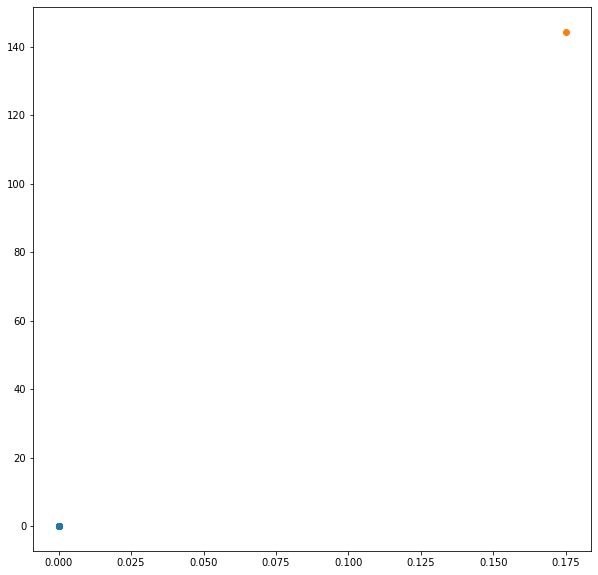

In [493]:
# print('du1:',du1,' ','u1:',u1,' ','J:',J_save)
# plt.scatter(np.squeeze(du1),np.squeeze(J_save))
plt.scatter(np.squeeze(u1),np.squeeze(J_save))
print(u1[-1,0],J_save[-1,0])
print("Goal values:",u_true[N-1,0],J[N-1])
plt.scatter(u_true[N-1,0],J[N-1])

0.0 0.0
Goal values: 0.63006543534056 144.336174213003


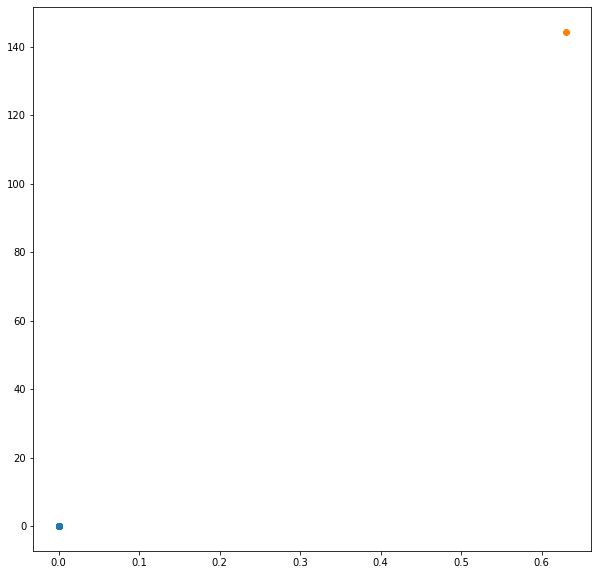

In [494]:
# print('du2:',du2,' ','u2:',u2,' ','J:',J_save)
# plt.scatter(np.squeeze(du1),np.squeeze(J_save))
plt.scatter(np.squeeze(u2),np.squeeze(J_save))
print(u2[-1,0],J_save[-1,0])
print("Goal values:",u_true[N-1,1],J[N-1])
plt.scatter(u_true[N-1,1],J[N-1])

Text(0, 0.5, 'u1_itergrated')

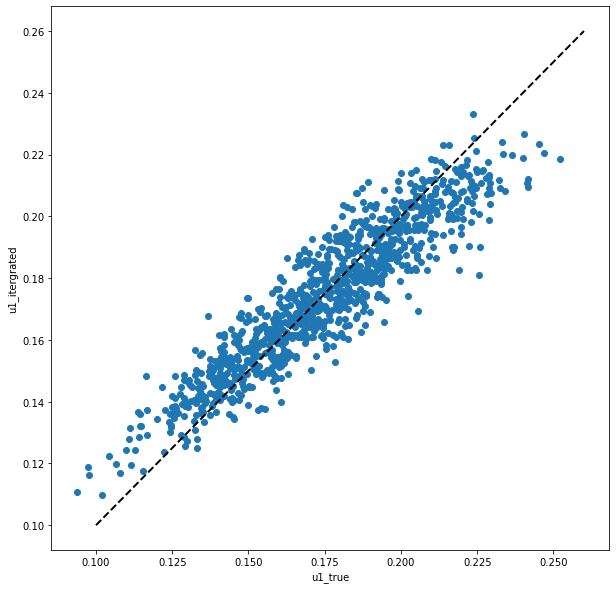

In [507]:
plt.scatter(np.squeeze(u_true[:,0]), np.squeeze(u_save[:,0]))
plt.plot([0.1, 0.26], [0.1, 0.26], color="black", linestyle="dashed", linewidth=2.0)
plt.xlabel("u1_true")
plt.ylabel("u1_itergrated")

Text(0, 0.5, 'u2_itergrated')

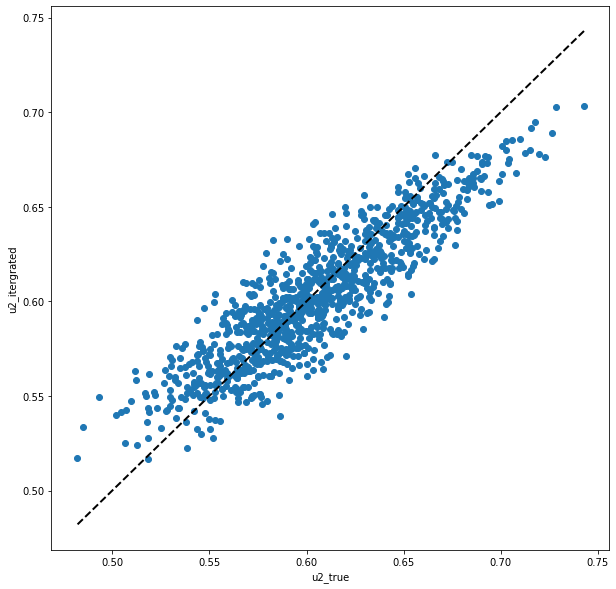

In [508]:
plt.scatter(np.squeeze(u_true[:,1]), np.squeeze(u_save[:,1]))
plt.plot([max(u_true[:,1]), min(u_true[:,1])], [max(u_true[:,1]), min(u_true[:,1])], color="black", linestyle="dashed", linewidth=2.0)
plt.xlabel("u2_true")
plt.ylabel("u2_itergrated")

Text(0, 0.5, 'Ju2_itergrated')

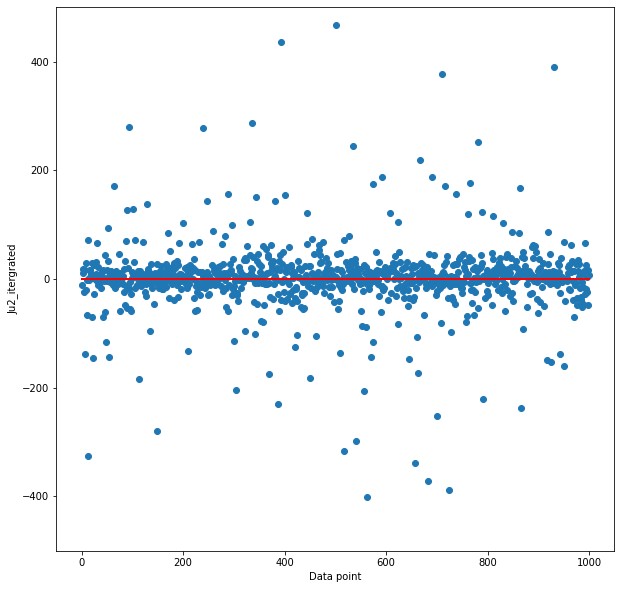

In [509]:
case = np.arange(1, N+1, 1)

plt.scatter(case,Ju_save[:,0])
plt.ylim(-500, 500)
plt.plot([0,1000], [0,0], color="r", linestyle="solid", linewidth=2.0)
plt.xlabel("Data point")
plt.ylabel("Ju2_itergrated")

Text(0, 0.5, 'Ju2_itergrated')

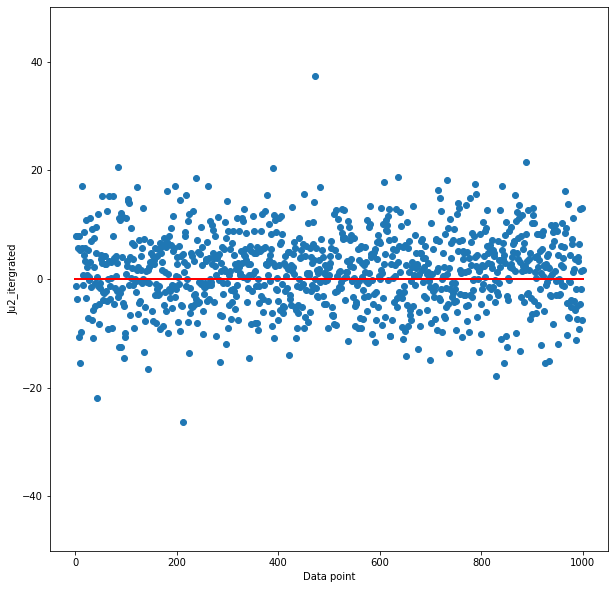

In [510]:
case = np.arange(1, N+1, 1)

plt.scatter(case,Ju_save[:,1])
plt.ylim(-50, 50)
plt.plot([0,1000], [0,0], color="r", linestyle="solid", linewidth=2.0)
plt.xlabel("Data point")
plt.ylabel("Ju2_itergrated")

Text(0, 0.5, 'Loss')

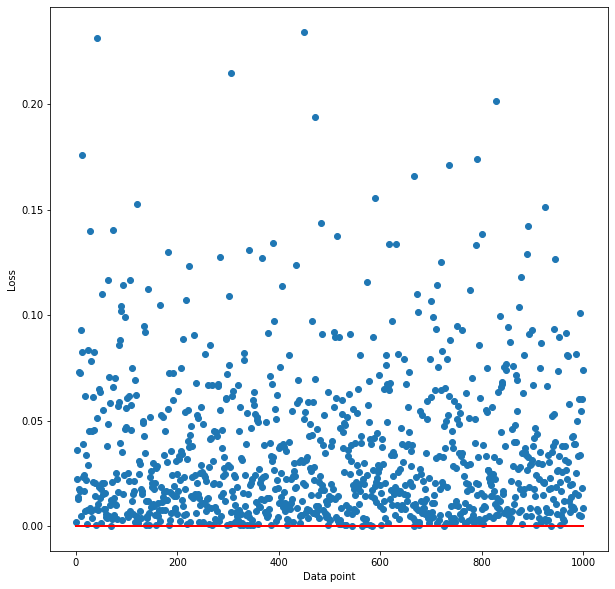

In [511]:
case = np.arange(1, N+1, 1)

plt.scatter(case,J-J_p)
#plt.ylim(-100, 100)
plt.plot([0,1000], [0,0], color="r", linestyle="solid", linewidth=2.0)
plt.xlabel("Data point")
plt.ylabel("Loss")